In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [13]:
def clean_data(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/folder_acciones"):
    files = os.listdir(path)
    df = pd.read_csv(path + "/" + files[0])
    df = df.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df.columns = ["Date", files[0]]
    for file in files[1:]:
        stock_price = pd.read_csv(path + "/" + file)
        stock_price = stock_price.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
        stock_price.columns = ["Date", file]
        df = pd.merge(stock_price, df, how='left',on='Date')
    return df

In [14]:
def import_some_files(path = "/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/tipo_cambio"):
    files = os.listdir(path)
    dfs = []
    for file in files:
        some_df = pd.read_csv(path + "/" + file)
        dfs.append(some_df)
    return dfs

In [15]:
def merge_common_dates(dataframe, series):
    df = dataframe
    series = series.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis = 1)
    df = pd.merge(df, series, how='left',on='Date')
    return df

In [16]:
path = ("/home/raflicky/Desktop/ML_notebooks/KERAS/RNN/modified")
files = os.listdir(path)
BMV = pd.read_csv(path + "/" + files[0])

In [17]:
eur_usd, usd_mxn = import_some_files()

In [18]:
all_variables = merge_common_dates(BMV, eur_usd)
all_variables = merge_common_dates(all_variables, usd_mxn)

In [19]:
all_variables = all_variables.fillna(method='ffill')
all_variables = all_variables.fillna(0)

In [20]:
my_data_frame_sum = all_variables.iloc[:,3]
my_data_frame = all_variables.drop(['Date', 'Adj Close.2'], axis=1)

In [21]:
#my_data_frame.to_csv("theXs")      
#my_data_frame_sum.to_csv("theYs")

In [22]:
working_data = my_data_frame.iloc[0:1000]
working_data_sum = my_data_frame_sum.iloc[0:1000]
validate_data = my_data_frame.iloc[1000:]
validate_data_sum = my_data_frame_sum.iloc[1000:]

In [23]:
my_x = working_data.iloc[:,1:]
my_y = working_data_sum

In [24]:
import random
def next_batch2(dataframe, dataframe2, features):

    
    data = dataframe.values
    data2 = dataframe2.values

    X = data[:-1].reshape(len(data)-1,1,features)
    Y = data2[1:].reshape(len(data2)-1)
        
    return X, Y

In [25]:
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)

In [26]:
validateX, validateY = next_batch2(validate_data.iloc[:,1:], validate_data_sum, 36)

In [27]:
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
from keras.layers import Dropout
from keras import backend as K; K.set_session(K.tf.Session(config=K.tf.ConfigProto(intra_op_parallelism_threads=32, inter_op_parallelism_threads=32)))

Using TensorFlow backend.


In [17]:
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

Train on 999 samples, validate on 999 samples
Epoch 1/10000
 - 4s - loss: 4.8652 - val_loss: 5.9915
Epoch 2/10000
 - 1s - loss: 3.6793 - val_loss: 6.7392
Epoch 3/10000
 - 1s - loss: 4.1549 - val_loss: 7.1076
Epoch 4/10000
 - 1s - loss: 4.0446 - val_loss: 7.1985
Epoch 5/10000
 - 1s - loss: 3.7572 - val_loss: 7.0892
Epoch 6/10000
 - 1s - loss: 3.5547 - val_loss: 6.8268
Epoch 7/10000
 - 1s - loss: 3.5115 - val_loss: 6.2124
Epoch 8/10000
 - 1s - loss: 3.3024 - val_loss: 6.5024
Epoch 9/10000
 - 1s - loss: 3.3301 - val_loss: 7.1504
Epoch 10/10000
 - 1s - loss: 3.2417 - val_loss: 6.9694
Epoch 11/10000
 - 1s - loss: 3.2060 - val_loss: 5.7175
Epoch 12/10000
 - 1s - loss: 3.1530 - val_loss: 4.7099
Epoch 13/10000
 - 1s - loss: 3.2757 - val_loss: 5.7745
Epoch 14/10000
 - 1s - loss: 3.6546 - val_loss: 6.0092
Epoch 15/10000
 - 1s - loss: 3.5263 - val_loss: 5.6998
Epoch 16/10000
 - 1s - loss: 3.3723 - val_loss: 5.5348
Epoch 17/10000
 - 1s - loss: 3.0523 - val_loss: 5.1754
Epoch 18/10000
 - 1s - loss:

Epoch 149/10000
 - 2s - loss: 2.2668 - val_loss: 3.7452
Epoch 150/10000
 - 1s - loss: 2.2534 - val_loss: 4.0143
Epoch 151/10000
 - 1s - loss: 2.4774 - val_loss: 3.8455
Epoch 152/10000
 - 1s - loss: 2.2173 - val_loss: 3.1070
Epoch 153/10000
 - 1s - loss: 2.0114 - val_loss: 3.9433
Epoch 154/10000
 - 1s - loss: 2.1324 - val_loss: 3.3844
Epoch 155/10000
 - 1s - loss: 2.2919 - val_loss: 3.6149
Epoch 156/10000
 - 1s - loss: 2.0986 - val_loss: 3.2941
Epoch 157/10000
 - 1s - loss: 2.0774 - val_loss: 3.2855
Epoch 158/10000
 - 1s - loss: 2.3784 - val_loss: 3.9966
Epoch 159/10000
 - 1s - loss: 2.4876 - val_loss: 3.9790
Epoch 160/10000
 - 1s - loss: 2.1867 - val_loss: 3.4630
Epoch 161/10000
 - 1s - loss: 2.2355 - val_loss: 3.2337
Epoch 162/10000
 - 1s - loss: 2.0573 - val_loss: 3.3883
Epoch 163/10000
 - 1s - loss: 2.0743 - val_loss: 3.3674
Epoch 164/10000
 - 1s - loss: 2.1556 - val_loss: 3.2110
Epoch 165/10000
 - 1s - loss: 2.1452 - val_loss: 3.5858
Epoch 166/10000
 - 1s - loss: 2.2043 - val_loss:

Epoch 296/10000
 - 1s - loss: 1.8991 - val_loss: 2.5352
Epoch 297/10000
 - 1s - loss: 2.0945 - val_loss: 2.7805
Epoch 298/10000
 - 1s - loss: 1.9900 - val_loss: 2.6393
Epoch 299/10000
 - 1s - loss: 1.9215 - val_loss: 2.9820
Epoch 300/10000
 - 1s - loss: 2.0038 - val_loss: 2.1014
Epoch 301/10000
 - 1s - loss: 2.0577 - val_loss: 2.6100
Epoch 302/10000
 - 1s - loss: 2.0776 - val_loss: 2.2282
Epoch 303/10000
 - 1s - loss: 1.9815 - val_loss: 2.1491
Epoch 304/10000
 - 1s - loss: 2.0669 - val_loss: 2.5429
Epoch 305/10000
 - 1s - loss: 1.9361 - val_loss: 2.0605
Epoch 306/10000
 - 1s - loss: 1.9619 - val_loss: 2.5051
Epoch 307/10000
 - 1s - loss: 2.1296 - val_loss: 2.0566
Epoch 308/10000
 - 1s - loss: 2.0945 - val_loss: 2.0030
Epoch 309/10000
 - 1s - loss: 2.0122 - val_loss: 2.3110
Epoch 310/10000
 - 1s - loss: 2.0294 - val_loss: 2.4925
Epoch 311/10000
 - 1s - loss: 1.9347 - val_loss: 2.6570
Epoch 312/10000
 - 1s - loss: 2.0175 - val_loss: 1.9603
Epoch 313/10000
 - 1s - loss: 2.0507 - val_loss:

Epoch 443/10000
 - 1s - loss: 1.8972 - val_loss: 1.8259
Epoch 444/10000
 - 1s - loss: 1.8297 - val_loss: 2.2354
Epoch 445/10000
 - 1s - loss: 1.8900 - val_loss: 2.1177
Epoch 446/10000
 - 1s - loss: 1.8334 - val_loss: 1.8374
Epoch 447/10000
 - 1s - loss: 1.9257 - val_loss: 1.8460
Epoch 448/10000
 - 1s - loss: 2.0063 - val_loss: 2.3599
Epoch 449/10000
 - 1s - loss: 1.9991 - val_loss: 1.8020
Epoch 450/10000
 - 1s - loss: 1.9704 - val_loss: 2.0221
Epoch 451/10000
 - 1s - loss: 1.9815 - val_loss: 1.8522
Epoch 452/10000
 - 1s - loss: 1.8740 - val_loss: 1.9538
Epoch 453/10000
 - 1s - loss: 1.9680 - val_loss: 1.8344
Epoch 454/10000
 - 1s - loss: 1.9094 - val_loss: 2.7231
Epoch 455/10000
 - 1s - loss: 1.9969 - val_loss: 1.9721
Epoch 456/10000
 - 1s - loss: 1.9195 - val_loss: 2.1711
Epoch 457/10000
 - 1s - loss: 1.9975 - val_loss: 2.1072
Epoch 458/10000
 - 1s - loss: 1.9666 - val_loss: 2.2838
Epoch 459/10000
 - 1s - loss: 2.0050 - val_loss: 1.7795
Epoch 460/10000
 - 1s - loss: 1.8608 - val_loss:

Epoch 590/10000
 - 1s - loss: 1.8730 - val_loss: 1.6992
Epoch 591/10000
 - 1s - loss: 1.9063 - val_loss: 1.7328
Epoch 592/10000
 - 1s - loss: 1.9288 - val_loss: 1.6545
Epoch 593/10000
 - 1s - loss: 1.7497 - val_loss: 1.7232
Epoch 594/10000
 - 1s - loss: 1.8685 - val_loss: 1.8653
Epoch 595/10000
 - 1s - loss: 1.8676 - val_loss: 1.9004
Epoch 596/10000
 - 1s - loss: 1.9001 - val_loss: 1.7948
Epoch 597/10000
 - 1s - loss: 1.9591 - val_loss: 1.7255
Epoch 598/10000
 - 1s - loss: 1.8532 - val_loss: 1.7879
Epoch 599/10000
 - 1s - loss: 1.8081 - val_loss: 1.9694
Epoch 600/10000
 - 1s - loss: 1.8603 - val_loss: 1.7739
Epoch 601/10000
 - 1s - loss: 1.8182 - val_loss: 1.9165
Epoch 602/10000
 - 1s - loss: 1.8436 - val_loss: 1.7391
Epoch 603/10000
 - 1s - loss: 1.8084 - val_loss: 1.8143
Epoch 604/10000
 - 1s - loss: 1.8143 - val_loss: 1.6335
Epoch 605/10000
 - 1s - loss: 1.7904 - val_loss: 1.6673
Epoch 606/10000
 - 1s - loss: 1.8204 - val_loss: 1.7384
Epoch 607/10000
 - 1s - loss: 1.8795 - val_loss:

Epoch 737/10000
 - 1s - loss: 1.8686 - val_loss: 1.8794
Epoch 738/10000
 - 1s - loss: 1.7593 - val_loss: 1.6427
Epoch 739/10000
 - 1s - loss: 1.7028 - val_loss: 1.6797
Epoch 740/10000
 - 1s - loss: 1.6716 - val_loss: 1.9865
Epoch 741/10000
 - 1s - loss: 1.7294 - val_loss: 1.7326
Epoch 742/10000
 - 1s - loss: 1.7341 - val_loss: 1.9241
Epoch 743/10000
 - 1s - loss: 1.7059 - val_loss: 1.6033
Epoch 744/10000
 - 1s - loss: 1.7597 - val_loss: 1.7873
Epoch 745/10000
 - 1s - loss: 1.7232 - val_loss: 1.7891
Epoch 746/10000
 - 1s - loss: 1.6998 - val_loss: 1.5679
Epoch 747/10000
 - 1s - loss: 1.6653 - val_loss: 1.6199
Epoch 748/10000
 - 1s - loss: 1.8006 - val_loss: 1.9171
Epoch 749/10000
 - 1s - loss: 1.7518 - val_loss: 1.7560
Epoch 750/10000
 - 1s - loss: 1.7251 - val_loss: 1.8436
Epoch 751/10000
 - 1s - loss: 1.8064 - val_loss: 1.6232
Epoch 752/10000
 - 1s - loss: 1.7537 - val_loss: 1.7125
Epoch 753/10000
 - 1s - loss: 1.7168 - val_loss: 1.9842
Epoch 754/10000
 - 1s - loss: 1.7386 - val_loss:

Epoch 884/10000
 - 1s - loss: 1.7106 - val_loss: 1.5489
Epoch 885/10000
 - 1s - loss: 1.7206 - val_loss: 1.6146
Epoch 886/10000
 - 1s - loss: 1.6159 - val_loss: 1.6204
Epoch 887/10000
 - 1s - loss: 1.7319 - val_loss: 1.8136
Epoch 888/10000
 - 1s - loss: 1.8518 - val_loss: 1.5732
Epoch 889/10000
 - 1s - loss: 1.7104 - val_loss: 1.5876
Epoch 890/10000
 - 1s - loss: 1.6289 - val_loss: 1.4996
Epoch 891/10000
 - 1s - loss: 1.5966 - val_loss: 1.5087
Epoch 892/10000
 - 1s - loss: 1.6433 - val_loss: 1.6771
Epoch 893/10000
 - 1s - loss: 1.6533 - val_loss: 1.5808
Epoch 894/10000
 - 1s - loss: 1.7010 - val_loss: 1.4458
Epoch 895/10000
 - 1s - loss: 1.6654 - val_loss: 1.6527
Epoch 896/10000
 - 1s - loss: 1.7127 - val_loss: 1.5190
Epoch 897/10000
 - 1s - loss: 1.7807 - val_loss: 1.5650
Epoch 898/10000
 - 1s - loss: 1.8009 - val_loss: 1.5991
Epoch 899/10000
 - 1s - loss: 1.7322 - val_loss: 1.6676
Epoch 900/10000
 - 1s - loss: 1.6559 - val_loss: 1.6727
Epoch 901/10000
 - 1s - loss: 1.7416 - val_loss:

Epoch 1030/10000
 - 1s - loss: 1.7673 - val_loss: 1.7758
Epoch 1031/10000
 - 1s - loss: 1.6708 - val_loss: 1.7643
Epoch 1032/10000
 - 1s - loss: 1.7178 - val_loss: 1.7503
Epoch 1033/10000
 - 1s - loss: 1.7944 - val_loss: 1.9980
Epoch 1034/10000
 - 1s - loss: 1.7678 - val_loss: 1.5620
Epoch 1035/10000
 - 1s - loss: 1.6602 - val_loss: 1.7131
Epoch 1036/10000
 - 1s - loss: 1.7513 - val_loss: 1.6123
Epoch 1037/10000
 - 1s - loss: 1.6601 - val_loss: 1.5591
Epoch 1038/10000
 - 1s - loss: 1.6473 - val_loss: 1.6290
Epoch 1039/10000
 - 1s - loss: 1.6766 - val_loss: 1.5570
Epoch 1040/10000
 - 1s - loss: 1.7226 - val_loss: 1.6547
Epoch 1041/10000
 - 1s - loss: 1.6586 - val_loss: 1.8296
Epoch 1042/10000
 - 1s - loss: 1.7420 - val_loss: 1.4647
Epoch 1043/10000
 - 1s - loss: 1.7279 - val_loss: 1.5711
Epoch 1044/10000
 - 1s - loss: 1.6031 - val_loss: 1.6664
Epoch 1045/10000
 - 1s - loss: 1.6584 - val_loss: 1.6544
Epoch 1046/10000
 - 1s - loss: 1.7292 - val_loss: 1.5964
Epoch 1047/10000
 - 1s - loss: 

Epoch 1174/10000
 - 1s - loss: 1.6220 - val_loss: 1.7583
Epoch 1175/10000
 - 1s - loss: 1.7532 - val_loss: 1.7584
Epoch 1176/10000
 - 1s - loss: 1.7306 - val_loss: 1.6777
Epoch 1177/10000
 - 1s - loss: 1.7416 - val_loss: 2.1032
Epoch 1178/10000
 - 1s - loss: 1.7380 - val_loss: 1.6398
Epoch 1179/10000
 - 1s - loss: 1.7239 - val_loss: 1.6439
Epoch 1180/10000
 - 1s - loss: 1.7046 - val_loss: 1.6447
Epoch 1181/10000
 - 1s - loss: 1.6514 - val_loss: 1.8368
Epoch 1182/10000
 - 1s - loss: 1.6951 - val_loss: 1.8212
Epoch 1183/10000
 - 1s - loss: 1.6118 - val_loss: 1.7589
Epoch 1184/10000
 - 1s - loss: 1.6304 - val_loss: 1.8048
Epoch 1185/10000
 - 1s - loss: 1.7014 - val_loss: 1.7252
Epoch 1186/10000
 - 1s - loss: 1.7474 - val_loss: 1.8840
Epoch 1187/10000
 - 1s - loss: 1.6773 - val_loss: 1.8564
Epoch 1188/10000
 - 1s - loss: 1.6386 - val_loss: 1.7085
Epoch 1189/10000
 - 1s - loss: 1.6672 - val_loss: 1.6475
Epoch 1190/10000
 - 1s - loss: 1.7248 - val_loss: 1.7785
Epoch 1191/10000
 - 1s - loss: 

Epoch 1318/10000
 - 1s - loss: 1.7217 - val_loss: 1.7720
Epoch 1319/10000
 - 1s - loss: 1.6669 - val_loss: 1.8892
Epoch 1320/10000
 - 1s - loss: 1.7467 - val_loss: 1.9600
Epoch 1321/10000
 - 1s - loss: 1.6946 - val_loss: 1.9037
Epoch 1322/10000
 - 1s - loss: 1.7577 - val_loss: 1.9437
Epoch 1323/10000
 - 1s - loss: 1.7238 - val_loss: 1.7221
Epoch 1324/10000
 - 1s - loss: 1.7275 - val_loss: 1.8675
Epoch 1325/10000
 - 1s - loss: 1.6391 - val_loss: 1.7459
Epoch 1326/10000
 - 1s - loss: 1.7259 - val_loss: 1.7794
Epoch 1327/10000
 - 1s - loss: 1.6624 - val_loss: 1.8274
Epoch 1328/10000
 - 1s - loss: 1.7628 - val_loss: 1.7476
Epoch 1329/10000
 - 1s - loss: 1.7508 - val_loss: 1.8252
Epoch 1330/10000
 - 1s - loss: 1.7254 - val_loss: 2.0204
Epoch 1331/10000
 - 1s - loss: 2.0431 - val_loss: 1.6095
Epoch 1332/10000
 - 1s - loss: 1.7608 - val_loss: 1.7500
Epoch 1333/10000
 - 1s - loss: 1.7273 - val_loss: 1.7887
Epoch 1334/10000
 - 1s - loss: 1.6778 - val_loss: 1.8233
Epoch 1335/10000
 - 1s - loss: 

Epoch 1462/10000
 - 1s - loss: 1.6909 - val_loss: 2.0181
Epoch 1463/10000
 - 1s - loss: 1.6417 - val_loss: 1.9725
Epoch 1464/10000
 - 1s - loss: 1.7817 - val_loss: 1.8888
Epoch 1465/10000
 - 1s - loss: 1.6570 - val_loss: 1.9587
Epoch 1466/10000
 - 1s - loss: 1.8141 - val_loss: 2.0803
Epoch 1467/10000
 - 1s - loss: 1.7151 - val_loss: 2.0441
Epoch 1468/10000
 - 1s - loss: 1.7386 - val_loss: 1.8874
Epoch 1469/10000
 - 1s - loss: 1.7653 - val_loss: 2.1235
Epoch 1470/10000
 - 1s - loss: 1.7224 - val_loss: 1.9787
Epoch 1471/10000
 - 1s - loss: 1.6717 - val_loss: 2.4884
Epoch 1472/10000
 - 1s - loss: 1.7639 - val_loss: 2.1712
Epoch 1473/10000
 - 1s - loss: 1.9905 - val_loss: 2.0424
Epoch 1474/10000
 - 1s - loss: 1.7411 - val_loss: 2.0175
Epoch 1475/10000
 - 1s - loss: 1.7155 - val_loss: 1.9795
Epoch 1476/10000
 - 1s - loss: 1.7040 - val_loss: 2.1174
Epoch 1477/10000
 - 1s - loss: 1.6991 - val_loss: 2.2311
Epoch 1478/10000
 - 1s - loss: 1.7750 - val_loss: 2.1052
Epoch 1479/10000
 - 1s - loss: 

Epoch 1606/10000
 - 1s - loss: 1.6915 - val_loss: 1.7622
Epoch 1607/10000
 - 1s - loss: 1.7462 - val_loss: 1.8695
Epoch 1608/10000
 - 1s - loss: 1.7557 - val_loss: 1.9326
Epoch 1609/10000
 - 1s - loss: 1.7447 - val_loss: 1.8377
Epoch 1610/10000
 - 1s - loss: 1.7128 - val_loss: 2.0149
Epoch 1611/10000
 - 1s - loss: 1.8017 - val_loss: 1.8769
Epoch 1612/10000
 - 1s - loss: 1.7189 - val_loss: 1.8941
Epoch 1613/10000
 - 1s - loss: 1.8637 - val_loss: 1.7761
Epoch 1614/10000
 - 1s - loss: 1.7308 - val_loss: 1.9775
Epoch 1615/10000
 - 1s - loss: 1.7140 - val_loss: 1.8126
Epoch 1616/10000
 - 1s - loss: 1.7428 - val_loss: 1.8488
Epoch 1617/10000
 - 1s - loss: 1.8153 - val_loss: 1.8642
Epoch 1618/10000
 - 1s - loss: 1.8391 - val_loss: 1.8670
Epoch 1619/10000
 - 1s - loss: 1.8209 - val_loss: 1.6461
Epoch 1620/10000
 - 1s - loss: 1.7223 - val_loss: 1.8601
Epoch 1621/10000
 - 1s - loss: 1.7529 - val_loss: 1.9701
Epoch 1622/10000
 - 1s - loss: 1.8151 - val_loss: 1.8359
Epoch 1623/10000
 - 1s - loss: 

Epoch 1750/10000
 - 1s - loss: 1.7220 - val_loss: 2.0568
Epoch 1751/10000
 - 1s - loss: 1.7381 - val_loss: 1.9324
Epoch 1752/10000
 - 1s - loss: 1.6680 - val_loss: 1.8825
Epoch 1753/10000
 - 1s - loss: 1.7785 - val_loss: 1.8441
Epoch 1754/10000
 - 1s - loss: 1.8039 - val_loss: 1.9430
Epoch 1755/10000
 - 1s - loss: 1.8435 - val_loss: 1.7967
Epoch 1756/10000
 - 1s - loss: 1.7785 - val_loss: 1.9422
Epoch 1757/10000
 - 1s - loss: 1.7919 - val_loss: 1.9610
Epoch 1758/10000
 - 1s - loss: 1.8288 - val_loss: 1.6981
Epoch 1759/10000
 - 1s - loss: 1.8125 - val_loss: 1.7547
Epoch 1760/10000
 - 1s - loss: 1.7424 - val_loss: 1.7253
Epoch 1761/10000
 - 1s - loss: 1.7756 - val_loss: 1.9534
Epoch 1762/10000
 - 1s - loss: 1.8619 - val_loss: 1.8431
Epoch 1763/10000
 - 1s - loss: 1.7325 - val_loss: 1.8450
Epoch 1764/10000
 - 1s - loss: 1.7414 - val_loss: 1.6973
Epoch 1765/10000
 - 1s - loss: 1.7511 - val_loss: 1.7313
Epoch 1766/10000
 - 1s - loss: 1.8607 - val_loss: 2.0036
Epoch 1767/10000
 - 1s - loss: 

Epoch 1894/10000
 - 1s - loss: 1.7611 - val_loss: 1.9711
Epoch 1895/10000
 - 1s - loss: 1.7356 - val_loss: 2.0669
Epoch 1896/10000
 - 1s - loss: 1.7232 - val_loss: 2.0097
Epoch 1897/10000
 - 1s - loss: 1.7568 - val_loss: 1.9400
Epoch 1898/10000
 - 1s - loss: 1.8699 - val_loss: 1.9112
Epoch 1899/10000
 - 1s - loss: 1.8205 - val_loss: 2.0823
Epoch 1900/10000
 - 1s - loss: 1.8116 - val_loss: 1.9213
Epoch 1901/10000
 - 1s - loss: 1.8063 - val_loss: 2.0726
Epoch 1902/10000
 - 1s - loss: 1.7604 - val_loss: 2.0347
Epoch 1903/10000
 - 1s - loss: 1.8000 - val_loss: 1.9649
Epoch 1904/10000
 - 1s - loss: 1.7510 - val_loss: 2.0191
Epoch 1905/10000
 - 1s - loss: 1.7308 - val_loss: 1.9685
Epoch 1906/10000
 - 1s - loss: 1.7768 - val_loss: 2.0249
Epoch 1907/10000
 - 1s - loss: 1.8443 - val_loss: 1.9477
Epoch 1908/10000
 - 1s - loss: 1.7305 - val_loss: 1.8495
Epoch 1909/10000
 - 1s - loss: 1.8031 - val_loss: 1.8425
Epoch 1910/10000
 - 1s - loss: 1.7668 - val_loss: 2.0188
Epoch 1911/10000
 - 1s - loss: 

Epoch 2038/10000
 - 1s - loss: 1.7617 - val_loss: 1.8155
Epoch 2039/10000
 - 1s - loss: 1.7435 - val_loss: 2.0397
Epoch 2040/10000
 - 1s - loss: 1.8636 - val_loss: 1.9507
Epoch 2041/10000
 - 1s - loss: 1.6809 - val_loss: 1.9041
Epoch 2042/10000
 - 1s - loss: 1.7406 - val_loss: 1.7841
Epoch 2043/10000
 - 1s - loss: 1.6980 - val_loss: 1.9321
Epoch 2044/10000
 - 1s - loss: 1.8330 - val_loss: 1.8835
Epoch 2045/10000
 - 1s - loss: 1.7961 - val_loss: 1.9107
Epoch 2046/10000
 - 1s - loss: 1.6801 - val_loss: 1.8588
Epoch 2047/10000
 - 1s - loss: 1.7378 - val_loss: 1.9749
Epoch 2048/10000
 - 1s - loss: 1.8041 - val_loss: 1.8512
Epoch 2049/10000
 - 1s - loss: 1.7741 - val_loss: 1.9667
Epoch 2050/10000
 - 1s - loss: 1.8597 - val_loss: 1.9609
Epoch 2051/10000
 - 1s - loss: 1.7704 - val_loss: 1.8370
Epoch 2052/10000
 - 1s - loss: 1.7887 - val_loss: 1.9488
Epoch 2053/10000
 - 1s - loss: 1.7457 - val_loss: 1.9137
Epoch 2054/10000
 - 1s - loss: 1.8014 - val_loss: 2.0420
Epoch 2055/10000
 - 1s - loss: 

Epoch 2182/10000
 - 1s - loss: 1.7399 - val_loss: 1.9982
Epoch 2183/10000
 - 1s - loss: 1.7316 - val_loss: 1.9633
Epoch 2184/10000
 - 1s - loss: 1.7180 - val_loss: 1.9055
Epoch 2185/10000
 - 1s - loss: 1.7383 - val_loss: 2.0676
Epoch 2186/10000
 - 1s - loss: 1.7639 - val_loss: 1.8710
Epoch 2187/10000
 - 1s - loss: 1.7906 - val_loss: 2.0901
Epoch 2188/10000
 - 1s - loss: 1.8085 - val_loss: 2.2673
Epoch 2189/10000
 - 1s - loss: 1.7691 - val_loss: 2.2591
Epoch 2190/10000
 - 1s - loss: 1.8426 - val_loss: 2.0004
Epoch 2191/10000
 - 1s - loss: 1.7116 - val_loss: 2.0184
Epoch 2192/10000
 - 1s - loss: 1.7194 - val_loss: 2.0606
Epoch 2193/10000
 - 1s - loss: 1.7178 - val_loss: 2.0838
Epoch 2194/10000
 - 1s - loss: 1.7008 - val_loss: 1.8522
Epoch 2195/10000
 - 1s - loss: 1.9411 - val_loss: 2.0085
Epoch 2196/10000
 - 1s - loss: 2.0727 - val_loss: 1.9416
Epoch 2197/10000
 - 1s - loss: 1.8896 - val_loss: 1.7765
Epoch 2198/10000
 - 1s - loss: 1.8137 - val_loss: 1.9619
Epoch 2199/10000
 - 1s - loss: 

Epoch 2326/10000
 - 1s - loss: 1.7578 - val_loss: 2.0809
Epoch 2327/10000
 - 1s - loss: 1.7464 - val_loss: 1.8718
Epoch 2328/10000
 - 1s - loss: 1.8322 - val_loss: 1.9016
Epoch 2329/10000
 - 1s - loss: 1.7664 - val_loss: 1.9054
Epoch 2330/10000
 - 1s - loss: 1.7978 - val_loss: 2.1339
Epoch 2331/10000
 - 1s - loss: 1.8030 - val_loss: 1.7959
Epoch 2332/10000
 - 1s - loss: 1.7473 - val_loss: 1.8178
Epoch 2333/10000
 - 1s - loss: 1.8044 - val_loss: 1.8305
Epoch 2334/10000
 - 1s - loss: 1.6453 - val_loss: 1.8410
Epoch 2335/10000
 - 1s - loss: 1.7517 - val_loss: 1.8793
Epoch 2336/10000
 - 1s - loss: 1.7310 - val_loss: 1.8189
Epoch 2337/10000
 - 1s - loss: 1.7291 - val_loss: 1.6865
Epoch 2338/10000
 - 1s - loss: 1.7114 - val_loss: 1.9269
Epoch 2339/10000
 - 1s - loss: 1.7556 - val_loss: 1.8775
Epoch 2340/10000
 - 1s - loss: 1.6858 - val_loss: 1.8948
Epoch 2341/10000
 - 1s - loss: 1.7787 - val_loss: 1.9425
Epoch 2342/10000
 - 1s - loss: 1.7304 - val_loss: 1.8108
Epoch 2343/10000
 - 1s - loss: 

Epoch 2470/10000
 - 1s - loss: 1.7275 - val_loss: 1.8276
Epoch 2471/10000
 - 1s - loss: 1.7150 - val_loss: 1.7781
Epoch 2472/10000
 - 1s - loss: 1.7195 - val_loss: 1.8853
Epoch 2473/10000
 - 1s - loss: 1.8207 - val_loss: 1.9469
Epoch 2474/10000
 - 1s - loss: 1.7768 - val_loss: 1.5708
Epoch 2475/10000
 - 1s - loss: 1.6874 - val_loss: 1.7614
Epoch 2476/10000
 - 1s - loss: 1.8616 - val_loss: 1.8526
Epoch 2477/10000
 - 1s - loss: 1.6736 - val_loss: 1.9297
Epoch 2478/10000
 - 1s - loss: 1.6543 - val_loss: 1.6992
Epoch 2479/10000
 - 1s - loss: 1.7156 - val_loss: 1.7627
Epoch 2480/10000
 - 1s - loss: 1.6992 - val_loss: 1.6007
Epoch 2481/10000
 - 1s - loss: 1.6450 - val_loss: 1.8033
Epoch 2482/10000
 - 1s - loss: 1.7900 - val_loss: 1.8264
Epoch 2483/10000
 - 1s - loss: 1.6845 - val_loss: 1.7029
Epoch 2484/10000
 - 1s - loss: 1.7480 - val_loss: 1.6046
Epoch 2485/10000
 - 1s - loss: 1.7353 - val_loss: 2.2271
Epoch 2486/10000
 - 1s - loss: 1.7835 - val_loss: 1.9212
Epoch 2487/10000
 - 1s - loss: 

Epoch 2614/10000
 - 1s - loss: 1.7989 - val_loss: 1.5753
Epoch 2615/10000
 - 1s - loss: 1.9039 - val_loss: 1.6432
Epoch 2616/10000
 - 1s - loss: 1.7293 - val_loss: 1.7555
Epoch 2617/10000
 - 1s - loss: 1.7478 - val_loss: 1.7431
Epoch 2618/10000
 - 1s - loss: 1.7546 - val_loss: 1.6696
Epoch 2619/10000
 - 1s - loss: 1.7959 - val_loss: 1.5958
Epoch 2620/10000
 - 1s - loss: 1.7870 - val_loss: 1.8165
Epoch 2621/10000
 - 1s - loss: 1.7630 - val_loss: 1.8052
Epoch 2622/10000
 - 1s - loss: 1.7950 - val_loss: 1.7921
Epoch 2623/10000
 - 1s - loss: 1.7439 - val_loss: 1.6924
Epoch 2624/10000
 - 1s - loss: 1.8788 - val_loss: 1.6364
Epoch 2625/10000
 - 1s - loss: 1.8375 - val_loss: 1.7631
Epoch 2626/10000
 - 1s - loss: 1.7386 - val_loss: 1.8409
Epoch 2627/10000
 - 1s - loss: 1.7848 - val_loss: 1.8637
Epoch 2628/10000
 - 1s - loss: 1.7507 - val_loss: 2.0437
Epoch 2629/10000
 - 1s - loss: 1.7822 - val_loss: 1.6827
Epoch 2630/10000
 - 1s - loss: 1.7485 - val_loss: 2.0531
Epoch 2631/10000
 - 1s - loss: 

Epoch 2758/10000
 - 1s - loss: 1.7448 - val_loss: 1.5718
Epoch 2759/10000
 - 1s - loss: 1.7444 - val_loss: 1.4997
Epoch 2760/10000
 - 1s - loss: 1.7923 - val_loss: 1.7573
Epoch 2761/10000
 - 1s - loss: 1.7350 - val_loss: 1.5456
Epoch 2762/10000
 - 1s - loss: 1.6538 - val_loss: 1.5900
Epoch 2763/10000
 - 1s - loss: 1.9210 - val_loss: 1.5389
Epoch 2764/10000
 - 1s - loss: 1.7600 - val_loss: 1.6094
Epoch 2765/10000
 - 1s - loss: 1.7261 - val_loss: 1.5209
Epoch 2766/10000
 - 1s - loss: 1.7417 - val_loss: 1.6962
Epoch 2767/10000
 - 1s - loss: 1.7817 - val_loss: 1.7007
Epoch 2768/10000
 - 1s - loss: 1.8118 - val_loss: 1.8104
Epoch 2769/10000
 - 1s - loss: 1.7399 - val_loss: 1.8699
Epoch 2770/10000
 - 1s - loss: 1.7856 - val_loss: 1.7609
Epoch 2771/10000
 - 1s - loss: 1.7590 - val_loss: 1.5698
Epoch 2772/10000
 - 1s - loss: 1.7432 - val_loss: 1.9099
Epoch 2773/10000
 - 1s - loss: 1.7529 - val_loss: 1.5431
Epoch 2774/10000
 - 1s - loss: 1.6926 - val_loss: 1.9627
Epoch 2775/10000
 - 1s - loss: 

Epoch 2902/10000
 - 1s - loss: 1.6545 - val_loss: 1.5968
Epoch 2903/10000
 - 1s - loss: 1.7170 - val_loss: 1.6522
Epoch 2904/10000
 - 1s - loss: 1.7053 - val_loss: 1.7108
Epoch 2905/10000
 - 1s - loss: 1.7300 - val_loss: 1.6011
Epoch 2906/10000
 - 1s - loss: 1.7625 - val_loss: 1.4809
Epoch 2907/10000
 - 1s - loss: 1.6613 - val_loss: 1.6658
Epoch 2908/10000
 - 1s - loss: 1.7178 - val_loss: 1.7336
Epoch 2909/10000
 - 1s - loss: 1.7037 - val_loss: 1.7227
Epoch 2910/10000
 - 1s - loss: 1.8288 - val_loss: 1.5579
Epoch 2911/10000
 - 1s - loss: 1.7865 - val_loss: 1.6300
Epoch 2912/10000
 - 1s - loss: 1.8000 - val_loss: 1.4482
Epoch 2913/10000
 - 1s - loss: 1.8636 - val_loss: 1.4368
Epoch 2914/10000
 - 1s - loss: 1.8088 - val_loss: 1.5544
Epoch 2915/10000
 - 1s - loss: 1.7207 - val_loss: 1.8160
Epoch 2916/10000
 - 1s - loss: 1.6892 - val_loss: 1.5759
Epoch 2917/10000
 - 1s - loss: 1.7079 - val_loss: 1.6190
Epoch 2918/10000
 - 1s - loss: 1.6888 - val_loss: 1.7847
Epoch 2919/10000
 - 1s - loss: 

Epoch 3046/10000
 - 1s - loss: 1.7123 - val_loss: 1.7605
Epoch 3047/10000
 - 1s - loss: 1.7534 - val_loss: 1.8333
Epoch 3048/10000
 - 1s - loss: 1.7674 - val_loss: 1.4730
Epoch 3049/10000
 - 1s - loss: 1.7185 - val_loss: 2.0307
Epoch 3050/10000
 - 1s - loss: 1.7380 - val_loss: 1.6435
Epoch 3051/10000
 - 1s - loss: 1.7346 - val_loss: 1.7030
Epoch 3052/10000
 - 1s - loss: 1.6948 - val_loss: 1.6108
Epoch 3053/10000
 - 1s - loss: 1.6972 - val_loss: 1.6958
Epoch 3054/10000
 - 1s - loss: 1.7570 - val_loss: 1.7434
Epoch 3055/10000
 - 1s - loss: 1.7551 - val_loss: 1.7996
Epoch 3056/10000
 - 1s - loss: 1.7787 - val_loss: 1.6251
Epoch 3057/10000
 - 1s - loss: 1.9586 - val_loss: 1.4350
Epoch 3058/10000
 - 1s - loss: 1.8097 - val_loss: 1.6572
Epoch 3059/10000
 - 1s - loss: 1.7695 - val_loss: 1.8568
Epoch 3060/10000
 - 1s - loss: 1.7475 - val_loss: 1.7708
Epoch 3061/10000
 - 1s - loss: 1.8013 - val_loss: 1.8860
Epoch 3062/10000
 - 1s - loss: 1.7885 - val_loss: 1.7360
Epoch 3063/10000
 - 1s - loss: 

Epoch 3190/10000
 - 1s - loss: 1.7454 - val_loss: 1.6847
Epoch 3191/10000
 - 1s - loss: 1.8057 - val_loss: 1.9641
Epoch 3192/10000
 - 1s - loss: 1.8223 - val_loss: 1.7055
Epoch 3193/10000
 - 1s - loss: 1.7752 - val_loss: 1.4889
Epoch 3194/10000
 - 1s - loss: 1.6847 - val_loss: 1.7696
Epoch 3195/10000
 - 1s - loss: 1.7986 - val_loss: 1.6955
Epoch 3196/10000
 - 1s - loss: 1.7430 - val_loss: 1.6013
Epoch 3197/10000
 - 1s - loss: 1.8100 - val_loss: 1.5716
Epoch 3198/10000
 - 1s - loss: 1.8357 - val_loss: 1.6872
Epoch 3199/10000
 - 1s - loss: 1.7516 - val_loss: 1.7415
Epoch 3200/10000
 - 1s - loss: 1.7209 - val_loss: 1.8135
Epoch 3201/10000
 - 1s - loss: 1.7535 - val_loss: 1.7606
Epoch 3202/10000
 - 1s - loss: 1.7316 - val_loss: 1.9954
Epoch 3203/10000
 - 1s - loss: 1.7608 - val_loss: 1.8490
Epoch 3204/10000
 - 1s - loss: 1.6823 - val_loss: 2.0506
Epoch 3205/10000
 - 1s - loss: 1.7965 - val_loss: 1.8358
Epoch 3206/10000
 - 1s - loss: 1.7755 - val_loss: 1.8357
Epoch 3207/10000
 - 1s - loss: 

Epoch 3334/10000
 - 1s - loss: 1.7684 - val_loss: 2.2358
Epoch 3335/10000
 - 1s - loss: 1.7567 - val_loss: 1.9679
Epoch 3336/10000
 - 1s - loss: 1.8244 - val_loss: 1.8208
Epoch 3337/10000
 - 1s - loss: 1.8054 - val_loss: 1.9660
Epoch 3338/10000
 - 1s - loss: 1.7982 - val_loss: 1.9736
Epoch 3339/10000
 - 1s - loss: 1.7712 - val_loss: 1.8265
Epoch 3340/10000
 - 1s - loss: 1.7762 - val_loss: 1.7633
Epoch 3341/10000
 - 1s - loss: 1.7414 - val_loss: 2.3610
Epoch 3342/10000
 - 1s - loss: 1.8113 - val_loss: 1.9705
Epoch 3343/10000
 - 1s - loss: 1.7500 - val_loss: 1.8963
Epoch 3344/10000
 - 1s - loss: 1.7637 - val_loss: 2.0238
Epoch 3345/10000
 - 1s - loss: 1.8708 - val_loss: 1.6812
Epoch 3346/10000
 - 1s - loss: 1.6645 - val_loss: 1.7230
Epoch 3347/10000
 - 1s - loss: 1.8406 - val_loss: 1.9063
Epoch 3348/10000
 - 1s - loss: 1.7653 - val_loss: 1.8522
Epoch 3349/10000
 - 1s - loss: 1.7182 - val_loss: 1.8844
Epoch 3350/10000
 - 1s - loss: 1.7633 - val_loss: 1.8470
Epoch 3351/10000
 - 1s - loss: 

Epoch 3478/10000
 - 1s - loss: 1.7475 - val_loss: 1.8017
Epoch 3479/10000
 - 1s - loss: 1.7777 - val_loss: 1.7548
Epoch 3480/10000
 - 1s - loss: 1.9716 - val_loss: 1.7164
Epoch 3481/10000
 - 1s - loss: 1.6180 - val_loss: 1.9077
Epoch 3482/10000
 - 1s - loss: 1.7751 - val_loss: 1.7801
Epoch 3483/10000
 - 1s - loss: 1.8523 - val_loss: 1.8966
Epoch 3484/10000
 - 1s - loss: 1.8720 - val_loss: 1.8265
Epoch 3485/10000
 - 1s - loss: 1.7239 - val_loss: 1.7347
Epoch 3486/10000
 - 1s - loss: 1.7756 - val_loss: 1.6547
Epoch 3487/10000
 - 1s - loss: 1.8251 - val_loss: 1.9684
Epoch 3488/10000
 - 1s - loss: 1.7690 - val_loss: 1.8364
Epoch 3489/10000
 - 1s - loss: 1.7795 - val_loss: 1.9925
Epoch 3490/10000
 - 1s - loss: 1.8732 - val_loss: 1.8942
Epoch 3491/10000
 - 1s - loss: 1.7192 - val_loss: 1.6646
Epoch 3492/10000
 - 1s - loss: 1.7750 - val_loss: 1.6894
Epoch 3493/10000
 - 1s - loss: 1.8138 - val_loss: 1.8233
Epoch 3494/10000
 - 1s - loss: 1.7592 - val_loss: 1.8577
Epoch 3495/10000
 - 1s - loss: 

Epoch 3622/10000
 - 1s - loss: 1.6961 - val_loss: 1.8632
Epoch 3623/10000
 - 1s - loss: 1.7577 - val_loss: 1.6017
Epoch 3624/10000
 - 1s - loss: 1.7635 - val_loss: 1.8662
Epoch 3625/10000
 - 1s - loss: 1.7235 - val_loss: 1.6550
Epoch 3626/10000
 - 1s - loss: 1.6512 - val_loss: 1.6541
Epoch 3627/10000
 - 1s - loss: 1.9409 - val_loss: 1.5043
Epoch 3628/10000
 - 1s - loss: 1.8432 - val_loss: 1.5922
Epoch 3629/10000
 - 1s - loss: 1.7767 - val_loss: 1.9926
Epoch 3630/10000
 - 1s - loss: 1.7486 - val_loss: 1.6829
Epoch 3631/10000
 - 1s - loss: 1.7677 - val_loss: 1.6605
Epoch 3632/10000
 - 1s - loss: 1.7162 - val_loss: 1.7318
Epoch 3633/10000
 - 1s - loss: 1.7593 - val_loss: 1.8488
Epoch 3634/10000
 - 1s - loss: 1.7562 - val_loss: 1.7653
Epoch 3635/10000
 - 1s - loss: 1.8192 - val_loss: 1.9322
Epoch 3636/10000
 - 1s - loss: 1.7596 - val_loss: 1.6718
Epoch 3637/10000
 - 1s - loss: 1.8311 - val_loss: 1.9295
Epoch 3638/10000
 - 1s - loss: 1.8488 - val_loss: 1.7619
Epoch 3639/10000
 - 1s - loss: 

Epoch 3766/10000
 - 1s - loss: 1.7562 - val_loss: 1.6794
Epoch 3767/10000
 - 1s - loss: 1.8196 - val_loss: 2.0186
Epoch 3768/10000
 - 1s - loss: 1.8133 - val_loss: 1.5647
Epoch 3769/10000
 - 1s - loss: 1.7751 - val_loss: 1.7086
Epoch 3770/10000
 - 1s - loss: 1.7782 - val_loss: 1.6094
Epoch 3771/10000
 - 1s - loss: 1.7662 - val_loss: 1.6308
Epoch 3772/10000
 - 1s - loss: 1.7773 - val_loss: 1.6195
Epoch 3773/10000
 - 1s - loss: 1.6995 - val_loss: 1.7254
Epoch 3774/10000
 - 1s - loss: 1.7306 - val_loss: 1.6261
Epoch 3775/10000
 - 1s - loss: 1.6886 - val_loss: 1.6472
Epoch 3776/10000
 - 1s - loss: 1.6570 - val_loss: 1.6415
Epoch 3777/10000
 - 1s - loss: 1.7616 - val_loss: 2.0087
Epoch 3778/10000
 - 1s - loss: 1.7185 - val_loss: 1.5162
Epoch 3779/10000
 - 1s - loss: 1.7856 - val_loss: 1.6779
Epoch 3780/10000
 - 1s - loss: 1.7597 - val_loss: 1.6540
Epoch 3781/10000
 - 1s - loss: 1.6967 - val_loss: 1.5962
Epoch 3782/10000
 - 1s - loss: 1.6799 - val_loss: 1.6736
Epoch 3783/10000
 - 1s - loss: 

Epoch 3910/10000
 - 1s - loss: 1.7378 - val_loss: 1.5962
Epoch 3911/10000
 - 1s - loss: 1.7612 - val_loss: 1.6896
Epoch 3912/10000
 - 1s - loss: 1.7474 - val_loss: 1.5491
Epoch 3913/10000
 - 1s - loss: 1.8667 - val_loss: 1.6189
Epoch 3914/10000
 - 1s - loss: 1.8515 - val_loss: 1.7289
Epoch 3915/10000
 - 1s - loss: 1.9481 - val_loss: 1.8457
Epoch 3916/10000
 - 1s - loss: 1.8631 - val_loss: 1.5467
Epoch 3917/10000
 - 1s - loss: 1.7914 - val_loss: 1.6356
Epoch 3918/10000
 - 1s - loss: 1.7995 - val_loss: 1.7063
Epoch 3919/10000
 - 1s - loss: 1.6701 - val_loss: 1.4771
Epoch 3920/10000
 - 1s - loss: 1.7194 - val_loss: 1.9905
Epoch 3921/10000
 - 1s - loss: 1.7643 - val_loss: 2.0045
Epoch 3922/10000
 - 1s - loss: 1.8958 - val_loss: 1.6111
Epoch 3923/10000
 - 1s - loss: 1.7504 - val_loss: 1.6407
Epoch 3924/10000
 - 1s - loss: 1.7471 - val_loss: 1.6018
Epoch 3925/10000
 - 1s - loss: 1.8060 - val_loss: 1.6376
Epoch 3926/10000
 - 1s - loss: 1.7784 - val_loss: 1.6417
Epoch 3927/10000
 - 1s - loss: 

Epoch 4054/10000
 - 1s - loss: 1.7556 - val_loss: 1.6517
Epoch 4055/10000
 - 1s - loss: 1.7720 - val_loss: 1.5565
Epoch 4056/10000
 - 1s - loss: 1.8934 - val_loss: 1.5908
Epoch 4057/10000
 - 1s - loss: 1.8113 - val_loss: 1.7047
Epoch 4058/10000
 - 1s - loss: 1.7772 - val_loss: 1.5031
Epoch 4059/10000
 - 1s - loss: 1.8205 - val_loss: 1.6581
Epoch 4060/10000
 - 1s - loss: 1.7513 - val_loss: 1.5721
Epoch 4061/10000
 - 1s - loss: 1.8350 - val_loss: 1.6172
Epoch 4062/10000
 - 1s - loss: 1.8648 - val_loss: 1.9222
Epoch 4063/10000
 - 1s - loss: 1.7461 - val_loss: 1.5105
Epoch 4064/10000
 - 1s - loss: 1.7477 - val_loss: 1.5617
Epoch 4065/10000
 - 1s - loss: 1.7443 - val_loss: 1.7413
Epoch 4066/10000
 - 1s - loss: 1.8353 - val_loss: 1.9333
Epoch 4067/10000
 - 1s - loss: 1.7724 - val_loss: 1.4858
Epoch 4068/10000
 - 1s - loss: 1.7344 - val_loss: 1.6397
Epoch 4069/10000
 - 1s - loss: 1.7762 - val_loss: 1.6196
Epoch 4070/10000
 - 1s - loss: 1.7500 - val_loss: 1.5142
Epoch 4071/10000
 - 1s - loss: 

Epoch 4198/10000
 - 1s - loss: 1.7169 - val_loss: 1.6390
Epoch 4199/10000
 - 1s - loss: 1.7359 - val_loss: 1.9841
Epoch 4200/10000
 - 1s - loss: 1.9817 - val_loss: 1.8989
Epoch 4201/10000
 - 1s - loss: 1.9401 - val_loss: 1.5882
Epoch 4202/10000
 - 1s - loss: 1.7328 - val_loss: 1.4686
Epoch 4203/10000
 - 1s - loss: 1.7163 - val_loss: 1.4867
Epoch 4204/10000
 - 1s - loss: 1.7158 - val_loss: 1.8501
Epoch 4205/10000
 - 1s - loss: 1.9047 - val_loss: 1.5031
Epoch 4206/10000
 - 1s - loss: 1.6511 - val_loss: 1.4902
Epoch 4207/10000
 - 1s - loss: 1.6733 - val_loss: 1.8101
Epoch 4208/10000
 - 1s - loss: 1.7775 - val_loss: 1.5822
Epoch 4209/10000
 - 1s - loss: 1.7112 - val_loss: 1.6081
Epoch 4210/10000
 - 1s - loss: 1.8206 - val_loss: 1.5029
Epoch 4211/10000
 - 1s - loss: 1.6942 - val_loss: 1.5943
Epoch 4212/10000
 - 1s - loss: 1.7606 - val_loss: 1.4476
Epoch 4213/10000
 - 1s - loss: 1.6716 - val_loss: 1.5219
Epoch 4214/10000
 - 1s - loss: 1.7196 - val_loss: 1.4351
Epoch 4215/10000
 - 1s - loss: 

Epoch 4342/10000
 - 1s - loss: 1.7866 - val_loss: 1.8712
Epoch 4343/10000
 - 1s - loss: 1.8058 - val_loss: 1.6221
Epoch 4344/10000
 - 1s - loss: 1.7865 - val_loss: 2.0133
Epoch 4345/10000
 - 1s - loss: 1.7893 - val_loss: 1.5421
Epoch 4346/10000
 - 1s - loss: 1.7071 - val_loss: 1.5396
Epoch 4347/10000
 - 1s - loss: 1.6856 - val_loss: 1.5677
Epoch 4348/10000
 - 1s - loss: 1.7024 - val_loss: 1.8482
Epoch 4349/10000
 - 1s - loss: 1.7952 - val_loss: 1.6130
Epoch 4350/10000
 - 1s - loss: 1.6450 - val_loss: 1.5123
Epoch 4351/10000
 - 1s - loss: 1.7117 - val_loss: 1.6372
Epoch 4352/10000
 - 1s - loss: 1.7685 - val_loss: 1.5656
Epoch 4353/10000
 - 1s - loss: 1.7926 - val_loss: 1.7748
Epoch 4354/10000
 - 1s - loss: 1.8365 - val_loss: 1.5434
Epoch 4355/10000
 - 1s - loss: 1.6712 - val_loss: 1.6635
Epoch 4356/10000
 - 1s - loss: 1.6860 - val_loss: 1.6540
Epoch 4357/10000
 - 1s - loss: 1.7410 - val_loss: 1.8437
Epoch 4358/10000
 - 1s - loss: 1.7774 - val_loss: 1.6536
Epoch 4359/10000
 - 1s - loss: 

Epoch 4486/10000
 - 1s - loss: 1.7661 - val_loss: 1.6604
Epoch 4487/10000
 - 1s - loss: 1.7411 - val_loss: 1.9261
Epoch 4488/10000
 - 1s - loss: 1.8270 - val_loss: 1.7243
Epoch 4489/10000
 - 1s - loss: 1.7686 - val_loss: 1.6629
Epoch 4490/10000
 - 1s - loss: 1.9548 - val_loss: 1.6087
Epoch 4491/10000
 - 1s - loss: 1.9006 - val_loss: 1.9750
Epoch 4492/10000
 - 1s - loss: 1.7871 - val_loss: 1.5419
Epoch 4493/10000
 - 1s - loss: 1.7598 - val_loss: 1.5554
Epoch 4494/10000
 - 1s - loss: 1.8506 - val_loss: 1.6946
Epoch 4495/10000
 - 1s - loss: 1.6842 - val_loss: 1.6123
Epoch 4496/10000
 - 1s - loss: 1.7485 - val_loss: 1.8576
Epoch 4497/10000
 - 1s - loss: 1.7774 - val_loss: 1.6451
Epoch 4498/10000
 - 1s - loss: 1.7825 - val_loss: 1.6144
Epoch 4499/10000
 - 1s - loss: 1.7799 - val_loss: 1.8085
Epoch 4500/10000
 - 1s - loss: 1.7563 - val_loss: 1.5351
Epoch 4501/10000
 - 1s - loss: 1.7243 - val_loss: 1.6835
Epoch 4502/10000
 - 1s - loss: 1.8887 - val_loss: 2.1089
Epoch 4503/10000
 - 1s - loss: 

Epoch 4630/10000
 - 1s - loss: 1.8039 - val_loss: 1.8173
Epoch 4631/10000
 - 1s - loss: 1.9301 - val_loss: 1.8515
Epoch 4632/10000
 - 1s - loss: 1.8653 - val_loss: 1.3997
Epoch 4633/10000
 - 1s - loss: 1.8006 - val_loss: 1.5716
Epoch 4634/10000
 - 1s - loss: 1.7979 - val_loss: 1.7623
Epoch 4635/10000
 - 1s - loss: 1.7122 - val_loss: 1.6925
Epoch 4636/10000
 - 1s - loss: 1.7798 - val_loss: 1.4808
Epoch 4637/10000
 - 1s - loss: 1.6906 - val_loss: 1.6295
Epoch 4638/10000
 - 1s - loss: 1.7970 - val_loss: 1.5905
Epoch 4639/10000
 - 1s - loss: 1.7140 - val_loss: 1.7221
Epoch 4640/10000
 - 1s - loss: 1.7382 - val_loss: 1.5501
Epoch 4641/10000
 - 1s - loss: 1.7961 - val_loss: 1.4810
Epoch 4642/10000
 - 1s - loss: 1.7095 - val_loss: 1.6305
Epoch 4643/10000
 - 1s - loss: 1.7776 - val_loss: 1.5014
Epoch 4644/10000
 - 1s - loss: 1.7649 - val_loss: 1.4927
Epoch 4645/10000
 - 1s - loss: 1.7922 - val_loss: 1.5635
Epoch 4646/10000
 - 1s - loss: 1.7945 - val_loss: 1.5910
Epoch 4647/10000
 - 1s - loss: 

Epoch 4774/10000
 - 1s - loss: 1.7676 - val_loss: 1.7209
Epoch 4775/10000
 - 1s - loss: 1.6770 - val_loss: 1.6213
Epoch 4776/10000
 - 1s - loss: 1.9078 - val_loss: 1.6442
Epoch 4777/10000
 - 1s - loss: 2.0345 - val_loss: 1.7669
Epoch 4778/10000
 - 1s - loss: 1.8832 - val_loss: 1.6610
Epoch 4779/10000
 - 1s - loss: 1.7713 - val_loss: 1.5487
Epoch 4780/10000
 - 1s - loss: 1.6902 - val_loss: 1.5698
Epoch 4781/10000
 - 1s - loss: 1.8258 - val_loss: 1.6146
Epoch 4782/10000
 - 1s - loss: 1.7711 - val_loss: 1.6258
Epoch 4783/10000
 - 1s - loss: 1.7913 - val_loss: 1.6421
Epoch 4784/10000
 - 1s - loss: 1.7516 - val_loss: 1.4901
Epoch 4785/10000
 - 1s - loss: 1.8022 - val_loss: 1.6104
Epoch 4786/10000
 - 1s - loss: 1.7664 - val_loss: 1.5916
Epoch 4787/10000
 - 1s - loss: 1.7120 - val_loss: 1.5759
Epoch 4788/10000
 - 1s - loss: 1.6791 - val_loss: 1.5351
Epoch 4789/10000
 - 1s - loss: 1.9027 - val_loss: 1.7007
Epoch 4790/10000
 - 1s - loss: 1.9523 - val_loss: 1.7471
Epoch 4791/10000
 - 1s - loss: 

Epoch 4918/10000
 - 1s - loss: 1.7558 - val_loss: 1.7758
Epoch 4919/10000
 - 1s - loss: 1.7519 - val_loss: 1.6796
Epoch 4920/10000
 - 1s - loss: 1.7676 - val_loss: 1.6046
Epoch 4921/10000
 - 1s - loss: 1.7544 - val_loss: 1.5638
Epoch 4922/10000
 - 1s - loss: 1.7318 - val_loss: 1.6417
Epoch 4923/10000
 - 1s - loss: 1.7433 - val_loss: 1.8977
Epoch 4924/10000
 - 1s - loss: 1.8063 - val_loss: 1.8063
Epoch 4925/10000
 - 1s - loss: 1.8061 - val_loss: 1.6891
Epoch 4926/10000
 - 1s - loss: 1.7026 - val_loss: 1.6727
Epoch 4927/10000
 - 1s - loss: 1.6916 - val_loss: 1.6402
Epoch 4928/10000
 - 1s - loss: 1.8345 - val_loss: 1.7996
Epoch 4929/10000
 - 1s - loss: 1.8112 - val_loss: 1.8017
Epoch 4930/10000
 - 1s - loss: 1.7561 - val_loss: 1.6258
Epoch 4931/10000
 - 1s - loss: 1.8111 - val_loss: 1.7759
Epoch 4932/10000
 - 1s - loss: 1.6730 - val_loss: 1.5460
Epoch 4933/10000
 - 1s - loss: 1.7680 - val_loss: 1.6228
Epoch 4934/10000
 - 1s - loss: 1.7215 - val_loss: 1.6650
Epoch 4935/10000
 - 1s - loss: 

Epoch 5062/10000
 - 1s - loss: 1.7782 - val_loss: 1.6289
Epoch 5063/10000
 - 1s - loss: 1.7953 - val_loss: 1.6864
Epoch 5064/10000
 - 1s - loss: 1.7709 - val_loss: 1.7107
Epoch 5065/10000
 - 1s - loss: 1.6656 - val_loss: 1.6161
Epoch 5066/10000
 - 1s - loss: 1.7583 - val_loss: 1.6761
Epoch 5067/10000
 - 1s - loss: 1.8470 - val_loss: 1.8955
Epoch 5068/10000
 - 1s - loss: 1.8091 - val_loss: 1.6858
Epoch 5069/10000
 - 1s - loss: 1.9451 - val_loss: 1.5878
Epoch 5070/10000
 - 1s - loss: 1.8321 - val_loss: 1.6442
Epoch 5071/10000
 - 1s - loss: 1.7798 - val_loss: 1.5771
Epoch 5072/10000
 - 1s - loss: 1.7154 - val_loss: 1.7239
Epoch 5073/10000
 - 1s - loss: 1.7505 - val_loss: 1.7427
Epoch 5074/10000
 - 1s - loss: 1.7274 - val_loss: 1.9158
Epoch 5075/10000
 - 1s - loss: 1.8523 - val_loss: 1.9227
Epoch 5076/10000
 - 1s - loss: 1.9291 - val_loss: 1.9468
Epoch 5077/10000
 - 1s - loss: 1.8062 - val_loss: 1.8104
Epoch 5078/10000
 - 1s - loss: 1.7918 - val_loss: 1.8435
Epoch 5079/10000
 - 1s - loss: 

Epoch 5206/10000
 - 1s - loss: 1.8095 - val_loss: 1.6438
Epoch 5207/10000
 - 1s - loss: 1.8773 - val_loss: 1.8105
Epoch 5208/10000
 - 1s - loss: 1.8817 - val_loss: 1.7220
Epoch 5209/10000
 - 1s - loss: 1.7481 - val_loss: 1.8038
Epoch 5210/10000
 - 1s - loss: 1.7346 - val_loss: 1.7583
Epoch 5211/10000
 - 1s - loss: 1.7474 - val_loss: 1.9197
Epoch 5212/10000
 - 1s - loss: 1.6853 - val_loss: 1.4610
Epoch 5213/10000
 - 1s - loss: 1.7540 - val_loss: 1.6874
Epoch 5214/10000
 - 1s - loss: 1.7379 - val_loss: 1.9916
Epoch 5215/10000
 - 1s - loss: 1.7216 - val_loss: 1.7121
Epoch 5216/10000
 - 1s - loss: 1.7442 - val_loss: 1.7426
Epoch 5217/10000
 - 1s - loss: 1.6664 - val_loss: 1.6233
Epoch 5218/10000
 - 1s - loss: 1.7217 - val_loss: 1.5262
Epoch 5219/10000
 - 1s - loss: 1.8508 - val_loss: 1.5497
Epoch 5220/10000
 - 1s - loss: 1.7165 - val_loss: 1.9085
Epoch 5221/10000
 - 1s - loss: 1.7738 - val_loss: 1.6351
Epoch 5222/10000
 - 1s - loss: 1.7652 - val_loss: 1.5117
Epoch 5223/10000
 - 1s - loss: 

Epoch 5350/10000
 - 1s - loss: 1.7910 - val_loss: 1.7084
Epoch 5351/10000
 - 1s - loss: 1.7095 - val_loss: 1.6585
Epoch 5352/10000
 - 1s - loss: 1.7032 - val_loss: 2.0876
Epoch 5353/10000
 - 1s - loss: 1.8225 - val_loss: 1.5979
Epoch 5354/10000
 - 1s - loss: 1.7589 - val_loss: 1.6244
Epoch 5355/10000
 - 1s - loss: 1.7460 - val_loss: 2.0652
Epoch 5356/10000
 - 1s - loss: 1.7527 - val_loss: 1.6934
Epoch 5357/10000
 - 1s - loss: 1.7727 - val_loss: 1.6006
Epoch 5358/10000
 - 1s - loss: 1.7029 - val_loss: 1.7820
Epoch 5359/10000
 - 1s - loss: 1.7432 - val_loss: 1.7471
Epoch 5360/10000
 - 1s - loss: 1.7749 - val_loss: 1.5122
Epoch 5361/10000
 - 1s - loss: 1.8222 - val_loss: 1.5885
Epoch 5362/10000
 - 1s - loss: 1.7721 - val_loss: 1.4646
Epoch 5363/10000
 - 1s - loss: 1.7461 - val_loss: 1.5513
Epoch 5364/10000
 - 1s - loss: 1.7669 - val_loss: 1.6596
Epoch 5365/10000
 - 1s - loss: 1.7468 - val_loss: 1.5263
Epoch 5366/10000
 - 1s - loss: 1.6772 - val_loss: 1.9073
Epoch 5367/10000
 - 1s - loss: 

Epoch 5494/10000
 - 1s - loss: 1.8122 - val_loss: 1.5029
Epoch 5495/10000
 - 1s - loss: 1.6691 - val_loss: 1.5738
Epoch 5496/10000
 - 1s - loss: 1.7186 - val_loss: 1.4963
Epoch 5497/10000
 - 1s - loss: 1.7126 - val_loss: 1.3835
Epoch 5498/10000
 - 1s - loss: 1.7342 - val_loss: 1.4409
Epoch 5499/10000
 - 1s - loss: 1.7175 - val_loss: 1.7479
Epoch 5500/10000
 - 1s - loss: 1.7790 - val_loss: 1.4413
Epoch 5501/10000
 - 1s - loss: 1.7284 - val_loss: 1.5118
Epoch 5502/10000
 - 1s - loss: 1.8089 - val_loss: 1.7170
Epoch 5503/10000
 - 1s - loss: 1.7788 - val_loss: 1.8470
Epoch 5504/10000
 - 1s - loss: 1.7836 - val_loss: 1.6884
Epoch 5505/10000
 - 1s - loss: 1.7569 - val_loss: 1.8052
Epoch 5506/10000
 - 1s - loss: 1.9254 - val_loss: 1.8534
Epoch 5507/10000
 - 1s - loss: 1.9734 - val_loss: 1.5078
Epoch 5508/10000
 - 1s - loss: 1.8448 - val_loss: 1.7863
Epoch 5509/10000
 - 1s - loss: 1.8069 - val_loss: 1.4988
Epoch 5510/10000
 - 1s - loss: 1.8121 - val_loss: 1.5491
Epoch 5511/10000
 - 1s - loss: 

Epoch 5638/10000
 - 1s - loss: 1.9509 - val_loss: 1.5748
Epoch 5639/10000
 - 1s - loss: 1.8144 - val_loss: 1.6779
Epoch 5640/10000
 - 1s - loss: 2.0125 - val_loss: 1.6191
Epoch 5641/10000
 - 1s - loss: 1.8396 - val_loss: 1.6841
Epoch 5642/10000
 - 1s - loss: 1.8061 - val_loss: 1.5331
Epoch 5643/10000
 - 1s - loss: 1.7896 - val_loss: 1.5857
Epoch 5644/10000
 - 1s - loss: 1.8354 - val_loss: 1.8257
Epoch 5645/10000
 - 1s - loss: 2.0389 - val_loss: 1.5457
Epoch 5646/10000
 - 1s - loss: 2.0171 - val_loss: 1.6974
Epoch 5647/10000
 - 1s - loss: 1.9645 - val_loss: 1.8560
Epoch 5648/10000
 - 1s - loss: 1.8290 - val_loss: 1.5035
Epoch 5649/10000
 - 1s - loss: 1.7183 - val_loss: 1.5333
Epoch 5650/10000
 - 1s - loss: 1.7094 - val_loss: 1.6168
Epoch 5651/10000
 - 1s - loss: 1.6986 - val_loss: 1.6812
Epoch 5652/10000
 - 1s - loss: 1.7549 - val_loss: 1.5285
Epoch 5653/10000
 - 1s - loss: 1.7716 - val_loss: 1.5639
Epoch 5654/10000
 - 1s - loss: 1.7788 - val_loss: 1.7226
Epoch 5655/10000
 - 1s - loss: 

Epoch 5782/10000
 - 1s - loss: 1.7752 - val_loss: 1.9852
Epoch 5783/10000
 - 1s - loss: 1.8309 - val_loss: 1.5918
Epoch 5784/10000
 - 1s - loss: 1.8345 - val_loss: 1.4409
Epoch 5785/10000
 - 1s - loss: 1.7370 - val_loss: 1.5895
Epoch 5786/10000
 - 1s - loss: 1.8073 - val_loss: 1.8982
Epoch 5787/10000
 - 1s - loss: 1.8591 - val_loss: 1.4564
Epoch 5788/10000
 - 1s - loss: 1.7473 - val_loss: 1.4376
Epoch 5789/10000
 - 1s - loss: 1.8303 - val_loss: 1.4581
Epoch 5790/10000
 - 1s - loss: 1.7370 - val_loss: 1.5035
Epoch 5791/10000
 - 1s - loss: 1.8067 - val_loss: 1.5359
Epoch 5792/10000
 - 1s - loss: 1.8002 - val_loss: 1.9563
Epoch 5793/10000
 - 1s - loss: 1.7926 - val_loss: 1.5907
Epoch 5794/10000
 - 1s - loss: 1.7869 - val_loss: 1.5243
Epoch 5795/10000
 - 1s - loss: 1.7845 - val_loss: 1.6137
Epoch 5796/10000
 - 1s - loss: 1.8362 - val_loss: 1.6219
Epoch 5797/10000
 - 1s - loss: 1.7850 - val_loss: 1.5278
Epoch 5798/10000
 - 1s - loss: 1.7828 - val_loss: 1.6665
Epoch 5799/10000
 - 1s - loss: 

Epoch 5926/10000
 - 1s - loss: 1.9222 - val_loss: 1.7693
Epoch 5927/10000
 - 1s - loss: 1.8781 - val_loss: 1.5792
Epoch 5928/10000
 - 1s - loss: 1.9193 - val_loss: 1.5141
Epoch 5929/10000
 - 1s - loss: 1.9065 - val_loss: 1.9396
Epoch 5930/10000
 - 1s - loss: 1.9340 - val_loss: 1.7073
Epoch 5931/10000
 - 1s - loss: 1.8045 - val_loss: 1.8816
Epoch 5932/10000
 - 1s - loss: 1.8917 - val_loss: 1.8345
Epoch 5933/10000
 - 1s - loss: 1.9638 - val_loss: 1.4473
Epoch 5934/10000
 - 1s - loss: 1.7839 - val_loss: 1.6617
Epoch 5935/10000
 - 1s - loss: 1.8230 - val_loss: 1.5048
Epoch 5936/10000
 - 1s - loss: 1.7521 - val_loss: 1.7826
Epoch 5937/10000
 - 1s - loss: 1.8519 - val_loss: 1.7796
Epoch 5938/10000
 - 1s - loss: 1.7799 - val_loss: 1.6643
Epoch 5939/10000
 - 1s - loss: 1.8087 - val_loss: 1.7879
Epoch 5940/10000
 - 1s - loss: 1.8330 - val_loss: 1.5645
Epoch 5941/10000
 - 1s - loss: 1.8493 - val_loss: 1.5543
Epoch 5942/10000
 - 1s - loss: 1.8407 - val_loss: 1.5133
Epoch 5943/10000
 - 1s - loss: 

Epoch 6070/10000
 - 1s - loss: 2.0360 - val_loss: 1.3780
Epoch 6071/10000
 - 1s - loss: 1.8601 - val_loss: 1.5985
Epoch 6072/10000
 - 1s - loss: 1.7349 - val_loss: 1.4743
Epoch 6073/10000
 - 1s - loss: 1.8234 - val_loss: 1.4840
Epoch 6074/10000
 - 1s - loss: 1.7676 - val_loss: 1.5073
Epoch 6075/10000
 - 1s - loss: 1.7106 - val_loss: 1.4603
Epoch 6076/10000
 - 1s - loss: 1.7966 - val_loss: 1.4443
Epoch 6077/10000
 - 1s - loss: 1.7698 - val_loss: 1.5272
Epoch 6078/10000
 - 1s - loss: 1.7550 - val_loss: 1.6103
Epoch 6079/10000
 - 1s - loss: 1.7636 - val_loss: 1.5283
Epoch 6080/10000
 - 1s - loss: 1.7204 - val_loss: 1.4918
Epoch 6081/10000
 - 1s - loss: 1.7159 - val_loss: 1.4550
Epoch 6082/10000
 - 1s - loss: 1.7632 - val_loss: 1.4763
Epoch 6083/10000
 - 1s - loss: 1.7341 - val_loss: 1.5545
Epoch 6084/10000
 - 1s - loss: 1.7675 - val_loss: 1.6222
Epoch 6085/10000
 - 1s - loss: 1.7595 - val_loss: 1.7515
Epoch 6086/10000
 - 1s - loss: 1.8057 - val_loss: 1.4689
Epoch 6087/10000
 - 1s - loss: 

Epoch 6214/10000
 - 1s - loss: 1.9344 - val_loss: 1.5545
Epoch 6215/10000
 - 1s - loss: 1.8592 - val_loss: 1.6264
Epoch 6216/10000
 - 1s - loss: 1.8592 - val_loss: 1.5532
Epoch 6217/10000
 - 1s - loss: 1.7678 - val_loss: 1.6900
Epoch 6218/10000
 - 1s - loss: 1.8517 - val_loss: 1.6445
Epoch 6219/10000
 - 1s - loss: 1.8745 - val_loss: 1.6131
Epoch 6220/10000
 - 1s - loss: 1.9116 - val_loss: 1.4955
Epoch 6221/10000
 - 1s - loss: 1.8809 - val_loss: 1.5043
Epoch 6222/10000
 - 1s - loss: 1.8589 - val_loss: 1.4712
Epoch 6223/10000
 - 1s - loss: 1.7718 - val_loss: 1.5450
Epoch 6224/10000
 - 1s - loss: 1.7687 - val_loss: 1.4898
Epoch 6225/10000
 - 1s - loss: 1.8209 - val_loss: 1.5631
Epoch 6226/10000
 - 1s - loss: 1.8674 - val_loss: 1.6068
Epoch 6227/10000
 - 1s - loss: 1.9047 - val_loss: 1.4524
Epoch 6228/10000
 - 1s - loss: 1.9682 - val_loss: 1.5316
Epoch 6229/10000
 - 1s - loss: 1.8882 - val_loss: 1.5287
Epoch 6230/10000
 - 1s - loss: 1.7518 - val_loss: 1.4710
Epoch 6231/10000
 - 1s - loss: 

Epoch 6358/10000
 - 1s - loss: 1.7710 - val_loss: 1.4871
Epoch 6359/10000
 - 1s - loss: 1.7418 - val_loss: 1.5584
Epoch 6360/10000
 - 1s - loss: 1.7567 - val_loss: 1.7049
Epoch 6361/10000
 - 1s - loss: 1.7687 - val_loss: 1.6185
Epoch 6362/10000
 - 1s - loss: 1.8211 - val_loss: 1.5037
Epoch 6363/10000
 - 1s - loss: 1.7380 - val_loss: 1.6791
Epoch 6364/10000
 - 1s - loss: 1.8617 - val_loss: 1.7363
Epoch 6365/10000
 - 1s - loss: 1.8910 - val_loss: 1.5974
Epoch 6366/10000
 - 1s - loss: 1.9272 - val_loss: 1.5915
Epoch 6367/10000
 - 1s - loss: 1.7017 - val_loss: 1.5610
Epoch 6368/10000
 - 1s - loss: 1.7909 - val_loss: 1.5851
Epoch 6369/10000
 - 1s - loss: 1.8680 - val_loss: 1.6100
Epoch 6370/10000
 - 1s - loss: 1.7508 - val_loss: 1.5677
Epoch 6371/10000
 - 1s - loss: 1.8003 - val_loss: 1.6509
Epoch 6372/10000
 - 1s - loss: 1.8318 - val_loss: 1.6991
Epoch 6373/10000
 - 1s - loss: 1.7248 - val_loss: 1.7340
Epoch 6374/10000
 - 1s - loss: 1.7259 - val_loss: 1.6213
Epoch 6375/10000
 - 1s - loss: 

Epoch 6502/10000
 - 1s - loss: 1.7910 - val_loss: 1.6371
Epoch 6503/10000
 - 1s - loss: 1.8219 - val_loss: 1.4893
Epoch 6504/10000
 - 1s - loss: 1.8867 - val_loss: 1.5261
Epoch 6505/10000
 - 1s - loss: 1.9575 - val_loss: 2.1043
Epoch 6506/10000
 - 1s - loss: 2.1417 - val_loss: 1.6148
Epoch 6507/10000
 - 1s - loss: 1.8590 - val_loss: 1.4716
Epoch 6508/10000
 - 1s - loss: 1.8973 - val_loss: 1.4322
Epoch 6509/10000
 - 1s - loss: 1.8495 - val_loss: 1.6116
Epoch 6510/10000
 - 1s - loss: 1.8313 - val_loss: 1.7769
Epoch 6511/10000
 - 1s - loss: 1.9905 - val_loss: 1.5859
Epoch 6512/10000
 - 1s - loss: 1.9780 - val_loss: 1.6003
Epoch 6513/10000
 - 1s - loss: 2.0350 - val_loss: 1.4482
Epoch 6514/10000
 - 1s - loss: 2.0649 - val_loss: 1.4937
Epoch 6515/10000
 - 1s - loss: 1.9378 - val_loss: 1.5002
Epoch 6516/10000
 - 1s - loss: 1.9516 - val_loss: 1.5087
Epoch 6517/10000
 - 1s - loss: 2.0736 - val_loss: 1.6084
Epoch 6518/10000
 - 1s - loss: 2.0511 - val_loss: 1.5304
Epoch 6519/10000
 - 1s - loss: 

Epoch 6646/10000
 - 1s - loss: 1.9586 - val_loss: 1.4720
Epoch 6647/10000
 - 1s - loss: 1.8895 - val_loss: 1.5248
Epoch 6648/10000
 - 1s - loss: 1.9152 - val_loss: 1.7049
Epoch 6649/10000
 - 1s - loss: 1.9668 - val_loss: 1.4515
Epoch 6650/10000
 - 1s - loss: 2.0294 - val_loss: 1.3933
Epoch 6651/10000
 - 1s - loss: 2.0905 - val_loss: 1.5293
Epoch 6652/10000
 - 1s - loss: 2.0026 - val_loss: 1.3851
Epoch 6653/10000
 - 1s - loss: 1.9154 - val_loss: 1.4380
Epoch 6654/10000
 - 1s - loss: 1.8318 - val_loss: 1.4451
Epoch 6655/10000
 - 1s - loss: 1.9201 - val_loss: 1.8177
Epoch 6656/10000
 - 1s - loss: 2.0678 - val_loss: 1.8222
Epoch 6657/10000
 - 1s - loss: 2.0965 - val_loss: 1.6850
Epoch 6658/10000
 - 1s - loss: 1.9215 - val_loss: 1.5293
Epoch 6659/10000
 - 1s - loss: 1.8940 - val_loss: 1.5170
Epoch 6660/10000
 - 1s - loss: 2.0407 - val_loss: 1.5881
Epoch 6661/10000
 - 1s - loss: 1.9394 - val_loss: 1.3589
Epoch 6662/10000
 - 1s - loss: 1.8583 - val_loss: 1.4107
Epoch 6663/10000
 - 1s - loss: 

Epoch 6790/10000
 - 1s - loss: 2.1227 - val_loss: 1.6397
Epoch 6791/10000
 - 1s - loss: 2.1491 - val_loss: 1.6077
Epoch 6792/10000
 - 1s - loss: 1.8714 - val_loss: 1.5690
Epoch 6793/10000
 - 1s - loss: 1.9482 - val_loss: 1.6066
Epoch 6794/10000
 - 1s - loss: 2.0490 - val_loss: 1.6060
Epoch 6795/10000
 - 1s - loss: 1.9556 - val_loss: 1.5770
Epoch 6796/10000
 - 1s - loss: 1.9494 - val_loss: 1.5356
Epoch 6797/10000
 - 1s - loss: 1.8680 - val_loss: 1.5270
Epoch 6798/10000
 - 1s - loss: 2.0866 - val_loss: 1.5123
Epoch 6799/10000
 - 1s - loss: 1.9772 - val_loss: 1.3747
Epoch 6800/10000
 - 1s - loss: 1.8778 - val_loss: 1.4428
Epoch 6801/10000
 - 1s - loss: 1.9140 - val_loss: 1.6429
Epoch 6802/10000
 - 1s - loss: 1.9825 - val_loss: 1.5439
Epoch 6803/10000
 - 1s - loss: 1.9664 - val_loss: 1.6052
Epoch 6804/10000
 - 1s - loss: 1.9441 - val_loss: 1.5547
Epoch 6805/10000
 - 1s - loss: 1.9661 - val_loss: 1.6205
Epoch 6806/10000
 - 1s - loss: 2.0566 - val_loss: 1.7229
Epoch 6807/10000
 - 1s - loss: 

Epoch 6934/10000
 - 1s - loss: 1.9422 - val_loss: 1.5358
Epoch 6935/10000
 - 1s - loss: 1.9654 - val_loss: 1.8762
Epoch 6936/10000
 - 1s - loss: 1.8901 - val_loss: 1.7258
Epoch 6937/10000
 - 1s - loss: 1.9352 - val_loss: 1.8766
Epoch 6938/10000
 - 1s - loss: 1.9917 - val_loss: 1.6687
Epoch 6939/10000
 - 1s - loss: 2.0195 - val_loss: 1.5359
Epoch 6940/10000
 - 1s - loss: 2.0173 - val_loss: 1.6776
Epoch 6941/10000
 - 1s - loss: 1.9787 - val_loss: 1.7733
Epoch 6942/10000
 - 1s - loss: 2.0853 - val_loss: 1.5955
Epoch 6943/10000
 - 1s - loss: 1.9279 - val_loss: 1.7280
Epoch 6944/10000
 - 1s - loss: 2.0479 - val_loss: 1.6864
Epoch 6945/10000
 - 1s - loss: 1.9861 - val_loss: 1.7153
Epoch 6946/10000
 - 1s - loss: 2.0372 - val_loss: 1.7418
Epoch 6947/10000
 - 1s - loss: 1.9907 - val_loss: 2.0198
Epoch 6948/10000
 - 1s - loss: 2.0579 - val_loss: 2.2735
Epoch 6949/10000
 - 1s - loss: 2.0788 - val_loss: 2.1724
Epoch 6950/10000
 - 1s - loss: 2.0149 - val_loss: 1.8851
Epoch 6951/10000
 - 1s - loss: 

Epoch 7078/10000
 - 1s - loss: 2.0224 - val_loss: 1.5424
Epoch 7079/10000
 - 1s - loss: 2.0173 - val_loss: 1.6750
Epoch 7080/10000
 - 1s - loss: 2.1018 - val_loss: 1.6191
Epoch 7081/10000
 - 1s - loss: 1.9174 - val_loss: 1.7452
Epoch 7082/10000
 - 1s - loss: 1.9901 - val_loss: 1.7855
Epoch 7083/10000
 - 1s - loss: 1.9076 - val_loss: 1.6668
Epoch 7084/10000
 - 1s - loss: 2.1204 - val_loss: 1.5932
Epoch 7085/10000
 - 1s - loss: 1.9464 - val_loss: 1.5704
Epoch 7086/10000
 - 1s - loss: 2.0000 - val_loss: 1.4972
Epoch 7087/10000
 - 1s - loss: 1.9547 - val_loss: 2.0865
Epoch 7088/10000
 - 1s - loss: 1.9682 - val_loss: 1.9137
Epoch 7089/10000
 - 1s - loss: 2.1252 - val_loss: 1.9319
Epoch 7090/10000
 - 1s - loss: 2.4454 - val_loss: 2.2215
Epoch 7091/10000
 - 1s - loss: 2.1303 - val_loss: 2.0355
Epoch 7092/10000
 - 1s - loss: 2.1963 - val_loss: 2.0212
Epoch 7093/10000
 - 1s - loss: 2.3332 - val_loss: 2.2112
Epoch 7094/10000
 - 1s - loss: 1.9954 - val_loss: 2.0067
Epoch 7095/10000
 - 1s - loss: 

Epoch 7222/10000
 - 1s - loss: 2.0193 - val_loss: 1.5991
Epoch 7223/10000
 - 1s - loss: 2.1416 - val_loss: 1.8187
Epoch 7224/10000
 - 1s - loss: 1.9300 - val_loss: 1.7287
Epoch 7225/10000
 - 1s - loss: 2.0960 - val_loss: 2.1745
Epoch 7226/10000
 - 1s - loss: 2.2559 - val_loss: 2.0649
Epoch 7227/10000
 - 1s - loss: 2.2626 - val_loss: 2.0045
Epoch 7228/10000
 - 1s - loss: 2.3199 - val_loss: 1.9389
Epoch 7229/10000
 - 1s - loss: 2.1792 - val_loss: 1.9965
Epoch 7230/10000
 - 1s - loss: 2.2155 - val_loss: 2.0138
Epoch 7231/10000
 - 1s - loss: 2.2126 - val_loss: 1.8417
Epoch 7232/10000
 - 1s - loss: 2.4037 - val_loss: 1.9563
Epoch 7233/10000
 - 1s - loss: 2.1930 - val_loss: 2.1824
Epoch 7234/10000
 - 1s - loss: 2.3263 - val_loss: 2.0928
Epoch 7235/10000
 - 1s - loss: 2.1155 - val_loss: 1.9054
Epoch 7236/10000
 - 1s - loss: 2.1656 - val_loss: 1.8753
Epoch 7237/10000
 - 1s - loss: 2.1892 - val_loss: 2.0866
Epoch 7238/10000
 - 1s - loss: 2.3354 - val_loss: 2.2982
Epoch 7239/10000
 - 1s - loss: 

Epoch 7366/10000
 - 1s - loss: 2.1518 - val_loss: 1.7174
Epoch 7367/10000
 - 1s - loss: 2.1158 - val_loss: 1.7431
Epoch 7368/10000
 - 1s - loss: 2.1221 - val_loss: 1.9833
Epoch 7369/10000
 - 1s - loss: 2.0235 - val_loss: 1.9842
Epoch 7370/10000
 - 1s - loss: 2.1644 - val_loss: 1.8657
Epoch 7371/10000
 - 1s - loss: 2.1226 - val_loss: 1.7183
Epoch 7372/10000
 - 1s - loss: 2.2297 - val_loss: 1.7165
Epoch 7373/10000
 - 1s - loss: 2.0953 - val_loss: 1.6112
Epoch 7374/10000
 - 1s - loss: 2.0681 - val_loss: 1.6161
Epoch 7375/10000
 - 1s - loss: 2.1390 - val_loss: 1.7697
Epoch 7376/10000
 - 1s - loss: 2.1979 - val_loss: 1.7520
Epoch 7377/10000
 - 1s - loss: 2.2325 - val_loss: 1.9181
Epoch 7378/10000
 - 1s - loss: 2.2885 - val_loss: 1.8067
Epoch 7379/10000
 - 1s - loss: 2.2812 - val_loss: 1.7602
Epoch 7380/10000
 - 1s - loss: 2.1977 - val_loss: 1.7133
Epoch 7381/10000
 - 1s - loss: 2.1765 - val_loss: 1.8331
Epoch 7382/10000
 - 1s - loss: 2.1812 - val_loss: 1.7971
Epoch 7383/10000
 - 1s - loss: 

Epoch 7510/10000
 - 1s - loss: 2.3299 - val_loss: 1.8133
Epoch 7511/10000
 - 1s - loss: 2.3871 - val_loss: 1.8609
Epoch 7512/10000
 - 1s - loss: 2.7420 - val_loss: 2.1438
Epoch 7513/10000
 - 1s - loss: 2.6184 - val_loss: 2.0762
Epoch 7514/10000
 - 1s - loss: 2.4496 - val_loss: 1.8040
Epoch 7515/10000
 - 1s - loss: 2.4484 - val_loss: 1.6958
Epoch 7516/10000
 - 1s - loss: 2.3865 - val_loss: 1.6090
Epoch 7517/10000
 - 1s - loss: 2.3678 - val_loss: 1.7074
Epoch 7518/10000
 - 1s - loss: 2.3400 - val_loss: 1.7523
Epoch 7519/10000
 - 1s - loss: 2.4128 - val_loss: 1.8215
Epoch 7520/10000
 - 1s - loss: 2.3934 - val_loss: 2.0752
Epoch 7521/10000
 - 1s - loss: 2.2026 - val_loss: 1.7471
Epoch 7522/10000
 - 1s - loss: 2.2068 - val_loss: 1.8127
Epoch 7523/10000
 - 1s - loss: 2.3596 - val_loss: 1.9065
Epoch 7524/10000
 - 1s - loss: 2.1535 - val_loss: 1.7477
Epoch 7525/10000
 - 1s - loss: 2.3500 - val_loss: 1.7748
Epoch 7526/10000
 - 1s - loss: 2.2195 - val_loss: 1.8633
Epoch 7527/10000
 - 1s - loss: 

Epoch 7654/10000
 - 1s - loss: 2.1825 - val_loss: 1.7043
Epoch 7655/10000
 - 1s - loss: 2.1454 - val_loss: 1.7969
Epoch 7656/10000
 - 1s - loss: 2.0433 - val_loss: 1.6912
Epoch 7657/10000
 - 1s - loss: 2.0878 - val_loss: 1.9165
Epoch 7658/10000
 - 1s - loss: 2.1755 - val_loss: 1.8539
Epoch 7659/10000
 - 1s - loss: 2.1115 - val_loss: 1.8985
Epoch 7660/10000
 - 1s - loss: 2.1648 - val_loss: 1.7621
Epoch 7661/10000
 - 1s - loss: 2.1946 - val_loss: 1.8396
Epoch 7662/10000
 - 1s - loss: 2.1169 - val_loss: 2.0956
Epoch 7663/10000
 - 1s - loss: 2.1938 - val_loss: 1.7751
Epoch 7664/10000
 - 1s - loss: 2.2255 - val_loss: 1.7590
Epoch 7665/10000
 - 1s - loss: 2.1959 - val_loss: 1.8550
Epoch 7666/10000
 - 1s - loss: 2.2455 - val_loss: 1.8952
Epoch 7667/10000
 - 1s - loss: 2.2304 - val_loss: 1.8953
Epoch 7668/10000
 - 1s - loss: 2.2313 - val_loss: 1.8463
Epoch 7669/10000
 - 1s - loss: 2.2903 - val_loss: 1.8989
Epoch 7670/10000
 - 1s - loss: 2.2512 - val_loss: 1.9929
Epoch 7671/10000
 - 1s - loss: 

Epoch 7798/10000
 - 1s - loss: 2.1758 - val_loss: 1.9692
Epoch 7799/10000
 - 1s - loss: 2.2145 - val_loss: 2.2455
Epoch 7800/10000
 - 1s - loss: 2.0719 - val_loss: 2.0575
Epoch 7801/10000
 - 1s - loss: 2.1626 - val_loss: 2.3612
Epoch 7802/10000
 - 1s - loss: 2.1921 - val_loss: 2.3114
Epoch 7803/10000
 - 1s - loss: 2.1225 - val_loss: 2.4231
Epoch 7804/10000
 - 1s - loss: 2.1902 - val_loss: 2.3313
Epoch 7805/10000
 - 1s - loss: 2.1409 - val_loss: 2.1855
Epoch 7806/10000
 - 1s - loss: 2.0689 - val_loss: 2.3046
Epoch 7807/10000
 - 1s - loss: 2.1571 - val_loss: 2.1476
Epoch 7808/10000
 - 1s - loss: 2.0880 - val_loss: 2.2841
Epoch 7809/10000
 - 1s - loss: 2.1135 - val_loss: 2.1414
Epoch 7810/10000
 - 1s - loss: 2.1007 - val_loss: 2.1992
Epoch 7811/10000
 - 1s - loss: 2.1468 - val_loss: 2.0827
Epoch 7812/10000
 - 1s - loss: 2.2919 - val_loss: 2.1955
Epoch 7813/10000
 - 1s - loss: 2.0898 - val_loss: 2.1804
Epoch 7814/10000
 - 1s - loss: 2.1690 - val_loss: 2.1840
Epoch 7815/10000
 - 1s - loss: 

Epoch 7942/10000
 - 1s - loss: 2.3340 - val_loss: 2.4587
Epoch 7943/10000
 - 1s - loss: 2.2610 - val_loss: 2.2647
Epoch 7944/10000
 - 1s - loss: 2.3486 - val_loss: 2.4475
Epoch 7945/10000
 - 1s - loss: 2.2442 - val_loss: 2.3881
Epoch 7946/10000
 - 1s - loss: 2.1242 - val_loss: 2.2674
Epoch 7947/10000
 - 1s - loss: 2.1514 - val_loss: 2.5314
Epoch 7948/10000
 - 1s - loss: 2.2301 - val_loss: 2.2609
Epoch 7949/10000
 - 1s - loss: 2.1971 - val_loss: 2.3851
Epoch 7950/10000
 - 1s - loss: 2.1576 - val_loss: 2.2380
Epoch 7951/10000
 - 1s - loss: 2.2601 - val_loss: 2.2167
Epoch 7952/10000
 - 1s - loss: 2.1207 - val_loss: 2.1949
Epoch 7953/10000
 - 1s - loss: 2.1561 - val_loss: 2.3004
Epoch 7954/10000
 - 1s - loss: 2.0285 - val_loss: 2.1171
Epoch 7955/10000
 - 1s - loss: 2.0401 - val_loss: 2.1437
Epoch 7956/10000
 - 1s - loss: 2.1218 - val_loss: 2.2961
Epoch 7957/10000
 - 1s - loss: 2.1370 - val_loss: 2.2841
Epoch 7958/10000
 - 1s - loss: 2.1638 - val_loss: 2.2727
Epoch 7959/10000
 - 1s - loss: 

Epoch 8086/10000
 - 1s - loss: 2.1012 - val_loss: 2.6303
Epoch 8087/10000
 - 1s - loss: 2.0806 - val_loss: 2.4973
Epoch 8088/10000
 - 1s - loss: 2.2393 - val_loss: 2.5851
Epoch 8089/10000
 - 1s - loss: 2.3530 - val_loss: 2.6715
Epoch 8090/10000
 - 1s - loss: 2.1553 - val_loss: 2.6106
Epoch 8091/10000
 - 1s - loss: 2.1500 - val_loss: 2.5788
Epoch 8092/10000
 - 1s - loss: 2.1095 - val_loss: 2.5955
Epoch 8093/10000
 - 1s - loss: 2.1708 - val_loss: 2.9666
Epoch 8094/10000
 - 1s - loss: 2.1595 - val_loss: 2.7035
Epoch 8095/10000
 - 1s - loss: 2.0704 - val_loss: 2.7506
Epoch 8096/10000
 - 1s - loss: 2.2325 - val_loss: 2.2313
Epoch 8097/10000
 - 1s - loss: 2.3175 - val_loss: 2.2307
Epoch 8098/10000
 - 1s - loss: 2.2596 - val_loss: 2.5278
Epoch 8099/10000
 - 1s - loss: 2.1984 - val_loss: 2.6882
Epoch 8100/10000
 - 1s - loss: 2.2308 - val_loss: 2.5827
Epoch 8101/10000
 - 1s - loss: 2.2791 - val_loss: 2.2520
Epoch 8102/10000
 - 1s - loss: 2.2733 - val_loss: 2.1181
Epoch 8103/10000
 - 1s - loss: 

Epoch 8230/10000
 - 1s - loss: 2.1409 - val_loss: 3.0508
Epoch 8231/10000
 - 1s - loss: 2.3005 - val_loss: 3.4495
Epoch 8232/10000
 - 1s - loss: 2.0997 - val_loss: 3.1328
Epoch 8233/10000
 - 1s - loss: 2.2533 - val_loss: 3.1144
Epoch 8234/10000
 - 1s - loss: 2.1651 - val_loss: 2.8520
Epoch 8235/10000
 - 1s - loss: 2.1702 - val_loss: 2.8251
Epoch 8236/10000
 - 1s - loss: 2.2590 - val_loss: 2.8114
Epoch 8237/10000
 - 1s - loss: 2.3181 - val_loss: 2.8271
Epoch 8238/10000
 - 1s - loss: 2.1564 - val_loss: 3.2839
Epoch 8239/10000
 - 1s - loss: 2.2301 - val_loss: 3.0937
Epoch 8240/10000
 - 1s - loss: 2.3065 - val_loss: 3.0254
Epoch 8241/10000
 - 1s - loss: 2.2232 - val_loss: 3.2502
Epoch 8242/10000
 - 1s - loss: 2.3069 - val_loss: 4.1837
Epoch 8243/10000
 - 1s - loss: 2.4382 - val_loss: 3.5224
Epoch 8244/10000
 - 1s - loss: 2.3282 - val_loss: 3.3244
Epoch 8245/10000
 - 1s - loss: 2.3111 - val_loss: 3.3967
Epoch 8246/10000
 - 1s - loss: 2.1561 - val_loss: 3.3611
Epoch 8247/10000
 - 1s - loss: 

Epoch 8374/10000
 - 1s - loss: 2.2714 - val_loss: 2.1314
Epoch 8375/10000
 - 1s - loss: 2.1579 - val_loss: 2.1853
Epoch 8376/10000
 - 1s - loss: 2.2117 - val_loss: 2.3698
Epoch 8377/10000
 - 1s - loss: 2.1806 - val_loss: 2.1013
Epoch 8378/10000
 - 1s - loss: 2.2673 - val_loss: 2.3973
Epoch 8379/10000
 - 1s - loss: 2.2198 - val_loss: 2.1777
Epoch 8380/10000
 - 1s - loss: 2.1186 - val_loss: 2.1485
Epoch 8381/10000
 - 1s - loss: 2.1889 - val_loss: 2.1025
Epoch 8382/10000
 - 1s - loss: 2.2380 - val_loss: 2.1302
Epoch 8383/10000
 - 1s - loss: 2.1979 - val_loss: 2.1808
Epoch 8384/10000
 - 1s - loss: 2.2631 - val_loss: 2.1917
Epoch 8385/10000
 - 1s - loss: 2.2765 - val_loss: 2.2167
Epoch 8386/10000
 - 1s - loss: 2.2016 - val_loss: 2.3350
Epoch 8387/10000
 - 1s - loss: 2.1775 - val_loss: 2.1816
Epoch 8388/10000
 - 1s - loss: 2.1740 - val_loss: 2.1717
Epoch 8389/10000
 - 1s - loss: 2.2204 - val_loss: 2.3810
Epoch 8390/10000
 - 1s - loss: 2.2025 - val_loss: 2.2011
Epoch 8391/10000
 - 1s - loss: 

Epoch 8518/10000
 - 1s - loss: 2.3135 - val_loss: 2.4606
Epoch 8519/10000
 - 1s - loss: 2.3599 - val_loss: 2.5705
Epoch 8520/10000
 - 1s - loss: 2.1599 - val_loss: 2.5114
Epoch 8521/10000
 - 1s - loss: 2.1552 - val_loss: 2.6061
Epoch 8522/10000
 - 1s - loss: 2.1755 - val_loss: 2.5656
Epoch 8523/10000
 - 1s - loss: 2.0775 - val_loss: 2.5530
Epoch 8524/10000
 - 1s - loss: 2.1639 - val_loss: 2.3955
Epoch 8525/10000
 - 1s - loss: 2.1679 - val_loss: 2.4679
Epoch 8526/10000
 - 1s - loss: 2.1455 - val_loss: 2.6136
Epoch 8527/10000
 - 1s - loss: 2.2545 - val_loss: 2.5417
Epoch 8528/10000
 - 1s - loss: 2.2268 - val_loss: 2.6997
Epoch 8529/10000
 - 1s - loss: 2.1454 - val_loss: 2.6505
Epoch 8530/10000
 - 1s - loss: 2.2081 - val_loss: 2.4032
Epoch 8531/10000
 - 1s - loss: 2.2212 - val_loss: 2.6375
Epoch 8532/10000
 - 1s - loss: 2.2608 - val_loss: 2.4862
Epoch 8533/10000
 - 1s - loss: 2.1692 - val_loss: 2.5785
Epoch 8534/10000
 - 1s - loss: 2.1711 - val_loss: 2.5218
Epoch 8535/10000
 - 1s - loss: 

Epoch 8662/10000
 - 1s - loss: 2.3584 - val_loss: 2.1816
Epoch 8663/10000
 - 1s - loss: 2.3906 - val_loss: 2.3026
Epoch 8664/10000
 - 1s - loss: 2.4298 - val_loss: 2.2072
Epoch 8665/10000
 - 1s - loss: 2.5580 - val_loss: 1.9388
Epoch 8666/10000
 - 1s - loss: 2.5281 - val_loss: 2.2408
Epoch 8667/10000
 - 1s - loss: 2.2772 - val_loss: 2.0709
Epoch 8668/10000
 - 1s - loss: 2.2418 - val_loss: 2.3054
Epoch 8669/10000
 - 1s - loss: 2.3600 - val_loss: 2.1526
Epoch 8670/10000
 - 1s - loss: 2.2050 - val_loss: 2.1438
Epoch 8671/10000
 - 1s - loss: 2.2409 - val_loss: 2.1828
Epoch 8672/10000
 - 1s - loss: 2.4427 - val_loss: 2.0802
Epoch 8673/10000
 - 1s - loss: 2.3557 - val_loss: 2.0100
Epoch 8674/10000
 - 1s - loss: 2.2334 - val_loss: 2.2089
Epoch 8675/10000
 - 1s - loss: 2.3792 - val_loss: 2.2011
Epoch 8676/10000
 - 1s - loss: 2.3097 - val_loss: 2.0680
Epoch 8677/10000
 - 1s - loss: 2.2786 - val_loss: 2.0672
Epoch 8678/10000
 - 1s - loss: 2.2131 - val_loss: 2.1707
Epoch 8679/10000
 - 1s - loss: 

Epoch 8806/10000
 - 1s - loss: 2.3742 - val_loss: 2.0811
Epoch 8807/10000
 - 1s - loss: 2.1441 - val_loss: 2.2827
Epoch 8808/10000
 - 1s - loss: 2.2474 - val_loss: 2.5418
Epoch 8809/10000
 - 1s - loss: 2.1835 - val_loss: 2.3291
Epoch 8810/10000
 - 1s - loss: 2.1338 - val_loss: 2.2881
Epoch 8811/10000
 - 1s - loss: 2.1567 - val_loss: 2.2059
Epoch 8812/10000
 - 1s - loss: 2.1266 - val_loss: 2.1789
Epoch 8813/10000
 - 1s - loss: 2.2274 - val_loss: 2.1285
Epoch 8814/10000
 - 1s - loss: 2.1394 - val_loss: 2.2445
Epoch 8815/10000
 - 1s - loss: 2.2837 - val_loss: 2.0054
Epoch 8816/10000
 - 1s - loss: 2.2835 - val_loss: 2.1929
Epoch 8817/10000
 - 1s - loss: 2.2635 - val_loss: 2.3765
Epoch 8818/10000
 - 1s - loss: 2.2374 - val_loss: 1.9909
Epoch 8819/10000
 - 1s - loss: 2.2417 - val_loss: 2.0977
Epoch 8820/10000
 - 1s - loss: 2.2131 - val_loss: 1.8645
Epoch 8821/10000
 - 1s - loss: 2.0467 - val_loss: 2.0331
Epoch 8822/10000
 - 1s - loss: 2.1227 - val_loss: 2.0215
Epoch 8823/10000
 - 1s - loss: 

Epoch 8950/10000
 - 1s - loss: 2.1915 - val_loss: 2.0374
Epoch 8951/10000
 - 1s - loss: 2.0823 - val_loss: 2.1350
Epoch 8952/10000
 - 1s - loss: 2.0535 - val_loss: 2.0920
Epoch 8953/10000
 - 1s - loss: 2.0306 - val_loss: 2.0587
Epoch 8954/10000
 - 1s - loss: 2.0923 - val_loss: 2.0021
Epoch 8955/10000
 - 1s - loss: 2.2822 - val_loss: 1.9461
Epoch 8956/10000
 - 1s - loss: 2.4481 - val_loss: 1.9502
Epoch 8957/10000
 - 1s - loss: 2.5152 - val_loss: 1.8541
Epoch 8958/10000
 - 1s - loss: 2.3900 - val_loss: 1.7830
Epoch 8959/10000
 - 1s - loss: 2.4510 - val_loss: 1.9075
Epoch 8960/10000
 - 1s - loss: 2.4385 - val_loss: 1.5663
Epoch 8961/10000
 - 1s - loss: 2.4237 - val_loss: 1.6402
Epoch 8962/10000
 - 1s - loss: 2.3189 - val_loss: 1.7437
Epoch 8963/10000
 - 1s - loss: 2.4310 - val_loss: 1.6975
Epoch 8964/10000
 - 1s - loss: 2.3785 - val_loss: 2.0341
Epoch 8965/10000
 - 1s - loss: 2.2474 - val_loss: 1.8620
Epoch 8966/10000
 - 1s - loss: 2.3688 - val_loss: 1.8112
Epoch 8967/10000
 - 1s - loss: 

Epoch 9094/10000
 - 1s - loss: 2.1860 - val_loss: 1.8597
Epoch 9095/10000
 - 1s - loss: 2.1338 - val_loss: 1.8874
Epoch 9096/10000
 - 1s - loss: 2.1166 - val_loss: 1.9387
Epoch 9097/10000
 - 1s - loss: 2.1017 - val_loss: 1.9726
Epoch 9098/10000
 - 1s - loss: 2.1818 - val_loss: 1.8514
Epoch 9099/10000
 - 1s - loss: 2.1493 - val_loss: 2.0553
Epoch 9100/10000
 - 1s - loss: 2.2442 - val_loss: 2.0051
Epoch 9101/10000
 - 1s - loss: 2.2191 - val_loss: 2.1540
Epoch 9102/10000
 - 1s - loss: 2.2087 - val_loss: 1.8922
Epoch 9103/10000
 - 1s - loss: 2.1119 - val_loss: 1.8245
Epoch 9104/10000
 - 1s - loss: 2.2422 - val_loss: 1.9265
Epoch 9105/10000
 - 1s - loss: 2.1831 - val_loss: 2.0738
Epoch 9106/10000
 - 1s - loss: 2.1428 - val_loss: 2.2204
Epoch 9107/10000
 - 1s - loss: 2.3108 - val_loss: 2.2624
Epoch 9108/10000
 - 1s - loss: 2.2055 - val_loss: 2.3003
Epoch 9109/10000
 - 1s - loss: 2.2008 - val_loss: 2.2551
Epoch 9110/10000
 - 1s - loss: 2.0817 - val_loss: 2.3034
Epoch 9111/10000
 - 1s - loss: 

Epoch 9238/10000
 - 1s - loss: 2.1593 - val_loss: 1.8380
Epoch 9239/10000
 - 1s - loss: 2.1319 - val_loss: 1.6531
Epoch 9240/10000
 - 1s - loss: 2.0233 - val_loss: 1.9306
Epoch 9241/10000
 - 1s - loss: 2.0728 - val_loss: 1.8062
Epoch 9242/10000
 - 1s - loss: 2.1620 - val_loss: 1.8080
Epoch 9243/10000
 - 1s - loss: 2.0926 - val_loss: 1.8329
Epoch 9244/10000
 - 1s - loss: 2.1587 - val_loss: 1.7972
Epoch 9245/10000
 - 1s - loss: 2.1753 - val_loss: 1.9847
Epoch 9246/10000
 - 1s - loss: 2.0881 - val_loss: 2.0802
Epoch 9247/10000
 - 1s - loss: 2.2022 - val_loss: 2.3100
Epoch 9248/10000
 - 1s - loss: 2.1869 - val_loss: 2.2602
Epoch 9249/10000
 - 1s - loss: 2.1043 - val_loss: 2.0121
Epoch 9250/10000
 - 1s - loss: 2.1177 - val_loss: 1.9327
Epoch 9251/10000
 - 1s - loss: 2.1407 - val_loss: 2.2529
Epoch 9252/10000
 - 1s - loss: 2.1283 - val_loss: 1.9359
Epoch 9253/10000
 - 1s - loss: 2.0545 - val_loss: 2.1070
Epoch 9254/10000
 - 1s - loss: 2.1480 - val_loss: 1.9734
Epoch 9255/10000
 - 1s - loss: 

Epoch 9382/10000
 - 1s - loss: 2.0504 - val_loss: 2.0963
Epoch 9383/10000
 - 1s - loss: 2.1497 - val_loss: 2.1240
Epoch 9384/10000
 - 1s - loss: 2.1025 - val_loss: 2.0670
Epoch 9385/10000
 - 1s - loss: 2.1407 - val_loss: 1.9571
Epoch 9386/10000
 - 1s - loss: 2.0702 - val_loss: 2.0304
Epoch 9387/10000
 - 1s - loss: 2.1280 - val_loss: 1.7510
Epoch 9388/10000
 - 1s - loss: 2.0813 - val_loss: 1.9032
Epoch 9389/10000
 - 1s - loss: 2.0643 - val_loss: 2.1533
Epoch 9390/10000
 - 1s - loss: 2.2023 - val_loss: 1.8365
Epoch 9391/10000
 - 1s - loss: 2.1994 - val_loss: 1.7123
Epoch 9392/10000
 - 1s - loss: 2.1387 - val_loss: 2.0022
Epoch 9393/10000
 - 1s - loss: 2.2192 - val_loss: 1.8616
Epoch 9394/10000
 - 1s - loss: 2.1411 - val_loss: 1.8624
Epoch 9395/10000
 - 1s - loss: 2.1595 - val_loss: 2.0128
Epoch 9396/10000
 - 1s - loss: 2.2310 - val_loss: 1.8425
Epoch 9397/10000
 - 1s - loss: 2.1549 - val_loss: 1.9349
Epoch 9398/10000
 - 2s - loss: 2.0944 - val_loss: 1.9323
Epoch 9399/10000
 - 1s - loss: 

Epoch 9526/10000
 - 1s - loss: 2.0461 - val_loss: 1.8567
Epoch 9527/10000
 - 1s - loss: 2.0657 - val_loss: 2.0858
Epoch 9528/10000
 - 1s - loss: 2.0997 - val_loss: 2.1542
Epoch 9529/10000
 - 1s - loss: 2.1377 - val_loss: 2.0172
Epoch 9530/10000
 - 1s - loss: 2.0881 - val_loss: 1.7922
Epoch 9531/10000
 - 1s - loss: 2.1077 - val_loss: 1.9955
Epoch 9532/10000
 - 1s - loss: 2.1044 - val_loss: 1.9583
Epoch 9533/10000
 - 1s - loss: 2.0685 - val_loss: 2.1698
Epoch 9534/10000
 - 1s - loss: 2.0523 - val_loss: 2.0464
Epoch 9535/10000
 - 1s - loss: 2.0033 - val_loss: 2.1447
Epoch 9536/10000
 - 1s - loss: 2.1013 - val_loss: 1.9523
Epoch 9537/10000
 - 1s - loss: 2.1436 - val_loss: 1.9612
Epoch 9538/10000
 - 1s - loss: 2.0315 - val_loss: 2.0059
Epoch 9539/10000
 - 1s - loss: 2.0360 - val_loss: 2.0086
Epoch 9540/10000
 - 1s - loss: 2.1189 - val_loss: 2.1022
Epoch 9541/10000
 - 1s - loss: 2.1241 - val_loss: 1.8823
Epoch 9542/10000
 - 1s - loss: 2.1259 - val_loss: 1.8876
Epoch 9543/10000
 - 1s - loss: 

Epoch 9670/10000
 - 1s - loss: 2.1277 - val_loss: 1.8060
Epoch 9671/10000
 - 1s - loss: 2.1030 - val_loss: 1.9003
Epoch 9672/10000
 - 1s - loss: 2.0229 - val_loss: 1.8753
Epoch 9673/10000
 - 1s - loss: 2.0815 - val_loss: 1.8452
Epoch 9674/10000
 - 1s - loss: 2.0257 - val_loss: 1.9241
Epoch 9675/10000
 - 1s - loss: 2.0705 - val_loss: 1.8498
Epoch 9676/10000
 - 1s - loss: 2.0367 - val_loss: 1.7797
Epoch 9677/10000
 - 1s - loss: 2.0647 - val_loss: 2.0170
Epoch 9678/10000
 - 1s - loss: 2.0372 - val_loss: 1.8947
Epoch 9679/10000
 - 1s - loss: 2.1472 - val_loss: 1.7370
Epoch 9680/10000
 - 1s - loss: 2.2941 - val_loss: 2.0542
Epoch 9681/10000
 - 1s - loss: 2.4631 - val_loss: 2.2159
Epoch 9682/10000
 - 1s - loss: 2.4428 - val_loss: 1.9936
Epoch 9683/10000
 - 1s - loss: 2.2610 - val_loss: 1.9023
Epoch 9684/10000
 - 1s - loss: 2.1294 - val_loss: 1.9435
Epoch 9685/10000
 - 1s - loss: 2.1934 - val_loss: 1.9837
Epoch 9686/10000
 - 1s - loss: 2.1694 - val_loss: 1.9666
Epoch 9687/10000
 - 1s - loss: 

Epoch 9814/10000
 - 1s - loss: 2.1968 - val_loss: 1.7081
Epoch 9815/10000
 - 1s - loss: 2.4977 - val_loss: 2.2929
Epoch 9816/10000
 - 1s - loss: 2.5045 - val_loss: 2.1582
Epoch 9817/10000
 - 1s - loss: 2.2986 - val_loss: 2.0859
Epoch 9818/10000
 - 1s - loss: 2.3049 - val_loss: 1.9622
Epoch 9819/10000
 - 1s - loss: 2.2306 - val_loss: 2.1884
Epoch 9820/10000
 - 1s - loss: 2.3467 - val_loss: 2.1299
Epoch 9821/10000
 - 1s - loss: 2.2316 - val_loss: 2.0473
Epoch 9822/10000
 - 1s - loss: 2.3166 - val_loss: 2.3288
Epoch 9823/10000
 - 1s - loss: 2.2850 - val_loss: 1.8731
Epoch 9824/10000
 - 1s - loss: 2.2223 - val_loss: 2.1262
Epoch 9825/10000
 - 1s - loss: 2.2029 - val_loss: 2.0132
Epoch 9826/10000
 - 1s - loss: 2.1767 - val_loss: 2.1533
Epoch 9827/10000
 - 1s - loss: 2.2178 - val_loss: 2.2981
Epoch 9828/10000
 - 1s - loss: 2.1750 - val_loss: 2.5559
Epoch 9829/10000
 - 1s - loss: 2.1711 - val_loss: 2.3306
Epoch 9830/10000
 - 1s - loss: 2.3019 - val_loss: 2.1548
Epoch 9831/10000
 - 1s - loss: 

Epoch 9958/10000
 - 0s - loss: 1.9481 - val_loss: 1.6382
Epoch 9959/10000
 - 0s - loss: 2.0290 - val_loss: 1.7770
Epoch 9960/10000
 - 0s - loss: 2.0145 - val_loss: 1.7273
Epoch 9961/10000
 - 0s - loss: 2.0244 - val_loss: 1.6959
Epoch 9962/10000
 - 0s - loss: 2.0662 - val_loss: 1.7702
Epoch 9963/10000
 - 0s - loss: 2.0884 - val_loss: 1.6310
Epoch 9964/10000
 - 1s - loss: 2.1995 - val_loss: 2.0042
Epoch 9965/10000
 - 0s - loss: 2.1556 - val_loss: 1.6300
Epoch 9966/10000
 - 0s - loss: 2.4096 - val_loss: 1.9618
Epoch 9967/10000
 - 0s - loss: 2.3129 - val_loss: 2.1368
Epoch 9968/10000
 - 0s - loss: 2.3588 - val_loss: 1.8740
Epoch 9969/10000
 - 0s - loss: 2.1871 - val_loss: 1.7901
Epoch 9970/10000
 - 0s - loss: 2.1531 - val_loss: 1.6798
Epoch 9971/10000
 - 0s - loss: 2.1912 - val_loss: 1.6190
Epoch 9972/10000
 - 0s - loss: 2.1937 - val_loss: 1.7982
Epoch 9973/10000
 - 0s - loss: 2.2614 - val_loss: 1.9796
Epoch 9974/10000
 - 0s - loss: 2.2256 - val_loss: 1.8599
Epoch 9975/10000
 - 0s - loss: 

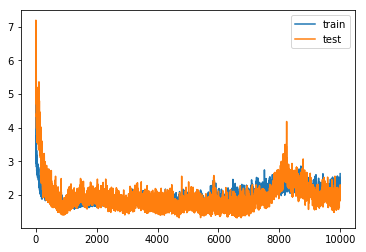

In [18]:
#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=10000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [19]:
import os
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0

In [186]:
yhat = model.predict(validateX)

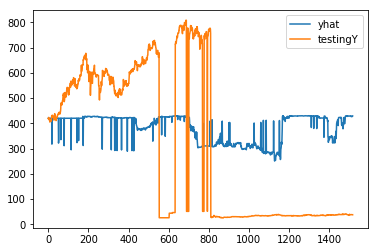

In [187]:
pyplot.plot(yhat.flatten(), label='yhat')
pyplot.plot(validateY.flatten(), label='testingY')
pyplot.legend()
pyplot.show()
#plt.axis([0,500,0,55000])

In [147]:
initial_capital = 10000
growth = []
for i in range(len(yhat)):
    print(initial_capital)
    prediction = yhat[i]
    real_value = testingY[i]
    prediction2 = yhat[i + 1]
    real_value2 = testingY[i + 1]
    if prediction2 > prediction:
        initial_capital = initial_capital * (real_value2 / real_value)
    elif prediction2 < prediction:
        initial_capital = initial_capital * (real_value / real_value2)
    growth.append(initial_capital)

10000
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.736105557775
10659.73610555777

IndexError: index 845 is out of bounds for axis 0 with size 845

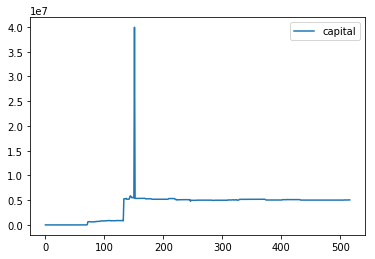

In [191]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [193]:
import numpy
numpy.savetxt("theYtests", validateY.flatten(), delimiter=",")
numpy.savetxt("theYhats", yhat.flatten(), delimiter=",")

In [ ]:
pyplot.plot(growth, label='capital')
pyplot.legend()
pyplot.show()

In [20]:
from keras.models import load_model
model.save("ALFAA.h5")
del model  
#model = load_model('AC.h5')

In [ ]:
my_data_frame_sum = all_variables.iloc[:,6]
my_data_frame = all_variables.drop(['Date', 'Adj Close.5'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("ASURB.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 5s - loss: 2.9620 - val_loss: 6.1795
Epoch 2/2000
 - 1s - loss: 3.9062 - val_loss: 6.6626
Epoch 3/2000
 - 1s - loss: 3.3772 - val_loss: 7.1969
Epoch 4/2000
 - 1s - loss: 3.3653 - val_loss: 7.5909
Epoch 5/2000
 - 1s - loss: 3.5304 - val_loss: 7.2031
Epoch 6/2000
 - 1s - loss: 3.0938 - val_loss: 7.4135
Epoch 7/2000
 - 1s - loss: 2.9281 - val_loss: 6.8305
Epoch 8/2000
 - 1s - loss: 2.9522 - val_loss: 6.9016
Epoch 9/2000
 - 1s - loss: 2.8614 - val_loss: 6.5250
Epoch 10/2000
 - 1s - loss: 2.7527 - val_loss: 6.1590
Epoch 11/2000
 - 1s - loss: 2.8970 - val_loss: 6.3845
Epoch 12/2000
 - 1s - loss: 2.8100 - val_loss: 5.4824
Epoch 13/2000
 - 1s - loss: 2.6933 - val_loss: 5.6655
Epoch 14/2000
 - 1s - loss: 2.8356 - val_loss: 5.8331
Epoch 15/2000
 - 1s - loss: 2.9907 - val_loss: 5.1609
Epoch 16/2000
 - 1s - loss: 2.7738 - val_loss: 5.5997
Epoch 17/2000
 - 1s - loss: 2.7195 - val_loss: 5.1665
Epoch 18/2000
 - 1s - loss: 2.7759 - val_loss

 - 1s - loss: 1.9369 - val_loss: 3.2854
Epoch 152/2000
 - 1s - loss: 1.8379 - val_loss: 3.1520
Epoch 153/2000
 - 1s - loss: 1.7489 - val_loss: 3.2223
Epoch 154/2000
 - 1s - loss: 1.7113 - val_loss: 2.9722
Epoch 155/2000
 - 1s - loss: 1.7071 - val_loss: 3.1409
Epoch 156/2000
 - 1s - loss: 1.8566 - val_loss: 3.2670
Epoch 157/2000
 - 1s - loss: 1.8337 - val_loss: 3.2366
Epoch 158/2000
 - 1s - loss: 1.7355 - val_loss: 3.0361
Epoch 159/2000
 - 1s - loss: 2.1488 - val_loss: 3.3290
Epoch 160/2000
 - 1s - loss: 1.7586 - val_loss: 3.1976
Epoch 161/2000
 - 1s - loss: 2.0253 - val_loss: 2.8070
Epoch 162/2000
 - 1s - loss: 1.8331 - val_loss: 2.9576
Epoch 163/2000
 - 1s - loss: 1.7254 - val_loss: 2.8851
Epoch 164/2000
 - 1s - loss: 1.7773 - val_loss: 2.6190
Epoch 165/2000
 - 1s - loss: 1.7750 - val_loss: 2.9090
Epoch 166/2000
 - 1s - loss: 1.7114 - val_loss: 3.1529
Epoch 167/2000
 - 1s - loss: 1.7171 - val_loss: 2.9364
Epoch 168/2000
 - 1s - loss: 1.7040 - val_loss: 3.0408
Epoch 169/2000
 - 1s - lo

 - 1s - loss: 1.6496 - val_loss: 2.2866
Epoch 301/2000
 - 1s - loss: 1.7244 - val_loss: 1.9803
Epoch 302/2000
 - 1s - loss: 1.6421 - val_loss: 2.4770
Epoch 303/2000
 - 1s - loss: 1.7508 - val_loss: 2.1559
Epoch 304/2000
 - 1s - loss: 1.6809 - val_loss: 2.2962
Epoch 305/2000
 - 1s - loss: 1.6814 - val_loss: 2.1092
Epoch 306/2000
 - 1s - loss: 1.6853 - val_loss: 2.5131
Epoch 307/2000
 - 1s - loss: 1.6467 - val_loss: 2.2612
Epoch 308/2000
 - 1s - loss: 1.5824 - val_loss: 2.2575
Epoch 309/2000
 - 1s - loss: 1.6356 - val_loss: 2.5026
Epoch 310/2000
 - 1s - loss: 1.6770 - val_loss: 2.0904
Epoch 311/2000
 - 1s - loss: 1.7004 - val_loss: 2.2858
Epoch 312/2000
 - 1s - loss: 1.6295 - val_loss: 2.3264
Epoch 313/2000
 - 1s - loss: 1.6602 - val_loss: 2.5381
Epoch 314/2000
 - 1s - loss: 1.6253 - val_loss: 2.4663
Epoch 315/2000
 - 1s - loss: 1.7069 - val_loss: 2.5176
Epoch 316/2000
 - 1s - loss: 1.6968 - val_loss: 2.5541
Epoch 317/2000
 - 1s - loss: 1.7171 - val_loss: 2.7983
Epoch 318/2000
 - 1s - lo

 - 1s - loss: 1.5935 - val_loss: 1.9398
Epoch 450/2000
 - 1s - loss: 1.6159 - val_loss: 1.8528
Epoch 451/2000
 - 1s - loss: 1.6311 - val_loss: 1.7513
Epoch 452/2000
 - 1s - loss: 1.6324 - val_loss: 2.1264
Epoch 453/2000
 - 1s - loss: 1.6192 - val_loss: 2.0665
Epoch 454/2000
 - 1s - loss: 1.6942 - val_loss: 1.9072
Epoch 455/2000
 - 1s - loss: 1.6201 - val_loss: 1.7730
Epoch 456/2000
 - 1s - loss: 1.6907 - val_loss: 1.9273
Epoch 457/2000
 - 1s - loss: 1.7002 - val_loss: 1.7921
Epoch 458/2000
 - 1s - loss: 1.6132 - val_loss: 2.1488
Epoch 459/2000
 - 1s - loss: 1.5933 - val_loss: 2.4470
Epoch 460/2000
 - 1s - loss: 1.6458 - val_loss: 1.7659
Epoch 461/2000
 - 1s - loss: 1.6224 - val_loss: 1.7650
Epoch 462/2000
 - 1s - loss: 1.6348 - val_loss: 1.9254
Epoch 463/2000
 - 1s - loss: 1.6022 - val_loss: 2.1357
Epoch 464/2000
 - 1s - loss: 1.6074 - val_loss: 2.2769
Epoch 465/2000
 - 1s - loss: 1.5431 - val_loss: 1.9283
Epoch 466/2000
 - 2s - loss: 1.6184 - val_loss: 1.7593
Epoch 467/2000
 - 2s - lo

 - 1s - loss: 1.5254 - val_loss: 1.5512
Epoch 599/2000
 - 1s - loss: 1.4900 - val_loss: 1.6918
Epoch 600/2000
 - 1s - loss: 1.5927 - val_loss: 1.6592
Epoch 601/2000
 - 1s - loss: 1.6164 - val_loss: 1.6612
Epoch 602/2000
 - 1s - loss: 1.6471 - val_loss: 1.9145
Epoch 603/2000
 - 1s - loss: 1.6605 - val_loss: 1.5537
Epoch 604/2000
 - 1s - loss: 1.5656 - val_loss: 1.7454
Epoch 605/2000
 - 1s - loss: 1.5698 - val_loss: 1.5190
Epoch 606/2000
 - 1s - loss: 1.5238 - val_loss: 1.6438
Epoch 607/2000
 - 1s - loss: 1.5555 - val_loss: 1.8533
Epoch 608/2000
 - 2s - loss: 1.5446 - val_loss: 1.4892
Epoch 609/2000
 - 2s - loss: 1.5932 - val_loss: 1.5378
Epoch 610/2000
 - 2s - loss: 1.6431 - val_loss: 1.7252
Epoch 611/2000
 - 2s - loss: 1.5815 - val_loss: 1.8112
Epoch 612/2000
 - 1s - loss: 1.5796 - val_loss: 1.5180
Epoch 613/2000
 - 1s - loss: 1.6164 - val_loss: 1.8592
Epoch 614/2000
 - 1s - loss: 1.5936 - val_loss: 1.5421
Epoch 615/2000
 - 1s - loss: 1.5622 - val_loss: 1.7873
Epoch 616/2000
 - 1s - lo

 - 1s - loss: 1.6831 - val_loss: 1.6628
Epoch 748/2000
 - 1s - loss: 1.5785 - val_loss: 1.7828
Epoch 749/2000
 - 1s - loss: 1.5509 - val_loss: 1.7833
Epoch 750/2000
 - 1s - loss: 1.6556 - val_loss: 1.7810
Epoch 751/2000
 - 1s - loss: 1.5310 - val_loss: 1.6798
Epoch 752/2000
 - 1s - loss: 1.5749 - val_loss: 1.6222
Epoch 753/2000
 - 1s - loss: 1.6320 - val_loss: 1.5921
Epoch 754/2000
 - 1s - loss: 1.6604 - val_loss: 1.7993
Epoch 755/2000
 - 1s - loss: 1.5640 - val_loss: 1.5368
Epoch 756/2000
 - 1s - loss: 1.5281 - val_loss: 1.7253
Epoch 757/2000
 - 1s - loss: 1.6189 - val_loss: 1.6782
Epoch 758/2000
 - 1s - loss: 1.6161 - val_loss: 1.8062
Epoch 759/2000
 - 1s - loss: 1.5876 - val_loss: 1.7357
Epoch 760/2000
 - 1s - loss: 1.5473 - val_loss: 1.6796
Epoch 761/2000
 - 1s - loss: 1.7161 - val_loss: 1.8742
Epoch 762/2000
 - 1s - loss: 1.7219 - val_loss: 1.6686
Epoch 763/2000
 - 1s - loss: 1.6023 - val_loss: 1.6467
Epoch 764/2000
 - 1s - loss: 1.6143 - val_loss: 1.6640
Epoch 765/2000
 - 1s - lo

 - 1s - loss: 1.6839 - val_loss: 1.6020
Epoch 897/2000
 - 1s - loss: 1.5072 - val_loss: 1.9089
Epoch 898/2000
 - 1s - loss: 1.5997 - val_loss: 1.7043
Epoch 899/2000
 - 1s - loss: 1.6327 - val_loss: 1.5169
Epoch 900/2000
 - 1s - loss: 1.5380 - val_loss: 1.9315
Epoch 901/2000
 - 1s - loss: 1.5893 - val_loss: 1.6555
Epoch 902/2000
 - 1s - loss: 1.6220 - val_loss: 1.8012
Epoch 903/2000
 - 1s - loss: 1.5246 - val_loss: 1.6735
Epoch 904/2000
 - 1s - loss: 1.5731 - val_loss: 1.7553
Epoch 905/2000
 - 1s - loss: 1.6383 - val_loss: 1.5616
Epoch 906/2000
 - 1s - loss: 1.5597 - val_loss: 1.9193
Epoch 907/2000
 - 1s - loss: 1.5662 - val_loss: 1.8001
Epoch 908/2000
 - 1s - loss: 1.6100 - val_loss: 1.6122
Epoch 909/2000
 - 1s - loss: 1.6203 - val_loss: 1.5663
Epoch 910/2000
 - 1s - loss: 1.6160 - val_loss: 1.7181
Epoch 911/2000
 - 1s - loss: 1.6428 - val_loss: 1.7581
Epoch 912/2000
 - 1s - loss: 1.5134 - val_loss: 1.7898
Epoch 913/2000
 - 1s - loss: 1.5402 - val_loss: 1.9251
Epoch 914/2000
 - 1s - lo

Epoch 1045/2000
 - 1s - loss: 1.5687 - val_loss: 1.8094
Epoch 1046/2000
 - 1s - loss: 1.5950 - val_loss: 1.7107
Epoch 1047/2000
 - 1s - loss: 1.5260 - val_loss: 1.7708
Epoch 1048/2000
 - 1s - loss: 1.6137 - val_loss: 1.6212
Epoch 1049/2000
 - 1s - loss: 1.5300 - val_loss: 1.7040
Epoch 1050/2000
 - 1s - loss: 1.5175 - val_loss: 1.8165
Epoch 1051/2000
 - 1s - loss: 1.5000 - val_loss: 1.7912
Epoch 1052/2000
 - 1s - loss: 1.6272 - val_loss: 1.6198
Epoch 1053/2000
 - 1s - loss: 1.5750 - val_loss: 1.6278
Epoch 1054/2000
 - 1s - loss: 1.5164 - val_loss: 1.7335
Epoch 1055/2000
 - 1s - loss: 1.5480 - val_loss: 1.6605
Epoch 1056/2000
 - 1s - loss: 1.5286 - val_loss: 1.9077
Epoch 1057/2000
 - 1s - loss: 1.6583 - val_loss: 1.9433
Epoch 1058/2000
 - 1s - loss: 1.6083 - val_loss: 1.8876
Epoch 1059/2000
 - 1s - loss: 1.4777 - val_loss: 1.9572
Epoch 1060/2000
 - 1s - loss: 1.6258 - val_loss: 1.6288
Epoch 1061/2000
 - 1s - loss: 1.5236 - val_loss: 1.8257
Epoch 1062/2000
 - 1s - loss: 1.5410 - val_loss:

Epoch 1192/2000
 - 1s - loss: 1.5287 - val_loss: 1.6402
Epoch 1193/2000
 - 1s - loss: 1.5029 - val_loss: 1.6738
Epoch 1194/2000
 - 1s - loss: 1.5173 - val_loss: 1.8085
Epoch 1195/2000
 - 1s - loss: 1.4607 - val_loss: 1.7649
Epoch 1196/2000
 - 1s - loss: 1.5368 - val_loss: 1.5386
Epoch 1197/2000
 - 1s - loss: 1.4900 - val_loss: 1.8189
Epoch 1198/2000
 - 1s - loss: 1.5272 - val_loss: 1.6634
Epoch 1199/2000
 - 1s - loss: 1.5125 - val_loss: 1.5710
Epoch 1200/2000
 - 1s - loss: 1.5208 - val_loss: 1.6748
Epoch 1201/2000
 - 1s - loss: 1.4780 - val_loss: 1.7930
Epoch 1202/2000
 - 1s - loss: 1.5028 - val_loss: 1.7472
Epoch 1203/2000
 - 1s - loss: 1.5019 - val_loss: 1.6534
Epoch 1204/2000
 - 1s - loss: 1.5458 - val_loss: 1.7442
Epoch 1205/2000
 - 1s - loss: 1.5457 - val_loss: 1.6358
Epoch 1206/2000
 - 1s - loss: 1.6695 - val_loss: 1.5623
Epoch 1207/2000
 - 1s - loss: 1.5562 - val_loss: 1.6720
Epoch 1208/2000
 - 1s - loss: 1.5584 - val_loss: 1.5768
Epoch 1209/2000
 - 1s - loss: 1.5792 - val_loss:

Epoch 1339/2000
 - 1s - loss: 1.5104 - val_loss: 1.5271
Epoch 1340/2000
 - 1s - loss: 1.4980 - val_loss: 1.6322
Epoch 1341/2000
 - 1s - loss: 1.5095 - val_loss: 1.6865
Epoch 1342/2000
 - 1s - loss: 1.5605 - val_loss: 1.4938
Epoch 1343/2000
 - 1s - loss: 1.5783 - val_loss: 1.6005
Epoch 1344/2000
 - 1s - loss: 1.5329 - val_loss: 1.6543
Epoch 1345/2000
 - 1s - loss: 1.5367 - val_loss: 1.5908
Epoch 1346/2000
 - 1s - loss: 1.5440 - val_loss: 1.5950
Epoch 1347/2000
 - 1s - loss: 1.5156 - val_loss: 1.5391
Epoch 1348/2000
 - 1s - loss: 1.5079 - val_loss: 1.5887
Epoch 1349/2000
 - 1s - loss: 1.4534 - val_loss: 1.5851
Epoch 1350/2000
 - 1s - loss: 1.4800 - val_loss: 1.6738
Epoch 1351/2000
 - 1s - loss: 1.5160 - val_loss: 1.4210
Epoch 1352/2000
 - 1s - loss: 1.4290 - val_loss: 1.4910
Epoch 1353/2000
 - 1s - loss: 1.4339 - val_loss: 1.6579
Epoch 1354/2000
 - 1s - loss: 1.4517 - val_loss: 1.4940
Epoch 1355/2000
 - 1s - loss: 1.4346 - val_loss: 1.7814
Epoch 1356/2000
 - 1s - loss: 1.5413 - val_loss:

Epoch 1486/2000
 - 1s - loss: 1.4757 - val_loss: 1.4746
Epoch 1487/2000
 - 1s - loss: 1.5580 - val_loss: 1.4929
Epoch 1488/2000
 - 1s - loss: 1.4637 - val_loss: 1.4974
Epoch 1489/2000
 - 1s - loss: 1.5127 - val_loss: 1.4853
Epoch 1490/2000
 - 1s - loss: 1.4909 - val_loss: 1.5957
Epoch 1491/2000
 - 1s - loss: 1.5005 - val_loss: 1.7669
Epoch 1492/2000
 - 1s - loss: 1.4473 - val_loss: 1.3889
Epoch 1493/2000
 - 1s - loss: 1.4873 - val_loss: 1.3984
Epoch 1494/2000
 - 1s - loss: 1.4454 - val_loss: 1.6500
Epoch 1495/2000
 - 1s - loss: 1.5175 - val_loss: 1.5707
Epoch 1496/2000
 - 1s - loss: 1.4300 - val_loss: 1.6338
Epoch 1497/2000
 - 1s - loss: 1.4535 - val_loss: 1.4841
Epoch 1498/2000
 - 1s - loss: 1.4900 - val_loss: 1.5087
Epoch 1499/2000
 - 1s - loss: 1.5549 - val_loss: 1.5851
Epoch 1500/2000
 - 1s - loss: 1.5943 - val_loss: 1.8177
Epoch 1501/2000
 - 1s - loss: 1.5894 - val_loss: 1.5167
Epoch 1502/2000
 - 1s - loss: 1.5350 - val_loss: 1.5470
Epoch 1503/2000
 - 1s - loss: 1.4695 - val_loss:

Epoch 1633/2000
 - 1s - loss: 1.5405 - val_loss: 1.6352
Epoch 1634/2000
 - 1s - loss: 1.4659 - val_loss: 1.8934
Epoch 1635/2000
 - 1s - loss: 1.5290 - val_loss: 1.6070
Epoch 1636/2000
 - 1s - loss: 1.5127 - val_loss: 1.7947
Epoch 1637/2000
 - 1s - loss: 1.5143 - val_loss: 1.5627
Epoch 1638/2000
 - 1s - loss: 1.4523 - val_loss: 1.6462
Epoch 1639/2000
 - 1s - loss: 1.4418 - val_loss: 1.6934
Epoch 1640/2000
 - 1s - loss: 1.5151 - val_loss: 1.5295
Epoch 1641/2000
 - 1s - loss: 1.4545 - val_loss: 1.6145
Epoch 1642/2000
 - 1s - loss: 1.4923 - val_loss: 1.6652
Epoch 1643/2000
 - 1s - loss: 1.5495 - val_loss: 1.4078
Epoch 1644/2000
 - 1s - loss: 1.5444 - val_loss: 1.5606
Epoch 1645/2000
 - 1s - loss: 1.5986 - val_loss: 1.6497
Epoch 1646/2000
 - 1s - loss: 1.5351 - val_loss: 1.5718
Epoch 1647/2000
 - 1s - loss: 1.5552 - val_loss: 1.4830
Epoch 1648/2000
 - 1s - loss: 1.4964 - val_loss: 1.6598
Epoch 1649/2000
 - 1s - loss: 1.4928 - val_loss: 1.6504
Epoch 1650/2000
 - 1s - loss: 1.5274 - val_loss:

Epoch 1780/2000
 - 1s - loss: 1.5267 - val_loss: 1.5327
Epoch 1781/2000
 - 1s - loss: 1.5028 - val_loss: 1.6199
Epoch 1782/2000
 - 1s - loss: 1.4466 - val_loss: 1.6588
Epoch 1783/2000
 - 1s - loss: 1.5283 - val_loss: 1.5374
Epoch 1784/2000
 - 1s - loss: 1.5077 - val_loss: 1.5005
Epoch 1785/2000
 - 1s - loss: 1.5631 - val_loss: 1.5499
Epoch 1786/2000
 - 1s - loss: 1.4878 - val_loss: 1.7108
Epoch 1787/2000
 - 1s - loss: 1.5196 - val_loss: 1.5597
Epoch 1788/2000
 - 1s - loss: 1.5028 - val_loss: 1.8037
Epoch 1789/2000
 - 1s - loss: 1.5015 - val_loss: 1.5808
Epoch 1790/2000
 - 1s - loss: 1.4214 - val_loss: 1.6525
Epoch 1791/2000
 - 1s - loss: 1.5223 - val_loss: 1.5774
Epoch 1792/2000
 - 1s - loss: 1.5674 - val_loss: 1.5329
Epoch 1793/2000
 - 1s - loss: 1.5249 - val_loss: 1.6425
Epoch 1794/2000
 - 1s - loss: 1.5291 - val_loss: 1.5427
Epoch 1795/2000
 - 1s - loss: 1.5080 - val_loss: 1.5291
Epoch 1796/2000
 - 1s - loss: 1.5053 - val_loss: 1.7346
Epoch 1797/2000
 - 1s - loss: 1.4791 - val_loss:

Epoch 1927/2000
 - 1s - loss: 1.6053 - val_loss: 1.4153
Epoch 1928/2000
 - 1s - loss: 1.5001 - val_loss: 1.6841
Epoch 1929/2000
 - 1s - loss: 1.5011 - val_loss: 1.6594
Epoch 1930/2000
 - 1s - loss: 1.5417 - val_loss: 1.4966
Epoch 1931/2000
 - 1s - loss: 1.5041 - val_loss: 1.6624
Epoch 1932/2000
 - 1s - loss: 1.5125 - val_loss: 1.5847
Epoch 1933/2000
 - 1s - loss: 1.5338 - val_loss: 1.6054
Epoch 1934/2000
 - 1s - loss: 1.4792 - val_loss: 1.5601
Epoch 1935/2000
 - 1s - loss: 1.5535 - val_loss: 1.6663
Epoch 1936/2000
 - 1s - loss: 1.4926 - val_loss: 1.6349
Epoch 1937/2000
 - 1s - loss: 1.5551 - val_loss: 1.7216
Epoch 1938/2000
 - 1s - loss: 1.4604 - val_loss: 1.5122
Epoch 1939/2000
 - 1s - loss: 1.5113 - val_loss: 1.7180
Epoch 1940/2000
 - 1s - loss: 1.5222 - val_loss: 1.7341
Epoch 1941/2000
 - 1s - loss: 1.4959 - val_loss: 1.5075
Epoch 1942/2000
 - 1s - loss: 1.5204 - val_loss: 1.5586
Epoch 1943/2000
 - 1s - loss: 1.5003 - val_loss: 1.4377
Epoch 1944/2000
 - 1s - loss: 1.5446 - val_loss:

In [28]:
my_data_frame_sum = all_variables.iloc[:,9]
my_data_frame = all_variables.drop(['Date', 'Adj Close.8'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("BIMBOA.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 2.6972 - val_loss: 6.3316
Epoch 2/2000
 - 0s - loss: 4.1116 - val_loss: 6.8203
Epoch 3/2000
 - 0s - loss: 4.2791 - val_loss: 7.1593
Epoch 4/2000
 - 0s - loss: 3.9891 - val_loss: 7.6120
Epoch 5/2000
 - 0s - loss: 4.0083 - val_loss: 7.9048
Epoch 6/2000
 - 0s - loss: 3.4352 - val_loss: 7.9244
Epoch 7/2000
 - 0s - loss: 3.5367 - val_loss: 7.7495
Epoch 8/2000
 - 0s - loss: 3.4000 - val_loss: 7.8659
Epoch 9/2000
 - 0s - loss: 3.3317 - val_loss: 7.8467
Epoch 10/2000
 - 0s - loss: 3.3403 - val_loss: 8.0945
Epoch 11/2000
 - 0s - loss: 3.3820 - val_loss: 7.9831
Epoch 12/2000
 - 0s - loss: 3.3781 - val_loss: 7.6639
Epoch 13/2000
 - 0s - loss: 3.4222 - val_loss: 7.9563
Epoch 14/2000
 - 0s - loss: 3.3176 - val_loss: 7.7360
Epoch 15/2000
 - 0s - loss: 3.0052 - val_loss: 7.8009
Epoch 16/2000
 - 0s - loss: 3.1558 - val_loss: 7.0379
Epoch 17/2000
 - 0s - loss: 2.6969 - val_loss: 7.1492
Epoch 18/2000
 - 0s - loss: 2.6808 - val_loss

 - 0s - loss: 1.7326 - val_loss: 2.8619
Epoch 152/2000
 - 0s - loss: 1.6912 - val_loss: 3.2366
Epoch 153/2000
 - 0s - loss: 1.8012 - val_loss: 3.1085
Epoch 154/2000
 - 0s - loss: 1.7312 - val_loss: 3.2980
Epoch 155/2000
 - 0s - loss: 1.8295 - val_loss: 2.8861
Epoch 156/2000
 - 0s - loss: 1.7908 - val_loss: 2.4195
Epoch 157/2000
 - 0s - loss: 1.7752 - val_loss: 2.6701
Epoch 158/2000
 - 0s - loss: 1.7549 - val_loss: 2.7852
Epoch 159/2000
 - 0s - loss: 2.1145 - val_loss: 2.7048
Epoch 160/2000
 - 0s - loss: 1.8410 - val_loss: 2.9639
Epoch 161/2000
 - 0s - loss: 1.7945 - val_loss: 2.6723
Epoch 162/2000
 - 0s - loss: 1.8034 - val_loss: 3.0178
Epoch 163/2000
 - 0s - loss: 1.8064 - val_loss: 3.1060
Epoch 164/2000
 - 0s - loss: 1.7800 - val_loss: 2.9069
Epoch 165/2000
 - 0s - loss: 1.8296 - val_loss: 2.9619
Epoch 166/2000
 - 0s - loss: 1.8238 - val_loss: 2.6052
Epoch 167/2000
 - 0s - loss: 1.6865 - val_loss: 3.2348
Epoch 168/2000
 - 0s - loss: 1.8180 - val_loss: 2.5621
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 1.6870 - val_loss: 2.1425
Epoch 301/2000
 - 0s - loss: 1.6726 - val_loss: 2.3328
Epoch 302/2000
 - 0s - loss: 1.6726 - val_loss: 2.0553
Epoch 303/2000
 - 0s - loss: 1.6398 - val_loss: 1.9081
Epoch 304/2000
 - 0s - loss: 1.6563 - val_loss: 2.5867
Epoch 305/2000
 - 0s - loss: 1.6505 - val_loss: 2.0339
Epoch 306/2000
 - 0s - loss: 1.6227 - val_loss: 2.1233
Epoch 307/2000
 - 0s - loss: 1.6690 - val_loss: 1.9100
Epoch 308/2000
 - 0s - loss: 1.8494 - val_loss: 1.9319
Epoch 309/2000
 - 0s - loss: 1.8370 - val_loss: 2.2833
Epoch 310/2000
 - 0s - loss: 1.7816 - val_loss: 2.3243
Epoch 311/2000
 - 0s - loss: 1.7313 - val_loss: 1.9310
Epoch 312/2000
 - 0s - loss: 1.6737 - val_loss: 2.1941
Epoch 313/2000
 - 0s - loss: 1.8702 - val_loss: 1.7724
Epoch 314/2000
 - 0s - loss: 1.7167 - val_loss: 1.9350
Epoch 315/2000
 - 0s - loss: 1.7461 - val_loss: 2.0882
Epoch 316/2000
 - 0s - loss: 1.6214 - val_loss: 2.0017
Epoch 317/2000
 - 0s - loss: 1.6930 - val_loss: 2.0383
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 1.6582 - val_loss: 1.7918
Epoch 450/2000
 - 0s - loss: 1.6404 - val_loss: 2.0516
Epoch 451/2000
 - 0s - loss: 1.6466 - val_loss: 1.6866
Epoch 452/2000
 - 0s - loss: 1.6532 - val_loss: 2.1905
Epoch 453/2000
 - 0s - loss: 1.7048 - val_loss: 1.9322
Epoch 454/2000
 - 0s - loss: 1.6070 - val_loss: 1.6858
Epoch 455/2000
 - 0s - loss: 1.7061 - val_loss: 1.7100
Epoch 456/2000
 - 0s - loss: 1.7103 - val_loss: 1.7382
Epoch 457/2000
 - 0s - loss: 1.6980 - val_loss: 1.9560
Epoch 458/2000
 - 0s - loss: 1.6337 - val_loss: 1.6523
Epoch 459/2000
 - 0s - loss: 1.5943 - val_loss: 1.7519
Epoch 460/2000
 - 0s - loss: 1.6683 - val_loss: 2.0167
Epoch 461/2000
 - 0s - loss: 1.6081 - val_loss: 1.6358
Epoch 462/2000
 - 0s - loss: 1.7093 - val_loss: 2.0947
Epoch 463/2000
 - 0s - loss: 1.6654 - val_loss: 1.7269
Epoch 464/2000
 - 0s - loss: 1.7153 - val_loss: 1.8694
Epoch 465/2000
 - 0s - loss: 1.8308 - val_loss: 1.7699
Epoch 466/2000
 - 0s - loss: 1.6609 - val_loss: 1.5791
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 1.7464 - val_loss: 1.6832
Epoch 599/2000
 - 0s - loss: 1.7321 - val_loss: 1.6703
Epoch 600/2000
 - 0s - loss: 1.7177 - val_loss: 1.9180
Epoch 601/2000
 - 0s - loss: 1.7202 - val_loss: 1.7184
Epoch 602/2000
 - 0s - loss: 1.6589 - val_loss: 1.8724
Epoch 603/2000
 - 0s - loss: 1.7427 - val_loss: 1.7637
Epoch 604/2000
 - 0s - loss: 1.7566 - val_loss: 1.8432
Epoch 605/2000
 - 0s - loss: 1.7121 - val_loss: 1.6150
Epoch 606/2000
 - 0s - loss: 1.6696 - val_loss: 1.6847
Epoch 607/2000
 - 0s - loss: 1.6494 - val_loss: 1.7323
Epoch 608/2000
 - 0s - loss: 1.6547 - val_loss: 1.8965
Epoch 609/2000
 - 0s - loss: 1.6314 - val_loss: 1.7038
Epoch 610/2000
 - 0s - loss: 1.6914 - val_loss: 1.7501
Epoch 611/2000
 - 0s - loss: 1.6968 - val_loss: 1.7519
Epoch 612/2000
 - 0s - loss: 1.5822 - val_loss: 1.6105
Epoch 613/2000
 - 0s - loss: 1.6901 - val_loss: 1.6098
Epoch 614/2000
 - 0s - loss: 1.6521 - val_loss: 2.1564
Epoch 615/2000
 - 0s - loss: 1.7869 - val_loss: 1.8773
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 1.6124 - val_loss: 1.7768
Epoch 748/2000
 - 0s - loss: 1.6634 - val_loss: 1.6838
Epoch 749/2000
 - 0s - loss: 1.6971 - val_loss: 1.7996
Epoch 750/2000
 - 0s - loss: 1.6463 - val_loss: 1.7374
Epoch 751/2000
 - 0s - loss: 1.6867 - val_loss: 2.0574
Epoch 752/2000
 - 0s - loss: 1.6259 - val_loss: 1.9026
Epoch 753/2000
 - 0s - loss: 1.6433 - val_loss: 1.7583
Epoch 754/2000
 - 0s - loss: 1.8621 - val_loss: 1.8639
Epoch 755/2000
 - 0s - loss: 1.6679 - val_loss: 1.9407
Epoch 756/2000
 - 0s - loss: 1.6763 - val_loss: 1.8636
Epoch 757/2000
 - 0s - loss: 1.7982 - val_loss: 1.9054
Epoch 758/2000
 - 0s - loss: 1.7618 - val_loss: 1.9005
Epoch 759/2000
 - 0s - loss: 1.6798 - val_loss: 2.2812
Epoch 760/2000
 - 0s - loss: 1.6793 - val_loss: 2.1834
Epoch 761/2000
 - 0s - loss: 1.6805 - val_loss: 2.1096
Epoch 762/2000
 - 0s - loss: 1.6542 - val_loss: 2.4384
Epoch 763/2000
 - 0s - loss: 1.9641 - val_loss: 1.6289
Epoch 764/2000
 - 0s - loss: 1.6487 - val_loss: 1.9820
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 1.6696 - val_loss: 1.7580
Epoch 897/2000
 - 0s - loss: 1.6078 - val_loss: 1.6173
Epoch 898/2000
 - 0s - loss: 1.8310 - val_loss: 1.6391
Epoch 899/2000
 - 0s - loss: 1.6569 - val_loss: 1.9676
Epoch 900/2000
 - 0s - loss: 1.6867 - val_loss: 1.6580
Epoch 901/2000
 - 0s - loss: 1.7071 - val_loss: 1.6895
Epoch 902/2000
 - 0s - loss: 1.6787 - val_loss: 1.6782
Epoch 903/2000
 - 0s - loss: 1.6631 - val_loss: 1.6577
Epoch 904/2000
 - 0s - loss: 1.6395 - val_loss: 1.8972
Epoch 905/2000
 - 0s - loss: 1.6898 - val_loss: 1.8022
Epoch 906/2000
 - 0s - loss: 1.7060 - val_loss: 1.6381
Epoch 907/2000
 - 0s - loss: 1.6427 - val_loss: 1.7197
Epoch 908/2000
 - 0s - loss: 1.7478 - val_loss: 2.0882
Epoch 909/2000
 - 0s - loss: 1.7426 - val_loss: 1.7174
Epoch 910/2000
 - 0s - loss: 1.6080 - val_loss: 1.6061
Epoch 911/2000
 - 0s - loss: 1.6427 - val_loss: 1.6031
Epoch 912/2000
 - 0s - loss: 1.6425 - val_loss: 1.8406
Epoch 913/2000
 - 0s - loss: 1.6297 - val_loss: 1.7098
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 1.6239 - val_loss: 1.8994
Epoch 1046/2000
 - 0s - loss: 1.6653 - val_loss: 1.7711
Epoch 1047/2000
 - 0s - loss: 1.6596 - val_loss: 1.7832
Epoch 1048/2000
 - 0s - loss: 1.5872 - val_loss: 1.7978
Epoch 1049/2000
 - 0s - loss: 1.7273 - val_loss: 1.9027
Epoch 1050/2000
 - 0s - loss: 1.5859 - val_loss: 1.8273
Epoch 1051/2000
 - 0s - loss: 1.6004 - val_loss: 1.9532
Epoch 1052/2000
 - 0s - loss: 1.6958 - val_loss: 1.7965
Epoch 1053/2000
 - 0s - loss: 1.5975 - val_loss: 1.7044
Epoch 1054/2000
 - 0s - loss: 1.5678 - val_loss: 1.6233
Epoch 1055/2000
 - 0s - loss: 1.6585 - val_loss: 1.6626
Epoch 1056/2000
 - 0s - loss: 1.6606 - val_loss: 1.8603
Epoch 1057/2000
 - 0s - loss: 1.6094 - val_loss: 1.6130
Epoch 1058/2000
 - 0s - loss: 1.5724 - val_loss: 1.6148
Epoch 1059/2000
 - 0s - loss: 1.6275 - val_loss: 1.6568
Epoch 1060/2000
 - 0s - loss: 1.7562 - val_loss: 1.5589
Epoch 1061/2000
 - 0s - loss: 1.6870 - val_loss: 1.9077
Epoch 1062/2000
 - 0s - loss: 1.7682 - val_loss:

Epoch 1192/2000
 - 0s - loss: 1.7919 - val_loss: 2.0691
Epoch 1193/2000
 - 0s - loss: 1.8110 - val_loss: 1.8723
Epoch 1194/2000
 - 0s - loss: 1.7327 - val_loss: 1.8286
Epoch 1195/2000
 - 0s - loss: 1.6777 - val_loss: 1.8211
Epoch 1196/2000
 - 0s - loss: 1.8155 - val_loss: 2.0258
Epoch 1197/2000
 - 0s - loss: 1.6818 - val_loss: 2.0467
Epoch 1198/2000
 - 0s - loss: 1.7185 - val_loss: 1.9370
Epoch 1199/2000
 - 0s - loss: 1.8230 - val_loss: 2.0907
Epoch 1200/2000
 - 0s - loss: 1.7104 - val_loss: 1.8040
Epoch 1201/2000
 - 0s - loss: 1.6708 - val_loss: 2.0219
Epoch 1202/2000
 - 0s - loss: 1.7595 - val_loss: 1.9509
Epoch 1203/2000
 - 0s - loss: 1.6666 - val_loss: 1.9711
Epoch 1204/2000
 - 0s - loss: 1.7576 - val_loss: 1.7828
Epoch 1205/2000
 - 0s - loss: 1.7155 - val_loss: 1.7679
Epoch 1206/2000
 - 0s - loss: 1.8207 - val_loss: 1.8054
Epoch 1207/2000
 - 0s - loss: 1.6845 - val_loss: 1.8792
Epoch 1208/2000
 - 0s - loss: 1.7037 - val_loss: 1.9336
Epoch 1209/2000
 - 0s - loss: 1.7743 - val_loss:

Epoch 1339/2000
 - 0s - loss: 1.7402 - val_loss: 1.5253
Epoch 1340/2000
 - 0s - loss: 1.6365 - val_loss: 1.7406
Epoch 1341/2000
 - 0s - loss: 1.7330 - val_loss: 1.6654
Epoch 1342/2000
 - 0s - loss: 1.7034 - val_loss: 1.7524
Epoch 1343/2000
 - 0s - loss: 1.7602 - val_loss: 1.9104
Epoch 1344/2000
 - 0s - loss: 1.6685 - val_loss: 1.8245
Epoch 1345/2000
 - 0s - loss: 1.7057 - val_loss: 1.7318
Epoch 1346/2000
 - 0s - loss: 1.7873 - val_loss: 1.6369
Epoch 1347/2000
 - 0s - loss: 1.7699 - val_loss: 1.7595
Epoch 1348/2000
 - 0s - loss: 1.6980 - val_loss: 1.8347
Epoch 1349/2000
 - 0s - loss: 1.8359 - val_loss: 1.6898
Epoch 1350/2000
 - 0s - loss: 1.6329 - val_loss: 1.6040
Epoch 1351/2000
 - 0s - loss: 1.6906 - val_loss: 1.7562
Epoch 1352/2000
 - 0s - loss: 1.7967 - val_loss: 1.6615
Epoch 1353/2000
 - 0s - loss: 1.6575 - val_loss: 1.6079
Epoch 1354/2000
 - 0s - loss: 1.6498 - val_loss: 1.6950
Epoch 1355/2000
 - 0s - loss: 1.7706 - val_loss: 1.8579
Epoch 1356/2000
 - 0s - loss: 1.6727 - val_loss:

Epoch 1486/2000
 - 0s - loss: 1.7874 - val_loss: 2.0135
Epoch 1487/2000
 - 0s - loss: 1.6796 - val_loss: 2.0463
Epoch 1488/2000
 - 0s - loss: 1.6313 - val_loss: 1.8921
Epoch 1489/2000
 - 0s - loss: 1.7528 - val_loss: 2.0312
Epoch 1490/2000
 - 0s - loss: 1.7365 - val_loss: 1.9933
Epoch 1491/2000
 - 0s - loss: 1.8012 - val_loss: 2.0864
Epoch 1492/2000
 - 0s - loss: 1.7570 - val_loss: 2.0640
Epoch 1493/2000
 - 0s - loss: 1.7626 - val_loss: 1.8781
Epoch 1494/2000
 - 0s - loss: 1.7435 - val_loss: 2.0782
Epoch 1495/2000
 - 0s - loss: 1.7743 - val_loss: 1.7945
Epoch 1496/2000
 - 0s - loss: 1.7966 - val_loss: 2.0373
Epoch 1497/2000
 - 0s - loss: 1.7746 - val_loss: 2.0280
Epoch 1498/2000
 - 0s - loss: 1.8305 - val_loss: 1.9997
Epoch 1499/2000
 - 0s - loss: 1.7930 - val_loss: 1.9700
Epoch 1500/2000
 - 0s - loss: 1.7527 - val_loss: 1.9111
Epoch 1501/2000
 - 0s - loss: 1.7079 - val_loss: 2.0453
Epoch 1502/2000
 - 0s - loss: 1.6380 - val_loss: 1.8755
Epoch 1503/2000
 - 0s - loss: 1.7838 - val_loss:

Epoch 1633/2000
 - 0s - loss: 1.6613 - val_loss: 1.9722
Epoch 1634/2000
 - 0s - loss: 1.7492 - val_loss: 1.9744
Epoch 1635/2000
 - 0s - loss: 1.7343 - val_loss: 1.7416
Epoch 1636/2000
 - 0s - loss: 1.7844 - val_loss: 2.0120
Epoch 1637/2000
 - 0s - loss: 1.8769 - val_loss: 1.9906
Epoch 1638/2000
 - 0s - loss: 1.7898 - val_loss: 1.9459
Epoch 1639/2000
 - 0s - loss: 1.7931 - val_loss: 2.0581
Epoch 1640/2000
 - 0s - loss: 1.7555 - val_loss: 1.8405
Epoch 1641/2000
 - 0s - loss: 1.7805 - val_loss: 1.9548
Epoch 1642/2000
 - 0s - loss: 1.7411 - val_loss: 1.8341
Epoch 1643/2000
 - 0s - loss: 1.7370 - val_loss: 1.8605
Epoch 1644/2000
 - 0s - loss: 1.6774 - val_loss: 1.8800
Epoch 1645/2000
 - 0s - loss: 1.7495 - val_loss: 2.0630
Epoch 1646/2000
 - 0s - loss: 1.7082 - val_loss: 1.8008
Epoch 1647/2000
 - 0s - loss: 1.7305 - val_loss: 2.0833
Epoch 1648/2000
 - 0s - loss: 1.8673 - val_loss: 1.9599
Epoch 1649/2000
 - 0s - loss: 1.6430 - val_loss: 1.9436
Epoch 1650/2000
 - 0s - loss: 1.6944 - val_loss:

Epoch 1780/2000
 - 0s - loss: 1.7338 - val_loss: 1.8701
Epoch 1781/2000
 - 0s - loss: 1.5987 - val_loss: 1.9689
Epoch 1782/2000
 - 0s - loss: 1.7369 - val_loss: 1.7645
Epoch 1783/2000
 - 0s - loss: 1.6808 - val_loss: 1.8420
Epoch 1784/2000
 - 0s - loss: 1.7276 - val_loss: 1.8566
Epoch 1785/2000
 - 0s - loss: 1.6556 - val_loss: 1.8561
Epoch 1786/2000
 - 0s - loss: 1.6537 - val_loss: 1.9486
Epoch 1787/2000
 - 0s - loss: 1.6713 - val_loss: 1.9161
Epoch 1788/2000
 - 0s - loss: 1.7349 - val_loss: 1.8137
Epoch 1789/2000
 - 0s - loss: 1.7075 - val_loss: 1.7925
Epoch 1790/2000
 - 0s - loss: 1.6445 - val_loss: 1.7952
Epoch 1791/2000
 - 0s - loss: 1.6754 - val_loss: 1.9039
Epoch 1792/2000
 - 0s - loss: 1.6866 - val_loss: 1.8551
Epoch 1793/2000
 - 0s - loss: 1.7386 - val_loss: 1.9099
Epoch 1794/2000
 - 0s - loss: 1.8281 - val_loss: 2.1711
Epoch 1795/2000
 - 0s - loss: 1.6707 - val_loss: 2.2530
Epoch 1796/2000
 - 0s - loss: 1.7481 - val_loss: 1.7863
Epoch 1797/2000
 - 0s - loss: 1.7132 - val_loss:

Epoch 1927/2000
 - 0s - loss: 1.7422 - val_loss: 1.6844
Epoch 1928/2000
 - 0s - loss: 1.6486 - val_loss: 1.8040
Epoch 1929/2000
 - 0s - loss: 1.6549 - val_loss: 1.8286
Epoch 1930/2000
 - 0s - loss: 1.6538 - val_loss: 1.8616
Epoch 1931/2000
 - 0s - loss: 1.7727 - val_loss: 1.6519
Epoch 1932/2000
 - 0s - loss: 1.7080 - val_loss: 1.7401
Epoch 1933/2000
 - 0s - loss: 1.7157 - val_loss: 2.0794
Epoch 1934/2000
 - 0s - loss: 1.7587 - val_loss: 1.8390
Epoch 1935/2000
 - 0s - loss: 1.7795 - val_loss: 1.8812
Epoch 1936/2000
 - 0s - loss: 1.7712 - val_loss: 2.4154
Epoch 1937/2000
 - 0s - loss: 1.7789 - val_loss: 1.7645
Epoch 1938/2000
 - 0s - loss: 1.6850 - val_loss: 1.6969
Epoch 1939/2000
 - 0s - loss: 1.7262 - val_loss: 1.9553
Epoch 1940/2000
 - 0s - loss: 1.7076 - val_loss: 1.8019
Epoch 1941/2000
 - 0s - loss: 1.6892 - val_loss: 1.8993
Epoch 1942/2000
 - 0s - loss: 1.7683 - val_loss: 1.7681
Epoch 1943/2000
 - 0s - loss: 1.7542 - val_loss: 1.8707
Epoch 1944/2000
 - 0s - loss: 1.7593 - val_loss:

In [29]:
my_data_frame_sum = all_variables.iloc[:,12]
my_data_frame = all_variables.drop(['Date', 'Adj Close.11'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("CHDRAUI.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 3.1573 - val_loss: 6.0065
Epoch 2/2000
 - 0s - loss: 4.3748 - val_loss: 6.4136
Epoch 3/2000
 - 0s - loss: 4.1008 - val_loss: 6.9487
Epoch 4/2000
 - 0s - loss: 4.3353 - val_loss: 7.2980
Epoch 5/2000
 - 0s - loss: 4.1634 - val_loss: 7.6902
Epoch 6/2000
 - 0s - loss: 4.2116 - val_loss: 7.9992
Epoch 7/2000
 - 0s - loss: 4.0613 - val_loss: 7.8940
Epoch 8/2000
 - 0s - loss: 3.7755 - val_loss: 8.0011
Epoch 9/2000
 - 0s - loss: 3.7471 - val_loss: 8.3362
Epoch 10/2000
 - 0s - loss: 3.9594 - val_loss: 8.1440
Epoch 11/2000
 - 0s - loss: 3.7860 - val_loss: 8.0659
Epoch 12/2000
 - 0s - loss: 3.4336 - val_loss: 8.1741
Epoch 13/2000
 - 0s - loss: 3.5896 - val_loss: 7.4801
Epoch 14/2000
 - 0s - loss: 3.3594 - val_loss: 7.8356
Epoch 15/2000
 - 0s - loss: 3.3964 - val_loss: 7.4399
Epoch 16/2000
 - 0s - loss: 3.2406 - val_loss: 6.9609
Epoch 17/2000
 - 0s - loss: 3.2641 - val_loss: 7.2427
Epoch 18/2000
 - 0s - loss: 3.2781 - val_loss

 - 0s - loss: 1.9476 - val_loss: 2.7794
Epoch 152/2000
 - 0s - loss: 2.1228 - val_loss: 2.5284
Epoch 153/2000
 - 0s - loss: 2.0566 - val_loss: 2.4336
Epoch 154/2000
 - 0s - loss: 2.0552 - val_loss: 2.3777
Epoch 155/2000
 - 0s - loss: 1.9598 - val_loss: 2.7181
Epoch 156/2000
 - 0s - loss: 1.8704 - val_loss: 3.2757
Epoch 157/2000
 - 0s - loss: 1.9674 - val_loss: 2.7269
Epoch 158/2000
 - 0s - loss: 1.9291 - val_loss: 2.6027
Epoch 159/2000
 - 0s - loss: 2.1698 - val_loss: 2.8778
Epoch 160/2000
 - 0s - loss: 2.0463 - val_loss: 2.8912
Epoch 161/2000
 - 0s - loss: 1.9785 - val_loss: 2.5990
Epoch 162/2000
 - 0s - loss: 1.8626 - val_loss: 2.6443
Epoch 163/2000
 - 0s - loss: 1.9486 - val_loss: 2.4934
Epoch 164/2000
 - 0s - loss: 1.8995 - val_loss: 2.8638
Epoch 165/2000
 - 0s - loss: 2.0599 - val_loss: 2.5653
Epoch 166/2000
 - 0s - loss: 1.9359 - val_loss: 2.5345
Epoch 167/2000
 - 0s - loss: 1.8653 - val_loss: 2.7317
Epoch 168/2000
 - 0s - loss: 1.8654 - val_loss: 3.0481
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 1.8883 - val_loss: 2.5511
Epoch 301/2000
 - 0s - loss: 1.8149 - val_loss: 2.3207
Epoch 302/2000
 - 0s - loss: 1.6921 - val_loss: 2.6063
Epoch 303/2000
 - 0s - loss: 1.8002 - val_loss: 2.2072
Epoch 304/2000
 - 0s - loss: 1.7460 - val_loss: 1.9412
Epoch 305/2000
 - 0s - loss: 1.7391 - val_loss: 2.0410
Epoch 306/2000
 - 0s - loss: 1.9458 - val_loss: 2.1789
Epoch 307/2000
 - 0s - loss: 1.7335 - val_loss: 2.1959
Epoch 308/2000
 - 0s - loss: 1.8773 - val_loss: 2.0150
Epoch 309/2000
 - 0s - loss: 1.7709 - val_loss: 2.1812
Epoch 310/2000
 - 0s - loss: 1.8902 - val_loss: 2.1019
Epoch 311/2000
 - 0s - loss: 1.7692 - val_loss: 2.5301
Epoch 312/2000
 - 0s - loss: 1.7659 - val_loss: 2.3353
Epoch 313/2000
 - 0s - loss: 1.8315 - val_loss: 2.6033
Epoch 314/2000
 - 0s - loss: 1.6787 - val_loss: 2.2920
Epoch 315/2000
 - 0s - loss: 1.8386 - val_loss: 2.2162
Epoch 316/2000
 - 0s - loss: 1.8521 - val_loss: 2.3991
Epoch 317/2000
 - 0s - loss: 1.8240 - val_loss: 1.9339
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 1.7442 - val_loss: 2.5083
Epoch 450/2000
 - 0s - loss: 1.7890 - val_loss: 1.7667
Epoch 451/2000
 - 0s - loss: 1.7098 - val_loss: 1.8726
Epoch 452/2000
 - 0s - loss: 1.8313 - val_loss: 2.0385
Epoch 453/2000
 - 0s - loss: 1.7004 - val_loss: 2.2227
Epoch 454/2000
 - 0s - loss: 1.7912 - val_loss: 2.2548
Epoch 455/2000
 - 0s - loss: 1.6347 - val_loss: 2.1861
Epoch 456/2000
 - 0s - loss: 1.6582 - val_loss: 2.1128
Epoch 457/2000
 - 0s - loss: 1.7073 - val_loss: 1.8749
Epoch 458/2000
 - 0s - loss: 1.7336 - val_loss: 1.9363
Epoch 459/2000
 - 0s - loss: 1.7279 - val_loss: 2.0653
Epoch 460/2000
 - 0s - loss: 1.7953 - val_loss: 1.8513
Epoch 461/2000
 - 0s - loss: 1.7246 - val_loss: 1.9375
Epoch 462/2000
 - 0s - loss: 1.9571 - val_loss: 1.9183
Epoch 463/2000
 - 0s - loss: 1.7464 - val_loss: 2.2572
Epoch 464/2000
 - 0s - loss: 1.8444 - val_loss: 1.7648
Epoch 465/2000
 - 0s - loss: 1.7428 - val_loss: 2.1628
Epoch 466/2000
 - 0s - loss: 1.7095 - val_loss: 2.1437
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 1.7862 - val_loss: 2.0086
Epoch 599/2000
 - 0s - loss: 1.6743 - val_loss: 1.9597
Epoch 600/2000
 - 0s - loss: 1.8045 - val_loss: 1.9797
Epoch 601/2000
 - 0s - loss: 1.7300 - val_loss: 2.1064
Epoch 602/2000
 - 0s - loss: 1.8180 - val_loss: 1.9658
Epoch 603/2000
 - 0s - loss: 1.8116 - val_loss: 1.9852
Epoch 604/2000
 - 0s - loss: 1.8081 - val_loss: 1.7887
Epoch 605/2000
 - 0s - loss: 1.8441 - val_loss: 1.9820
Epoch 606/2000
 - 0s - loss: 1.8587 - val_loss: 2.2985
Epoch 607/2000
 - 0s - loss: 1.7926 - val_loss: 2.5337
Epoch 608/2000
 - 0s - loss: 1.7158 - val_loss: 2.1592
Epoch 609/2000
 - 0s - loss: 1.8006 - val_loss: 2.2733
Epoch 610/2000
 - 0s - loss: 1.9973 - val_loss: 1.9483
Epoch 611/2000
 - 0s - loss: 1.7505 - val_loss: 2.5144
Epoch 612/2000
 - 0s - loss: 1.7564 - val_loss: 2.7562
Epoch 613/2000
 - 0s - loss: 1.8362 - val_loss: 1.8793
Epoch 614/2000
 - 0s - loss: 1.7227 - val_loss: 2.1256
Epoch 615/2000
 - 0s - loss: 1.7661 - val_loss: 2.3120
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 1.7377 - val_loss: 1.7202
Epoch 748/2000
 - 0s - loss: 1.8060 - val_loss: 1.9351
Epoch 749/2000
 - 0s - loss: 1.7993 - val_loss: 1.9451
Epoch 750/2000
 - 0s - loss: 1.7293 - val_loss: 1.9449
Epoch 751/2000
 - 0s - loss: 1.7910 - val_loss: 1.9360
Epoch 752/2000
 - 0s - loss: 1.7047 - val_loss: 1.7506
Epoch 753/2000
 - 0s - loss: 1.6995 - val_loss: 1.7378
Epoch 754/2000
 - 0s - loss: 1.7855 - val_loss: 1.8288
Epoch 755/2000
 - 0s - loss: 1.8555 - val_loss: 2.0177
Epoch 756/2000
 - 0s - loss: 1.7903 - val_loss: 1.9478
Epoch 757/2000
 - 0s - loss: 1.7389 - val_loss: 1.9516
Epoch 758/2000
 - 0s - loss: 1.8365 - val_loss: 1.8957
Epoch 759/2000
 - 0s - loss: 1.7690 - val_loss: 1.8618
Epoch 760/2000
 - 0s - loss: 1.6831 - val_loss: 1.9818
Epoch 761/2000
 - 0s - loss: 1.7992 - val_loss: 1.8386
Epoch 762/2000
 - 0s - loss: 1.8420 - val_loss: 1.9953
Epoch 763/2000
 - 0s - loss: 1.7519 - val_loss: 1.8975
Epoch 764/2000
 - 0s - loss: 1.6741 - val_loss: 1.8005
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 1.7276 - val_loss: 1.5430
Epoch 897/2000
 - 0s - loss: 1.7609 - val_loss: 1.6420
Epoch 898/2000
 - 0s - loss: 1.8118 - val_loss: 1.6207
Epoch 899/2000
 - 0s - loss: 1.6461 - val_loss: 1.7836
Epoch 900/2000
 - 0s - loss: 1.7030 - val_loss: 1.5969
Epoch 901/2000
 - 0s - loss: 1.7743 - val_loss: 1.5489
Epoch 902/2000
 - 0s - loss: 1.7070 - val_loss: 1.5581
Epoch 903/2000
 - 0s - loss: 1.6255 - val_loss: 1.6065
Epoch 904/2000
 - 0s - loss: 1.6449 - val_loss: 1.5490
Epoch 905/2000
 - 0s - loss: 1.8146 - val_loss: 1.5505
Epoch 906/2000
 - 0s - loss: 1.8221 - val_loss: 1.6207
Epoch 907/2000
 - 0s - loss: 1.6904 - val_loss: 1.7324
Epoch 908/2000
 - 0s - loss: 1.7245 - val_loss: 1.5170
Epoch 909/2000
 - 0s - loss: 1.7706 - val_loss: 1.5318
Epoch 910/2000
 - 0s - loss: 1.6953 - val_loss: 1.5712
Epoch 911/2000
 - 0s - loss: 1.7797 - val_loss: 1.7496
Epoch 912/2000
 - 0s - loss: 1.7619 - val_loss: 1.5884
Epoch 913/2000
 - 0s - loss: 1.7637 - val_loss: 1.6612
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 1.7667 - val_loss: 1.5186
Epoch 1046/2000
 - 0s - loss: 1.7083 - val_loss: 1.6904
Epoch 1047/2000
 - 0s - loss: 1.8664 - val_loss: 1.5572
Epoch 1048/2000
 - 0s - loss: 1.8200 - val_loss: 1.6463
Epoch 1049/2000
 - 0s - loss: 1.8457 - val_loss: 1.6406
Epoch 1050/2000
 - 0s - loss: 1.7813 - val_loss: 1.6690
Epoch 1051/2000
 - 0s - loss: 1.8181 - val_loss: 1.6598
Epoch 1052/2000
 - 0s - loss: 1.7675 - val_loss: 1.5843
Epoch 1053/2000
 - 0s - loss: 1.7388 - val_loss: 1.5827
Epoch 1054/2000
 - 0s - loss: 1.7129 - val_loss: 1.9047
Epoch 1055/2000
 - 0s - loss: 1.7227 - val_loss: 1.5751
Epoch 1056/2000
 - 0s - loss: 1.6259 - val_loss: 1.8592
Epoch 1057/2000
 - 0s - loss: 1.6902 - val_loss: 1.5938
Epoch 1058/2000
 - 0s - loss: 1.7616 - val_loss: 1.6499
Epoch 1059/2000
 - 0s - loss: 1.6787 - val_loss: 1.8380
Epoch 1060/2000
 - 0s - loss: 1.7264 - val_loss: 1.4203
Epoch 1061/2000
 - 0s - loss: 1.7328 - val_loss: 1.6824
Epoch 1062/2000
 - 0s - loss: 1.7925 - val_loss:

Epoch 1192/2000
 - 0s - loss: 1.7478 - val_loss: 1.5591
Epoch 1193/2000
 - 0s - loss: 1.7169 - val_loss: 1.6482
Epoch 1194/2000
 - 0s - loss: 1.8578 - val_loss: 1.5474
Epoch 1195/2000
 - 0s - loss: 1.8134 - val_loss: 1.7937
Epoch 1196/2000
 - 0s - loss: 1.7054 - val_loss: 1.5639
Epoch 1197/2000
 - 0s - loss: 1.8088 - val_loss: 1.7603
Epoch 1198/2000
 - 0s - loss: 1.7668 - val_loss: 1.6340
Epoch 1199/2000
 - 0s - loss: 1.7611 - val_loss: 1.6865
Epoch 1200/2000
 - 0s - loss: 1.8581 - val_loss: 1.6776
Epoch 1201/2000
 - 0s - loss: 1.9487 - val_loss: 1.8070
Epoch 1202/2000
 - 0s - loss: 1.8692 - val_loss: 1.7204
Epoch 1203/2000
 - 0s - loss: 1.7424 - val_loss: 1.5415
Epoch 1204/2000
 - 0s - loss: 1.7950 - val_loss: 1.6918
Epoch 1205/2000
 - 0s - loss: 1.9271 - val_loss: 1.5384
Epoch 1206/2000
 - 0s - loss: 1.8339 - val_loss: 1.6315
Epoch 1207/2000
 - 0s - loss: 1.6893 - val_loss: 1.5245
Epoch 1208/2000
 - 0s - loss: 1.8445 - val_loss: 1.5723
Epoch 1209/2000
 - 0s - loss: 1.7638 - val_loss:

Epoch 1339/2000
 - 0s - loss: 1.7525 - val_loss: 1.6929
Epoch 1340/2000
 - 0s - loss: 1.7681 - val_loss: 1.6569
Epoch 1341/2000
 - 0s - loss: 1.7145 - val_loss: 1.7568
Epoch 1342/2000
 - 0s - loss: 1.7160 - val_loss: 1.9472
Epoch 1343/2000
 - 0s - loss: 1.8336 - val_loss: 1.7717
Epoch 1344/2000
 - 0s - loss: 1.6552 - val_loss: 1.8777
Epoch 1345/2000
 - 0s - loss: 1.7443 - val_loss: 1.7310
Epoch 1346/2000
 - 0s - loss: 1.7760 - val_loss: 1.5786
Epoch 1347/2000
 - 0s - loss: 1.7160 - val_loss: 1.8033
Epoch 1348/2000
 - 0s - loss: 1.7841 - val_loss: 1.6558
Epoch 1349/2000
 - 0s - loss: 1.7520 - val_loss: 1.6322
Epoch 1350/2000
 - 0s - loss: 1.6370 - val_loss: 2.0408
Epoch 1351/2000
 - 0s - loss: 1.7883 - val_loss: 1.6622
Epoch 1352/2000
 - 0s - loss: 1.6485 - val_loss: 1.6867
Epoch 1353/2000
 - 0s - loss: 1.7459 - val_loss: 1.5206
Epoch 1354/2000
 - 0s - loss: 1.7875 - val_loss: 1.9116
Epoch 1355/2000
 - 0s - loss: 1.8180 - val_loss: 1.8312
Epoch 1356/2000
 - 0s - loss: 1.6198 - val_loss:

Epoch 1486/2000
 - 0s - loss: 1.6616 - val_loss: 1.8140
Epoch 1487/2000
 - 0s - loss: 1.6819 - val_loss: 1.8974
Epoch 1488/2000
 - 0s - loss: 1.8586 - val_loss: 1.6311
Epoch 1489/2000
 - 0s - loss: 1.8039 - val_loss: 1.7189
Epoch 1490/2000
 - 0s - loss: 1.7025 - val_loss: 1.7435
Epoch 1491/2000
 - 0s - loss: 1.7314 - val_loss: 1.7201
Epoch 1492/2000
 - 0s - loss: 1.7019 - val_loss: 1.9288
Epoch 1493/2000
 - 0s - loss: 1.7275 - val_loss: 1.7199
Epoch 1494/2000
 - 0s - loss: 1.6918 - val_loss: 1.7927
Epoch 1495/2000
 - 0s - loss: 1.6755 - val_loss: 1.6233
Epoch 1496/2000
 - 0s - loss: 1.7837 - val_loss: 1.8432
Epoch 1497/2000
 - 0s - loss: 1.6963 - val_loss: 1.9495
Epoch 1498/2000
 - 0s - loss: 1.7630 - val_loss: 1.7510
Epoch 1499/2000
 - 0s - loss: 1.6744 - val_loss: 1.8847
Epoch 1500/2000
 - 0s - loss: 1.7361 - val_loss: 1.7218
Epoch 1501/2000
 - 0s - loss: 1.7215 - val_loss: 1.8283
Epoch 1502/2000
 - 0s - loss: 1.6953 - val_loss: 1.9912
Epoch 1503/2000
 - 0s - loss: 1.6875 - val_loss:

Epoch 1633/2000
 - 0s - loss: 1.6458 - val_loss: 1.7564
Epoch 1634/2000
 - 0s - loss: 1.7264 - val_loss: 1.6576
Epoch 1635/2000
 - 0s - loss: 1.7773 - val_loss: 1.6567
Epoch 1636/2000
 - 0s - loss: 1.7258 - val_loss: 1.6763
Epoch 1637/2000
 - 0s - loss: 1.6678 - val_loss: 1.6557
Epoch 1638/2000
 - 0s - loss: 1.7002 - val_loss: 1.9325
Epoch 1639/2000
 - 0s - loss: 1.6995 - val_loss: 1.7772
Epoch 1640/2000
 - 0s - loss: 1.7336 - val_loss: 1.7903
Epoch 1641/2000
 - 0s - loss: 1.7238 - val_loss: 1.9514
Epoch 1642/2000
 - 0s - loss: 1.7300 - val_loss: 1.6318
Epoch 1643/2000
 - 0s - loss: 1.7655 - val_loss: 1.7897
Epoch 1644/2000
 - 0s - loss: 1.8492 - val_loss: 1.6995
Epoch 1645/2000
 - 0s - loss: 1.7188 - val_loss: 1.7583
Epoch 1646/2000
 - 0s - loss: 1.7897 - val_loss: 1.7490
Epoch 1647/2000
 - 0s - loss: 1.7916 - val_loss: 1.7724
Epoch 1648/2000
 - 0s - loss: 1.7604 - val_loss: 1.7114
Epoch 1649/2000
 - 0s - loss: 1.7569 - val_loss: 1.8490
Epoch 1650/2000
 - 0s - loss: 1.7956 - val_loss:

Epoch 1780/2000
 - 0s - loss: 1.7261 - val_loss: 1.5135
Epoch 1781/2000
 - 0s - loss: 1.7895 - val_loss: 1.6354
Epoch 1782/2000
 - 0s - loss: 1.7936 - val_loss: 1.6021
Epoch 1783/2000
 - 0s - loss: 1.7621 - val_loss: 1.5399
Epoch 1784/2000
 - 0s - loss: 1.7555 - val_loss: 1.5007
Epoch 1785/2000
 - 0s - loss: 1.8147 - val_loss: 1.5538
Epoch 1786/2000
 - 0s - loss: 1.7972 - val_loss: 1.5689
Epoch 1787/2000
 - 0s - loss: 1.7734 - val_loss: 1.6295
Epoch 1788/2000
 - 0s - loss: 1.7346 - val_loss: 1.7380
Epoch 1789/2000
 - 0s - loss: 1.8016 - val_loss: 1.6761
Epoch 1790/2000
 - 0s - loss: 1.7719 - val_loss: 1.6222
Epoch 1791/2000
 - 0s - loss: 1.7513 - val_loss: 1.5872
Epoch 1792/2000
 - 0s - loss: 1.7595 - val_loss: 1.5571
Epoch 1793/2000
 - 0s - loss: 1.7215 - val_loss: 1.8377
Epoch 1794/2000
 - 0s - loss: 1.6765 - val_loss: 1.6506
Epoch 1795/2000
 - 0s - loss: 1.7346 - val_loss: 1.6101
Epoch 1796/2000
 - 0s - loss: 1.7302 - val_loss: 1.6121
Epoch 1797/2000
 - 0s - loss: 1.8373 - val_loss:

Epoch 1927/2000
 - 0s - loss: 1.6918 - val_loss: 1.7150
Epoch 1928/2000
 - 0s - loss: 1.6213 - val_loss: 1.5654
Epoch 1929/2000
 - 0s - loss: 1.7149 - val_loss: 1.5695
Epoch 1930/2000
 - 0s - loss: 1.8508 - val_loss: 1.7328
Epoch 1931/2000
 - 0s - loss: 1.9326 - val_loss: 1.7918
Epoch 1932/2000
 - 0s - loss: 1.6805 - val_loss: 1.5756
Epoch 1933/2000
 - 0s - loss: 1.7529 - val_loss: 1.6966
Epoch 1934/2000
 - 0s - loss: 1.8148 - val_loss: 1.6253
Epoch 1935/2000
 - 0s - loss: 1.7821 - val_loss: 1.5410
Epoch 1936/2000
 - 0s - loss: 1.7265 - val_loss: 1.7695
Epoch 1937/2000
 - 0s - loss: 1.7297 - val_loss: 1.7955
Epoch 1938/2000
 - 0s - loss: 1.6384 - val_loss: 1.7256
Epoch 1939/2000
 - 0s - loss: 1.7579 - val_loss: 1.5263
Epoch 1940/2000
 - 0s - loss: 1.6934 - val_loss: 1.7399
Epoch 1941/2000
 - 0s - loss: 1.7025 - val_loss: 1.8171
Epoch 1942/2000
 - 0s - loss: 1.7604 - val_loss: 1.7729
Epoch 1943/2000
 - 0s - loss: 1.8537 - val_loss: 1.7378
Epoch 1944/2000
 - 0s - loss: 1.7601 - val_loss:

In [30]:
my_data_frame_sum = all_variables.iloc[:,15]
my_data_frame = all_variables.drop(['Date', 'Adj Close.14'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("FEMSAUBD.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 3.1356 - val_loss: 6.1737
Epoch 2/2000
 - 0s - loss: 3.9967 - val_loss: 6.6949
Epoch 3/2000
 - 0s - loss: 4.1310 - val_loss: 6.9845
Epoch 4/2000
 - 0s - loss: 3.3866 - val_loss: 7.4293
Epoch 5/2000
 - 0s - loss: 3.0435 - val_loss: 7.4327
Epoch 6/2000
 - 0s - loss: 2.9996 - val_loss: 7.2136
Epoch 7/2000
 - 0s - loss: 2.7928 - val_loss: 6.7947
Epoch 8/2000
 - 0s - loss: 2.8153 - val_loss: 6.2504
Epoch 9/2000
 - 0s - loss: 2.7011 - val_loss: 6.8583
Epoch 10/2000
 - 0s - loss: 2.7014 - val_loss: 6.2700
Epoch 11/2000
 - 0s - loss: 2.8638 - val_loss: 5.9354
Epoch 12/2000
 - 0s - loss: 2.7216 - val_loss: 5.5761
Epoch 13/2000
 - 0s - loss: 2.6416 - val_loss: 5.8982
Epoch 14/2000
 - 0s - loss: 2.5515 - val_loss: 4.9999
Epoch 15/2000
 - 0s - loss: 2.3650 - val_loss: 5.2433
Epoch 16/2000
 - 0s - loss: 2.5031 - val_loss: 4.5061
Epoch 17/2000
 - 0s - loss: 2.3171 - val_loss: 4.5659
Epoch 18/2000
 - 0s - loss: 2.1670 - val_loss

 - 0s - loss: 1.7674 - val_loss: 2.9732
Epoch 152/2000
 - 0s - loss: 1.7485 - val_loss: 3.0060
Epoch 153/2000
 - 0s - loss: 1.7739 - val_loss: 2.7194
Epoch 154/2000
 - 0s - loss: 1.7027 - val_loss: 2.7408
Epoch 155/2000
 - 0s - loss: 1.7781 - val_loss: 2.8599
Epoch 156/2000
 - 0s - loss: 1.8038 - val_loss: 2.9689
Epoch 157/2000
 - 0s - loss: 1.7003 - val_loss: 2.6790
Epoch 158/2000
 - 0s - loss: 1.6667 - val_loss: 2.8738
Epoch 159/2000
 - 0s - loss: 1.6075 - val_loss: 2.7354
Epoch 160/2000
 - 0s - loss: 1.7170 - val_loss: 2.7667
Epoch 161/2000
 - 0s - loss: 1.8123 - val_loss: 2.4988
Epoch 162/2000
 - 0s - loss: 1.7299 - val_loss: 2.7765
Epoch 163/2000
 - 0s - loss: 1.7380 - val_loss: 2.7870
Epoch 164/2000
 - 0s - loss: 1.8107 - val_loss: 2.8133
Epoch 165/2000
 - 0s - loss: 1.7075 - val_loss: 2.6258
Epoch 166/2000
 - 0s - loss: 1.6621 - val_loss: 2.8190
Epoch 167/2000
 - 0s - loss: 1.6826 - val_loss: 2.5630
Epoch 168/2000
 - 0s - loss: 1.6881 - val_loss: 2.7945
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 1.7053 - val_loss: 2.2359
Epoch 301/2000
 - 0s - loss: 1.7574 - val_loss: 1.9910
Epoch 302/2000
 - 0s - loss: 1.6871 - val_loss: 1.9742
Epoch 303/2000
 - 0s - loss: 1.6697 - val_loss: 2.0361
Epoch 304/2000
 - 0s - loss: 1.8061 - val_loss: 1.9962
Epoch 305/2000
 - 0s - loss: 1.6875 - val_loss: 1.9348
Epoch 306/2000
 - 0s - loss: 1.7726 - val_loss: 2.2955
Epoch 307/2000
 - 0s - loss: 1.6147 - val_loss: 2.0228
Epoch 308/2000
 - 0s - loss: 1.7377 - val_loss: 1.8596
Epoch 309/2000
 - 0s - loss: 1.7493 - val_loss: 2.2457
Epoch 310/2000
 - 0s - loss: 1.7124 - val_loss: 2.2052
Epoch 311/2000
 - 0s - loss: 1.6232 - val_loss: 2.1975
Epoch 312/2000
 - 0s - loss: 1.6455 - val_loss: 2.1989
Epoch 313/2000
 - 0s - loss: 1.6797 - val_loss: 2.3251
Epoch 314/2000
 - 0s - loss: 1.7130 - val_loss: 2.3567
Epoch 315/2000
 - 0s - loss: 1.6146 - val_loss: 2.3962
Epoch 316/2000
 - 0s - loss: 1.6381 - val_loss: 1.9087
Epoch 317/2000
 - 0s - loss: 1.6956 - val_loss: 1.9192
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 1.6948 - val_loss: 1.7783
Epoch 450/2000
 - 0s - loss: 1.6596 - val_loss: 1.5881
Epoch 451/2000
 - 0s - loss: 1.6529 - val_loss: 1.6172
Epoch 452/2000
 - 0s - loss: 1.6541 - val_loss: 1.7001
Epoch 453/2000
 - 0s - loss: 1.6880 - val_loss: 1.7733
Epoch 454/2000
 - 0s - loss: 1.6367 - val_loss: 1.8991
Epoch 455/2000
 - 0s - loss: 1.6506 - val_loss: 1.4485
Epoch 456/2000
 - 0s - loss: 1.6606 - val_loss: 1.4595
Epoch 457/2000
 - 0s - loss: 1.5062 - val_loss: 1.8862
Epoch 458/2000
 - 0s - loss: 1.6186 - val_loss: 1.5113
Epoch 459/2000
 - 0s - loss: 1.5790 - val_loss: 1.9779
Epoch 460/2000
 - 0s - loss: 1.7032 - val_loss: 1.7558
Epoch 461/2000
 - 0s - loss: 1.6437 - val_loss: 1.5969
Epoch 462/2000
 - 0s - loss: 1.8053 - val_loss: 1.7126
Epoch 463/2000
 - 0s - loss: 1.6495 - val_loss: 1.6939
Epoch 464/2000
 - 0s - loss: 1.7305 - val_loss: 1.5546
Epoch 465/2000
 - 0s - loss: 1.6419 - val_loss: 1.5341
Epoch 466/2000
 - 0s - loss: 1.6069 - val_loss: 1.5933
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 1.5849 - val_loss: 1.4918
Epoch 599/2000
 - 0s - loss: 1.5628 - val_loss: 1.5412
Epoch 600/2000
 - 0s - loss: 1.7079 - val_loss: 1.5940
Epoch 601/2000
 - 0s - loss: 1.5766 - val_loss: 1.6030
Epoch 602/2000
 - 0s - loss: 1.5802 - val_loss: 1.4105
Epoch 603/2000
 - 0s - loss: 1.5563 - val_loss: 1.4715
Epoch 604/2000
 - 0s - loss: 1.5632 - val_loss: 1.5232
Epoch 605/2000
 - 0s - loss: 1.5561 - val_loss: 1.4046
Epoch 606/2000
 - 0s - loss: 1.5949 - val_loss: 1.6268
Epoch 607/2000
 - 0s - loss: 1.4808 - val_loss: 1.5038
Epoch 608/2000
 - 0s - loss: 1.5967 - val_loss: 1.7439
Epoch 609/2000
 - 0s - loss: 1.4992 - val_loss: 1.6445
Epoch 610/2000
 - 0s - loss: 1.5952 - val_loss: 1.8051
Epoch 611/2000
 - 0s - loss: 1.6493 - val_loss: 1.4554
Epoch 612/2000
 - 0s - loss: 1.5676 - val_loss: 1.8220
Epoch 613/2000
 - 0s - loss: 1.6214 - val_loss: 1.4517
Epoch 614/2000
 - 0s - loss: 1.5317 - val_loss: 1.7166
Epoch 615/2000
 - 0s - loss: 1.5224 - val_loss: 1.6038
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 1.5178 - val_loss: 1.5309
Epoch 748/2000
 - 0s - loss: 1.5186 - val_loss: 1.6332
Epoch 749/2000
 - 0s - loss: 1.5276 - val_loss: 1.6761
Epoch 750/2000
 - 0s - loss: 1.4390 - val_loss: 1.7248
Epoch 751/2000
 - 0s - loss: 1.5296 - val_loss: 1.5295
Epoch 752/2000
 - 0s - loss: 1.5554 - val_loss: 1.5360
Epoch 753/2000
 - 0s - loss: 1.5377 - val_loss: 1.4341
Epoch 754/2000
 - 0s - loss: 1.5696 - val_loss: 1.5282
Epoch 755/2000
 - 0s - loss: 1.6056 - val_loss: 1.5946
Epoch 756/2000
 - 0s - loss: 1.5313 - val_loss: 1.6002
Epoch 757/2000
 - 0s - loss: 1.5133 - val_loss: 1.5692
Epoch 758/2000
 - 0s - loss: 1.6229 - val_loss: 1.4071
Epoch 759/2000
 - 0s - loss: 1.5364 - val_loss: 1.2859
Epoch 760/2000
 - 0s - loss: 1.4924 - val_loss: 1.6063
Epoch 761/2000
 - 0s - loss: 1.4992 - val_loss: 1.6026
Epoch 762/2000
 - 0s - loss: 1.5062 - val_loss: 1.4807
Epoch 763/2000
 - 0s - loss: 1.4380 - val_loss: 1.5879
Epoch 764/2000
 - 0s - loss: 1.5922 - val_loss: 1.6791
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 1.4879 - val_loss: 1.4235
Epoch 897/2000
 - 0s - loss: 1.4881 - val_loss: 1.4326
Epoch 898/2000
 - 0s - loss: 1.4796 - val_loss: 1.5671
Epoch 899/2000
 - 0s - loss: 1.5454 - val_loss: 1.5591
Epoch 900/2000
 - 0s - loss: 1.5130 - val_loss: 1.5774
Epoch 901/2000
 - 0s - loss: 1.4581 - val_loss: 1.6721
Epoch 902/2000
 - 0s - loss: 1.4721 - val_loss: 1.6001
Epoch 903/2000
 - 0s - loss: 1.4231 - val_loss: 1.6048
Epoch 904/2000
 - 0s - loss: 1.4681 - val_loss: 1.4048
Epoch 905/2000
 - 0s - loss: 1.4009 - val_loss: 1.4617
Epoch 906/2000
 - 0s - loss: 1.4114 - val_loss: 1.8246
Epoch 907/2000
 - 0s - loss: 1.5351 - val_loss: 1.6209
Epoch 908/2000
 - 0s - loss: 1.4657 - val_loss: 1.4670
Epoch 909/2000
 - 0s - loss: 1.4339 - val_loss: 1.9611
Epoch 910/2000
 - 0s - loss: 1.5044 - val_loss: 1.8328
Epoch 911/2000
 - 0s - loss: 1.5312 - val_loss: 1.5283
Epoch 912/2000
 - 0s - loss: 1.4926 - val_loss: 1.5132
Epoch 913/2000
 - 0s - loss: 1.4795 - val_loss: 1.5430
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 1.5130 - val_loss: 1.7084
Epoch 1046/2000
 - 0s - loss: 1.5859 - val_loss: 1.4457
Epoch 1047/2000
 - 0s - loss: 1.5755 - val_loss: 1.5825
Epoch 1048/2000
 - 0s - loss: 1.5222 - val_loss: 1.6683
Epoch 1049/2000
 - 0s - loss: 1.5197 - val_loss: 1.7697
Epoch 1050/2000
 - 0s - loss: 1.4377 - val_loss: 1.6648
Epoch 1051/2000
 - 0s - loss: 1.4748 - val_loss: 1.5528
Epoch 1052/2000
 - 0s - loss: 1.5002 - val_loss: 1.6399
Epoch 1053/2000
 - 0s - loss: 1.4552 - val_loss: 1.7191
Epoch 1054/2000
 - 0s - loss: 1.4557 - val_loss: 1.5288
Epoch 1055/2000
 - 0s - loss: 1.4544 - val_loss: 1.5745
Epoch 1056/2000
 - 0s - loss: 1.4681 - val_loss: 1.5196
Epoch 1057/2000
 - 0s - loss: 1.4320 - val_loss: 1.6944
Epoch 1058/2000
 - 0s - loss: 1.5572 - val_loss: 1.6800
Epoch 1059/2000
 - 0s - loss: 1.4896 - val_loss: 1.3978
Epoch 1060/2000
 - 0s - loss: 1.5243 - val_loss: 1.7516
Epoch 1061/2000
 - 0s - loss: 1.4823 - val_loss: 1.4416
Epoch 1062/2000
 - 0s - loss: 1.4931 - val_loss:

Epoch 1192/2000
 - 0s - loss: 1.4151 - val_loss: 1.5353
Epoch 1193/2000
 - 0s - loss: 1.3866 - val_loss: 1.5539
Epoch 1194/2000
 - 0s - loss: 1.6038 - val_loss: 1.6747
Epoch 1195/2000
 - 0s - loss: 1.4001 - val_loss: 1.4104
Epoch 1196/2000
 - 0s - loss: 1.4027 - val_loss: 1.5253
Epoch 1197/2000
 - 0s - loss: 1.4017 - val_loss: 1.6434
Epoch 1198/2000
 - 0s - loss: 1.4477 - val_loss: 1.5183
Epoch 1199/2000
 - 0s - loss: 1.4707 - val_loss: 1.4903
Epoch 1200/2000
 - 0s - loss: 1.4142 - val_loss: 1.4558
Epoch 1201/2000
 - 0s - loss: 1.4039 - val_loss: 1.6237
Epoch 1202/2000
 - 0s - loss: 1.4831 - val_loss: 1.6464
Epoch 1203/2000
 - 0s - loss: 1.4314 - val_loss: 1.6097
Epoch 1204/2000
 - 0s - loss: 1.4115 - val_loss: 1.5141
Epoch 1205/2000
 - 0s - loss: 1.4443 - val_loss: 1.4886
Epoch 1206/2000
 - 0s - loss: 1.5006 - val_loss: 1.5039
Epoch 1207/2000
 - 0s - loss: 1.4133 - val_loss: 1.5306
Epoch 1208/2000
 - 0s - loss: 1.4375 - val_loss: 1.6593
Epoch 1209/2000
 - 0s - loss: 1.3920 - val_loss:

Epoch 1339/2000
 - 0s - loss: 1.3249 - val_loss: 1.5346
Epoch 1340/2000
 - 0s - loss: 1.4218 - val_loss: 1.4761
Epoch 1341/2000
 - 0s - loss: 1.3489 - val_loss: 1.5281
Epoch 1342/2000
 - 0s - loss: 1.4082 - val_loss: 1.5481
Epoch 1343/2000
 - 0s - loss: 1.3490 - val_loss: 1.3390
Epoch 1344/2000
 - 0s - loss: 1.4816 - val_loss: 1.2570
Epoch 1345/2000
 - 0s - loss: 1.4286 - val_loss: 1.3786
Epoch 1346/2000
 - 0s - loss: 1.3982 - val_loss: 1.2123
Epoch 1347/2000
 - 0s - loss: 1.3874 - val_loss: 1.4141
Epoch 1348/2000
 - 0s - loss: 1.4266 - val_loss: 1.3102
Epoch 1349/2000
 - 0s - loss: 1.3546 - val_loss: 1.5513
Epoch 1350/2000
 - 0s - loss: 1.3408 - val_loss: 1.5588
Epoch 1351/2000
 - 0s - loss: 1.3416 - val_loss: 1.6704
Epoch 1352/2000
 - 0s - loss: 1.4533 - val_loss: 1.5324
Epoch 1353/2000
 - 0s - loss: 1.3720 - val_loss: 1.3731
Epoch 1354/2000
 - 0s - loss: 1.3456 - val_loss: 1.4910
Epoch 1355/2000
 - 0s - loss: 1.4184 - val_loss: 1.3306
Epoch 1356/2000
 - 0s - loss: 1.3257 - val_loss:

Epoch 1486/2000
 - 0s - loss: 1.3691 - val_loss: 1.6208
Epoch 1487/2000
 - 0s - loss: 1.3986 - val_loss: 1.4160
Epoch 1488/2000
 - 0s - loss: 1.3580 - val_loss: 1.5218
Epoch 1489/2000
 - 0s - loss: 1.3790 - val_loss: 1.5047
Epoch 1490/2000
 - 0s - loss: 1.3705 - val_loss: 1.5207
Epoch 1491/2000
 - 0s - loss: 1.3329 - val_loss: 1.4076
Epoch 1492/2000
 - 0s - loss: 1.3876 - val_loss: 1.4343
Epoch 1493/2000
 - 0s - loss: 1.3680 - val_loss: 1.5407
Epoch 1494/2000
 - 0s - loss: 1.3537 - val_loss: 1.4446
Epoch 1495/2000
 - 0s - loss: 1.3413 - val_loss: 1.3908
Epoch 1496/2000
 - 0s - loss: 1.3517 - val_loss: 1.4962
Epoch 1497/2000
 - 0s - loss: 1.4099 - val_loss: 1.4532
Epoch 1498/2000
 - 0s - loss: 1.3308 - val_loss: 1.4608
Epoch 1499/2000
 - 0s - loss: 1.3595 - val_loss: 1.4924
Epoch 1500/2000
 - 0s - loss: 1.3481 - val_loss: 1.5356
Epoch 1501/2000
 - 0s - loss: 1.3706 - val_loss: 1.4585
Epoch 1502/2000
 - 0s - loss: 1.3610 - val_loss: 1.3386
Epoch 1503/2000
 - 0s - loss: 1.4068 - val_loss:

Epoch 1633/2000
 - 0s - loss: 1.3701 - val_loss: 1.3855
Epoch 1634/2000
 - 0s - loss: 1.3695 - val_loss: 1.4926
Epoch 1635/2000
 - 0s - loss: 1.3233 - val_loss: 1.3253
Epoch 1636/2000
 - 0s - loss: 1.3613 - val_loss: 1.5004
Epoch 1637/2000
 - 0s - loss: 1.4384 - val_loss: 1.4943
Epoch 1638/2000
 - 0s - loss: 1.3642 - val_loss: 1.3228
Epoch 1639/2000
 - 0s - loss: 1.3210 - val_loss: 1.5576
Epoch 1640/2000
 - 0s - loss: 1.3730 - val_loss: 1.2251
Epoch 1641/2000
 - 0s - loss: 1.3424 - val_loss: 1.4890
Epoch 1642/2000
 - 0s - loss: 1.3639 - val_loss: 1.3816
Epoch 1643/2000
 - 0s - loss: 1.3666 - val_loss: 1.6176
Epoch 1644/2000
 - 0s - loss: 1.3163 - val_loss: 1.4213
Epoch 1645/2000
 - 0s - loss: 1.4010 - val_loss: 1.4520
Epoch 1646/2000
 - 0s - loss: 1.3856 - val_loss: 1.4029
Epoch 1647/2000
 - 0s - loss: 1.3963 - val_loss: 1.5485
Epoch 1648/2000
 - 0s - loss: 1.4028 - val_loss: 1.3424
Epoch 1649/2000
 - 0s - loss: 1.3498 - val_loss: 1.4221
Epoch 1650/2000
 - 0s - loss: 1.4020 - val_loss:

Epoch 1780/2000
 - 0s - loss: 1.4086 - val_loss: 1.3586
Epoch 1781/2000
 - 0s - loss: 1.4135 - val_loss: 1.3884
Epoch 1782/2000
 - 0s - loss: 1.3586 - val_loss: 1.4075
Epoch 1783/2000
 - 0s - loss: 1.4093 - val_loss: 1.5199
Epoch 1784/2000
 - 0s - loss: 1.4145 - val_loss: 1.4629
Epoch 1785/2000
 - 0s - loss: 1.4312 - val_loss: 1.3628
Epoch 1786/2000
 - 0s - loss: 1.3196 - val_loss: 1.5788
Epoch 1787/2000
 - 0s - loss: 1.3995 - val_loss: 1.6146
Epoch 1788/2000
 - 0s - loss: 1.4651 - val_loss: 1.4428
Epoch 1789/2000
 - 0s - loss: 1.3316 - val_loss: 1.4289
Epoch 1790/2000
 - 0s - loss: 1.4113 - val_loss: 1.3357
Epoch 1791/2000
 - 0s - loss: 1.4584 - val_loss: 1.6147
Epoch 1792/2000
 - 0s - loss: 1.3835 - val_loss: 1.4272
Epoch 1793/2000
 - 0s - loss: 1.3995 - val_loss: 1.2941
Epoch 1794/2000
 - 0s - loss: 1.3607 - val_loss: 1.5082
Epoch 1795/2000
 - 0s - loss: 1.4170 - val_loss: 1.4713
Epoch 1796/2000
 - 0s - loss: 1.3706 - val_loss: 1.6188
Epoch 1797/2000
 - 0s - loss: 1.3731 - val_loss:

Epoch 1927/2000
 - 0s - loss: 1.3592 - val_loss: 1.4972
Epoch 1928/2000
 - 0s - loss: 1.3670 - val_loss: 1.5450
Epoch 1929/2000
 - 0s - loss: 1.4323 - val_loss: 1.4100
Epoch 1930/2000
 - 0s - loss: 1.3667 - val_loss: 1.4519
Epoch 1931/2000
 - 0s - loss: 1.3651 - val_loss: 1.4935
Epoch 1932/2000
 - 0s - loss: 1.3280 - val_loss: 1.6130
Epoch 1933/2000
 - 0s - loss: 1.3500 - val_loss: 1.6297
Epoch 1934/2000
 - 0s - loss: 1.3799 - val_loss: 1.5370
Epoch 1935/2000
 - 0s - loss: 1.4519 - val_loss: 1.6483
Epoch 1936/2000
 - 0s - loss: 1.3662 - val_loss: 1.6043
Epoch 1937/2000
 - 0s - loss: 1.3468 - val_loss: 1.5652
Epoch 1938/2000
 - 0s - loss: 1.3599 - val_loss: 1.4179
Epoch 1939/2000
 - 0s - loss: 1.3886 - val_loss: 1.6549
Epoch 1940/2000
 - 0s - loss: 1.4374 - val_loss: 1.5655
Epoch 1941/2000
 - 0s - loss: 1.3196 - val_loss: 1.5635
Epoch 1942/2000
 - 0s - loss: 1.4188 - val_loss: 1.5569
Epoch 1943/2000
 - 0s - loss: 1.3184 - val_loss: 1.4286
Epoch 1944/2000
 - 0s - loss: 1.3665 - val_loss:

In [31]:
my_data_frame_sum = all_variables.iloc[:,18]
my_data_frame = all_variables.drop(['Date', 'Adj Close.17'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("GAPB.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 3.2191 - val_loss: 5.9270
Epoch 2/2000
 - 0s - loss: 4.2729 - val_loss: 6.4072
Epoch 3/2000
 - 0s - loss: 4.7038 - val_loss: 6.7118
Epoch 4/2000
 - 0s - loss: 4.1171 - val_loss: 7.0552
Epoch 5/2000
 - 0s - loss: 4.0532 - val_loss: 7.4032
Epoch 6/2000
 - 0s - loss: 3.5603 - val_loss: 7.5210
Epoch 7/2000
 - 0s - loss: 3.2684 - val_loss: 7.6395
Epoch 8/2000
 - 0s - loss: 3.2444 - val_loss: 7.4744
Epoch 9/2000
 - 0s - loss: 2.9192 - val_loss: 7.7241
Epoch 10/2000
 - 0s - loss: 3.3472 - val_loss: 6.9155
Epoch 11/2000
 - 0s - loss: 2.8871 - val_loss: 7.8466
Epoch 12/2000
 - 0s - loss: 3.1525 - val_loss: 7.1689
Epoch 13/2000
 - 0s - loss: 3.2075 - val_loss: 7.3353
Epoch 14/2000
 - 0s - loss: 3.0484 - val_loss: 7.5467
Epoch 15/2000
 - 0s - loss: 3.1315 - val_loss: 6.6149
Epoch 16/2000
 - 0s - loss: 2.8770 - val_loss: 6.5566
Epoch 17/2000
 - 0s - loss: 2.7046 - val_loss: 7.8490
Epoch 18/2000
 - 0s - loss: 2.8639 - val_loss

 - 0s - loss: 1.9265 - val_loss: 3.4419
Epoch 152/2000
 - 0s - loss: 1.9989 - val_loss: 3.1871
Epoch 153/2000
 - 0s - loss: 2.0052 - val_loss: 3.1685
Epoch 154/2000
 - 0s - loss: 2.1365 - val_loss: 3.4240
Epoch 155/2000
 - 0s - loss: 1.8892 - val_loss: 3.1212
Epoch 156/2000
 - 0s - loss: 1.8854 - val_loss: 3.6735
Epoch 157/2000
 - 0s - loss: 1.9620 - val_loss: 3.5855
Epoch 158/2000
 - 0s - loss: 1.9720 - val_loss: 3.2586
Epoch 159/2000
 - 0s - loss: 2.1412 - val_loss: 3.3985
Epoch 160/2000
 - 0s - loss: 2.1315 - val_loss: 3.0619
Epoch 161/2000
 - 0s - loss: 2.0927 - val_loss: 3.5122
Epoch 162/2000
 - 0s - loss: 1.9245 - val_loss: 3.4193
Epoch 163/2000
 - 0s - loss: 2.0829 - val_loss: 3.4857
Epoch 164/2000
 - 0s - loss: 1.9659 - val_loss: 3.1572
Epoch 165/2000
 - 0s - loss: 2.1156 - val_loss: 2.8789
Epoch 166/2000
 - 0s - loss: 2.0046 - val_loss: 2.9624
Epoch 167/2000
 - 0s - loss: 2.0064 - val_loss: 3.3157
Epoch 168/2000
 - 0s - loss: 2.1265 - val_loss: 3.3756
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 1.8594 - val_loss: 2.9369
Epoch 301/2000
 - 0s - loss: 1.8424 - val_loss: 2.4509
Epoch 302/2000
 - 0s - loss: 1.8721 - val_loss: 2.4683
Epoch 303/2000
 - 0s - loss: 1.9335 - val_loss: 2.7999
Epoch 304/2000
 - 0s - loss: 1.8084 - val_loss: 2.7165
Epoch 305/2000
 - 0s - loss: 1.8201 - val_loss: 2.4750
Epoch 306/2000
 - 0s - loss: 1.7503 - val_loss: 2.7459
Epoch 307/2000
 - 0s - loss: 1.7844 - val_loss: 2.5703
Epoch 308/2000
 - 0s - loss: 1.8298 - val_loss: 2.7686
Epoch 309/2000
 - 0s - loss: 1.8004 - val_loss: 2.7784
Epoch 310/2000
 - 0s - loss: 1.7603 - val_loss: 2.5775
Epoch 311/2000
 - 0s - loss: 1.9004 - val_loss: 2.2417
Epoch 312/2000
 - 0s - loss: 1.8601 - val_loss: 2.5218
Epoch 313/2000
 - 0s - loss: 1.9748 - val_loss: 2.9887
Epoch 314/2000
 - 0s - loss: 1.8759 - val_loss: 2.4481
Epoch 315/2000
 - 0s - loss: 1.7041 - val_loss: 2.6186
Epoch 316/2000
 - 0s - loss: 1.9607 - val_loss: 2.3357
Epoch 317/2000
 - 0s - loss: 1.7856 - val_loss: 2.6719
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 1.8239 - val_loss: 2.2341
Epoch 450/2000
 - 0s - loss: 1.7879 - val_loss: 2.3257
Epoch 451/2000
 - 0s - loss: 1.7368 - val_loss: 2.3300
Epoch 452/2000
 - 0s - loss: 1.7880 - val_loss: 2.2778
Epoch 453/2000
 - 0s - loss: 1.7535 - val_loss: 2.2674
Epoch 454/2000
 - 0s - loss: 1.7599 - val_loss: 2.3483
Epoch 455/2000
 - 0s - loss: 1.7944 - val_loss: 2.7509
Epoch 456/2000
 - 0s - loss: 1.6969 - val_loss: 2.4658
Epoch 457/2000
 - 0s - loss: 1.8456 - val_loss: 2.1555
Epoch 458/2000
 - 0s - loss: 1.7248 - val_loss: 2.4274
Epoch 459/2000
 - 0s - loss: 1.8485 - val_loss: 2.6184
Epoch 460/2000
 - 0s - loss: 1.6706 - val_loss: 2.4568
Epoch 461/2000
 - 0s - loss: 1.8186 - val_loss: 2.3095
Epoch 462/2000
 - 0s - loss: 1.7498 - val_loss: 2.4456
Epoch 463/2000
 - 0s - loss: 1.7734 - val_loss: 2.6440
Epoch 464/2000
 - 0s - loss: 1.8512 - val_loss: 2.4491
Epoch 465/2000
 - 0s - loss: 1.9053 - val_loss: 2.4489
Epoch 466/2000
 - 0s - loss: 1.8006 - val_loss: 2.4168
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 1.7855 - val_loss: 2.3592
Epoch 599/2000
 - 0s - loss: 1.8796 - val_loss: 2.4078
Epoch 600/2000
 - 0s - loss: 1.7713 - val_loss: 2.6357
Epoch 601/2000
 - 0s - loss: 1.6896 - val_loss: 2.4083
Epoch 602/2000
 - 0s - loss: 1.8205 - val_loss: 2.2227
Epoch 603/2000
 - 0s - loss: 1.8089 - val_loss: 2.9518
Epoch 604/2000
 - 0s - loss: 1.7081 - val_loss: 2.1801
Epoch 605/2000
 - 0s - loss: 1.6577 - val_loss: 2.3812
Epoch 606/2000
 - 0s - loss: 1.7211 - val_loss: 2.5890
Epoch 607/2000
 - 0s - loss: 1.7586 - val_loss: 2.3095
Epoch 608/2000
 - 0s - loss: 1.7555 - val_loss: 2.4799
Epoch 609/2000
 - 0s - loss: 1.7426 - val_loss: 2.4479
Epoch 610/2000
 - 0s - loss: 1.7209 - val_loss: 2.6398
Epoch 611/2000
 - 0s - loss: 1.7966 - val_loss: 2.4427
Epoch 612/2000
 - 0s - loss: 1.7447 - val_loss: 2.4305
Epoch 613/2000
 - 0s - loss: 1.6923 - val_loss: 2.4789
Epoch 614/2000
 - 0s - loss: 1.6920 - val_loss: 2.3363
Epoch 615/2000
 - 0s - loss: 1.7975 - val_loss: 2.4549
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 1.6596 - val_loss: 2.2524
Epoch 748/2000
 - 0s - loss: 1.7350 - val_loss: 2.4770
Epoch 749/2000
 - 0s - loss: 1.7416 - val_loss: 2.2321
Epoch 750/2000
 - 0s - loss: 1.7688 - val_loss: 2.2949
Epoch 751/2000
 - 0s - loss: 1.7541 - val_loss: 2.2428
Epoch 752/2000
 - 0s - loss: 1.7368 - val_loss: 2.2685
Epoch 753/2000
 - 0s - loss: 1.7387 - val_loss: 2.1989
Epoch 754/2000
 - 0s - loss: 1.8888 - val_loss: 2.0962
Epoch 755/2000
 - 0s - loss: 1.8355 - val_loss: 2.3450
Epoch 756/2000
 - 0s - loss: 1.7503 - val_loss: 2.4677
Epoch 757/2000
 - 0s - loss: 1.7833 - val_loss: 2.3713
Epoch 758/2000
 - 0s - loss: 1.7091 - val_loss: 2.1384
Epoch 759/2000
 - 0s - loss: 1.8607 - val_loss: 2.4600
Epoch 760/2000
 - 0s - loss: 1.7570 - val_loss: 2.3494
Epoch 761/2000
 - 0s - loss: 1.6512 - val_loss: 2.4092
Epoch 762/2000
 - 0s - loss: 1.7505 - val_loss: 2.1733
Epoch 763/2000
 - 0s - loss: 1.7709 - val_loss: 2.3278
Epoch 764/2000
 - 0s - loss: 1.7972 - val_loss: 2.3596
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 1.7502 - val_loss: 2.2678
Epoch 897/2000
 - 0s - loss: 1.8581 - val_loss: 2.0348
Epoch 898/2000
 - 0s - loss: 1.8086 - val_loss: 1.9763
Epoch 899/2000
 - 0s - loss: 1.6706 - val_loss: 2.4482
Epoch 900/2000
 - 0s - loss: 1.9027 - val_loss: 1.9974
Epoch 901/2000
 - 0s - loss: 1.7636 - val_loss: 2.0667
Epoch 902/2000
 - 0s - loss: 1.7139 - val_loss: 2.2180
Epoch 903/2000
 - 0s - loss: 1.7970 - val_loss: 2.0291
Epoch 904/2000
 - 0s - loss: 1.8214 - val_loss: 2.1656
Epoch 905/2000
 - 0s - loss: 1.7446 - val_loss: 2.1948
Epoch 906/2000
 - 0s - loss: 1.7214 - val_loss: 2.2415
Epoch 907/2000
 - 0s - loss: 1.7980 - val_loss: 1.9771
Epoch 908/2000
 - 0s - loss: 1.7088 - val_loss: 2.2077
Epoch 909/2000
 - 0s - loss: 1.6808 - val_loss: 2.2263
Epoch 910/2000
 - 0s - loss: 1.7551 - val_loss: 2.0841
Epoch 911/2000
 - 0s - loss: 1.8747 - val_loss: 1.9942
Epoch 912/2000
 - 0s - loss: 1.8814 - val_loss: 2.1001
Epoch 913/2000
 - 0s - loss: 1.7386 - val_loss: 2.0118
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 1.6552 - val_loss: 2.2183
Epoch 1046/2000
 - 0s - loss: 1.7362 - val_loss: 2.1677
Epoch 1047/2000
 - 0s - loss: 1.7143 - val_loss: 2.3762
Epoch 1048/2000
 - 0s - loss: 1.7552 - val_loss: 2.3108
Epoch 1049/2000
 - 0s - loss: 1.8078 - val_loss: 2.0158
Epoch 1050/2000
 - 0s - loss: 1.9024 - val_loss: 2.1791
Epoch 1051/2000
 - 0s - loss: 1.9592 - val_loss: 2.2682
Epoch 1052/2000
 - 0s - loss: 1.8225 - val_loss: 1.9184
Epoch 1053/2000
 - 0s - loss: 1.8249 - val_loss: 2.0903
Epoch 1054/2000
 - 0s - loss: 1.8945 - val_loss: 1.8540
Epoch 1055/2000
 - 0s - loss: 1.8608 - val_loss: 2.0205
Epoch 1056/2000
 - 0s - loss: 1.8965 - val_loss: 2.0642
Epoch 1057/2000
 - 0s - loss: 1.9109 - val_loss: 2.2701
Epoch 1058/2000
 - 0s - loss: 1.8772 - val_loss: 2.1591
Epoch 1059/2000
 - 0s - loss: 1.8476 - val_loss: 2.1552
Epoch 1060/2000
 - 0s - loss: 1.8012 - val_loss: 1.9385
Epoch 1061/2000
 - 0s - loss: 1.6958 - val_loss: 2.0625
Epoch 1062/2000
 - 0s - loss: 1.8406 - val_loss:

Epoch 1192/2000
 - 0s - loss: 1.7201 - val_loss: 1.9370
Epoch 1193/2000
 - 0s - loss: 1.8793 - val_loss: 2.3304
Epoch 1194/2000
 - 0s - loss: 1.7554 - val_loss: 1.9794
Epoch 1195/2000
 - 0s - loss: 1.8399 - val_loss: 2.2114
Epoch 1196/2000
 - 0s - loss: 1.6549 - val_loss: 2.0407
Epoch 1197/2000
 - 0s - loss: 1.7857 - val_loss: 1.9984
Epoch 1198/2000
 - 0s - loss: 1.7751 - val_loss: 2.1267
Epoch 1199/2000
 - 0s - loss: 1.8134 - val_loss: 2.0057
Epoch 1200/2000
 - 0s - loss: 1.7002 - val_loss: 1.9717
Epoch 1201/2000
 - 0s - loss: 1.6593 - val_loss: 1.9112
Epoch 1202/2000
 - 0s - loss: 1.7696 - val_loss: 1.9785
Epoch 1203/2000
 - 0s - loss: 1.7566 - val_loss: 1.9865
Epoch 1204/2000
 - 0s - loss: 1.7905 - val_loss: 2.0113
Epoch 1205/2000
 - 0s - loss: 1.7307 - val_loss: 2.0200
Epoch 1206/2000
 - 0s - loss: 1.7075 - val_loss: 2.0248
Epoch 1207/2000
 - 0s - loss: 1.8313 - val_loss: 1.9985
Epoch 1208/2000
 - 0s - loss: 1.7710 - val_loss: 2.1619
Epoch 1209/2000
 - 0s - loss: 1.7902 - val_loss:

Epoch 1339/2000
 - 0s - loss: 1.7080 - val_loss: 1.7603
Epoch 1340/2000
 - 0s - loss: 1.7603 - val_loss: 1.6947
Epoch 1341/2000
 - 0s - loss: 1.8120 - val_loss: 1.6364
Epoch 1342/2000
 - 0s - loss: 1.7679 - val_loss: 1.6114
Epoch 1343/2000
 - 0s - loss: 1.7195 - val_loss: 1.6606
Epoch 1344/2000
 - 0s - loss: 1.6694 - val_loss: 1.6545
Epoch 1345/2000
 - 0s - loss: 1.7282 - val_loss: 1.7560
Epoch 1346/2000
 - 0s - loss: 1.7129 - val_loss: 1.6458
Epoch 1347/2000
 - 0s - loss: 1.6783 - val_loss: 1.6253
Epoch 1348/2000
 - 0s - loss: 1.7580 - val_loss: 1.8551
Epoch 1349/2000
 - 0s - loss: 1.6575 - val_loss: 1.7266
Epoch 1350/2000
 - 0s - loss: 1.6889 - val_loss: 1.6175
Epoch 1351/2000
 - 0s - loss: 1.7799 - val_loss: 1.6770
Epoch 1352/2000
 - 0s - loss: 1.7042 - val_loss: 1.7608
Epoch 1353/2000
 - 0s - loss: 1.6701 - val_loss: 1.7548
Epoch 1354/2000
 - 0s - loss: 1.7171 - val_loss: 1.6955
Epoch 1355/2000
 - 0s - loss: 1.6952 - val_loss: 1.7116
Epoch 1356/2000
 - 0s - loss: 1.6851 - val_loss:

Epoch 1486/2000
 - 0s - loss: 1.6010 - val_loss: 1.5502
Epoch 1487/2000
 - 0s - loss: 1.6563 - val_loss: 1.7228
Epoch 1488/2000
 - 0s - loss: 1.7501 - val_loss: 1.5600
Epoch 1489/2000
 - 0s - loss: 1.6878 - val_loss: 1.4945
Epoch 1490/2000
 - 0s - loss: 1.7361 - val_loss: 1.5543
Epoch 1491/2000
 - 0s - loss: 1.6088 - val_loss: 1.6450
Epoch 1492/2000
 - 0s - loss: 1.7366 - val_loss: 1.6610
Epoch 1493/2000
 - 0s - loss: 1.6813 - val_loss: 1.5832
Epoch 1494/2000
 - 0s - loss: 1.6808 - val_loss: 1.7470
Epoch 1495/2000
 - 0s - loss: 1.6940 - val_loss: 1.5420
Epoch 1496/2000
 - 0s - loss: 1.6593 - val_loss: 1.6462
Epoch 1497/2000
 - 0s - loss: 1.6587 - val_loss: 1.5282
Epoch 1498/2000
 - 0s - loss: 1.7204 - val_loss: 1.7622
Epoch 1499/2000
 - 0s - loss: 1.7372 - val_loss: 1.5710
Epoch 1500/2000
 - 0s - loss: 1.6059 - val_loss: 1.7987
Epoch 1501/2000
 - 0s - loss: 1.6871 - val_loss: 1.5143
Epoch 1502/2000
 - 0s - loss: 1.6666 - val_loss: 1.5705
Epoch 1503/2000
 - 0s - loss: 1.6345 - val_loss:

Epoch 1633/2000
 - 0s - loss: 1.6455 - val_loss: 1.7054
Epoch 1634/2000
 - 0s - loss: 1.6654 - val_loss: 1.6850
Epoch 1635/2000
 - 0s - loss: 1.7601 - val_loss: 1.6001
Epoch 1636/2000
 - 0s - loss: 1.7162 - val_loss: 1.7366
Epoch 1637/2000
 - 0s - loss: 1.7405 - val_loss: 1.5931
Epoch 1638/2000
 - 0s - loss: 1.7690 - val_loss: 1.6749
Epoch 1639/2000
 - 0s - loss: 1.6533 - val_loss: 1.6106
Epoch 1640/2000
 - 0s - loss: 1.7022 - val_loss: 1.6612
Epoch 1641/2000
 - 0s - loss: 1.6362 - val_loss: 1.5999
Epoch 1642/2000
 - 0s - loss: 1.6309 - val_loss: 1.6553
Epoch 1643/2000
 - 0s - loss: 1.6705 - val_loss: 1.7049
Epoch 1644/2000
 - 0s - loss: 1.6549 - val_loss: 1.6388
Epoch 1645/2000
 - 0s - loss: 1.6970 - val_loss: 1.8045
Epoch 1646/2000
 - 0s - loss: 1.7045 - val_loss: 1.6969
Epoch 1647/2000
 - 0s - loss: 1.7178 - val_loss: 1.6240
Epoch 1648/2000
 - 0s - loss: 1.6769 - val_loss: 1.6365
Epoch 1649/2000
 - 0s - loss: 1.7021 - val_loss: 1.6067
Epoch 1650/2000
 - 0s - loss: 1.7066 - val_loss:

Epoch 1780/2000
 - 0s - loss: 1.6816 - val_loss: 1.5993
Epoch 1781/2000
 - 0s - loss: 1.7504 - val_loss: 1.8656
Epoch 1782/2000
 - 0s - loss: 1.6965 - val_loss: 1.7345
Epoch 1783/2000
 - 0s - loss: 1.6530 - val_loss: 1.7291
Epoch 1784/2000
 - 0s - loss: 1.6352 - val_loss: 1.7340
Epoch 1785/2000
 - 0s - loss: 1.6899 - val_loss: 1.7326
Epoch 1786/2000
 - 0s - loss: 1.6674 - val_loss: 1.9267
Epoch 1787/2000
 - 0s - loss: 1.6280 - val_loss: 1.8397
Epoch 1788/2000
 - 0s - loss: 1.6140 - val_loss: 1.7841
Epoch 1789/2000
 - 0s - loss: 1.6384 - val_loss: 1.8987
Epoch 1790/2000
 - 0s - loss: 1.5784 - val_loss: 1.6604
Epoch 1791/2000
 - 0s - loss: 1.6262 - val_loss: 1.7763
Epoch 1792/2000
 - 0s - loss: 1.7184 - val_loss: 1.8289
Epoch 1793/2000
 - 0s - loss: 1.6878 - val_loss: 1.6656
Epoch 1794/2000
 - 0s - loss: 1.6426 - val_loss: 1.6747
Epoch 1795/2000
 - 0s - loss: 1.6975 - val_loss: 1.7358
Epoch 1796/2000
 - 0s - loss: 1.6875 - val_loss: 1.7467
Epoch 1797/2000
 - 0s - loss: 1.6813 - val_loss:

Epoch 1927/2000
 - 0s - loss: 1.7050 - val_loss: 1.6738
Epoch 1928/2000
 - 0s - loss: 1.6486 - val_loss: 1.7962
Epoch 1929/2000
 - 0s - loss: 1.6281 - val_loss: 1.7536
Epoch 1930/2000
 - 0s - loss: 1.7659 - val_loss: 1.7188
Epoch 1931/2000
 - 0s - loss: 1.6020 - val_loss: 1.7034
Epoch 1932/2000
 - 0s - loss: 1.7325 - val_loss: 1.6841
Epoch 1933/2000
 - 0s - loss: 1.7259 - val_loss: 1.8505
Epoch 1934/2000
 - 0s - loss: 1.6345 - val_loss: 1.7575
Epoch 1935/2000
 - 0s - loss: 1.7005 - val_loss: 1.7488
Epoch 1936/2000
 - 0s - loss: 1.6449 - val_loss: 1.8737
Epoch 1937/2000
 - 0s - loss: 1.6961 - val_loss: 1.8135
Epoch 1938/2000
 - 0s - loss: 1.6775 - val_loss: 1.7077
Epoch 1939/2000
 - 0s - loss: 1.6574 - val_loss: 1.6919
Epoch 1940/2000
 - 0s - loss: 1.7177 - val_loss: 1.8766
Epoch 1941/2000
 - 0s - loss: 1.6446 - val_loss: 1.7222
Epoch 1942/2000
 - 0s - loss: 1.7458 - val_loss: 1.6565
Epoch 1943/2000
 - 0s - loss: 1.6635 - val_loss: 1.8337
Epoch 1944/2000
 - 0s - loss: 1.6383 - val_loss:

In [32]:
my_data_frame_sum = all_variables.iloc[:,21]
my_data_frame = all_variables.drop(['Date', 'Adj Close.20'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("GMEXICO.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 3s - loss: 3.1206 - val_loss: 5.9935
Epoch 2/2000
 - 0s - loss: 4.3351 - val_loss: 6.4402
Epoch 3/2000
 - 0s - loss: 4.2249 - val_loss: 6.8745
Epoch 4/2000
 - 0s - loss: 4.1087 - val_loss: 7.1770
Epoch 5/2000
 - 0s - loss: 3.8445 - val_loss: 7.6183
Epoch 6/2000
 - 0s - loss: 3.9304 - val_loss: 7.9721
Epoch 7/2000
 - 1s - loss: 3.5601 - val_loss: 7.8971
Epoch 8/2000
 - 1s - loss: 3.4565 - val_loss: 8.0251
Epoch 9/2000
 - 0s - loss: 3.3000 - val_loss: 8.0868
Epoch 10/2000
 - 0s - loss: 3.1116 - val_loss: 7.0540
Epoch 11/2000
 - 0s - loss: 2.8006 - val_loss: 7.2635
Epoch 12/2000
 - 0s - loss: 2.8123 - val_loss: 7.0126
Epoch 13/2000
 - 0s - loss: 3.0292 - val_loss: 7.1922
Epoch 14/2000
 - 0s - loss: 2.9085 - val_loss: 6.5257
Epoch 15/2000
 - 0s - loss: 2.6917 - val_loss: 6.1991
Epoch 16/2000
 - 0s - loss: 2.7397 - val_loss: 6.3579
Epoch 17/2000
 - 0s - loss: 2.6262 - val_loss: 5.8453
Epoch 18/2000
 - 0s - loss: 2.4833 - val_loss

 - 0s - loss: 1.9275 - val_loss: 3.2032
Epoch 152/2000
 - 0s - loss: 1.8764 - val_loss: 3.1944
Epoch 153/2000
 - 0s - loss: 1.8007 - val_loss: 3.2182
Epoch 154/2000
 - 0s - loss: 1.8150 - val_loss: 3.2226
Epoch 155/2000
 - 0s - loss: 1.8420 - val_loss: 3.2034
Epoch 156/2000
 - 0s - loss: 1.8993 - val_loss: 3.4503
Epoch 157/2000
 - 0s - loss: 1.8732 - val_loss: 3.1715
Epoch 158/2000
 - 0s - loss: 1.9770 - val_loss: 3.2502
Epoch 159/2000
 - 0s - loss: 1.9073 - val_loss: 3.3477
Epoch 160/2000
 - 0s - loss: 1.6845 - val_loss: 3.1649
Epoch 161/2000
 - 0s - loss: 1.8756 - val_loss: 3.4008
Epoch 162/2000
 - 0s - loss: 1.7463 - val_loss: 3.2082
Epoch 163/2000
 - 0s - loss: 1.8407 - val_loss: 3.1662
Epoch 164/2000
 - 0s - loss: 1.7193 - val_loss: 3.0944
Epoch 165/2000
 - 0s - loss: 1.8184 - val_loss: 3.1455
Epoch 166/2000
 - 0s - loss: 1.9895 - val_loss: 3.1519
Epoch 167/2000
 - 0s - loss: 1.8891 - val_loss: 3.2226
Epoch 168/2000
 - 0s - loss: 2.0696 - val_loss: 2.5970
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 1.7458 - val_loss: 2.2857
Epoch 301/2000
 - 0s - loss: 1.6896 - val_loss: 2.3937
Epoch 302/2000
 - 0s - loss: 1.7740 - val_loss: 2.2751
Epoch 303/2000
 - 0s - loss: 1.9867 - val_loss: 2.0801
Epoch 304/2000
 - 0s - loss: 1.7789 - val_loss: 2.2772
Epoch 305/2000
 - 0s - loss: 1.8743 - val_loss: 2.8572
Epoch 306/2000
 - 0s - loss: 1.8544 - val_loss: 2.3392
Epoch 307/2000
 - 0s - loss: 1.7494 - val_loss: 2.4929
Epoch 308/2000
 - 0s - loss: 1.7128 - val_loss: 2.2496
Epoch 309/2000
 - 0s - loss: 1.6658 - val_loss: 2.6861
Epoch 310/2000
 - 0s - loss: 1.8569 - val_loss: 2.1954
Epoch 311/2000
 - 0s - loss: 1.7245 - val_loss: 2.4476
Epoch 312/2000
 - 0s - loss: 1.7152 - val_loss: 2.2676
Epoch 313/2000
 - 0s - loss: 1.7673 - val_loss: 2.2100
Epoch 314/2000
 - 0s - loss: 1.6567 - val_loss: 2.4129
Epoch 315/2000
 - 0s - loss: 1.7647 - val_loss: 2.6275
Epoch 316/2000
 - 0s - loss: 1.8074 - val_loss: 2.4366
Epoch 317/2000
 - 0s - loss: 1.8721 - val_loss: 2.0173
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 1.7424 - val_loss: 1.9288
Epoch 450/2000
 - 0s - loss: 1.7447 - val_loss: 1.9375
Epoch 451/2000
 - 0s - loss: 1.7300 - val_loss: 2.0645
Epoch 452/2000
 - 0s - loss: 1.7092 - val_loss: 2.0152
Epoch 453/2000
 - 0s - loss: 1.5903 - val_loss: 2.2481
Epoch 454/2000
 - 0s - loss: 1.7010 - val_loss: 2.0320
Epoch 455/2000
 - 0s - loss: 1.6500 - val_loss: 2.1340
Epoch 456/2000
 - 0s - loss: 1.6813 - val_loss: 2.1072
Epoch 457/2000
 - 0s - loss: 1.6806 - val_loss: 2.1619
Epoch 458/2000
 - 0s - loss: 1.7617 - val_loss: 2.1584
Epoch 459/2000
 - 0s - loss: 1.6777 - val_loss: 2.3928
Epoch 460/2000
 - 0s - loss: 1.6364 - val_loss: 2.0037
Epoch 461/2000
 - 0s - loss: 1.6735 - val_loss: 2.6276
Epoch 462/2000
 - 0s - loss: 1.6702 - val_loss: 2.0137
Epoch 463/2000
 - 0s - loss: 1.6208 - val_loss: 2.1016
Epoch 464/2000
 - 0s - loss: 1.7715 - val_loss: 2.0793
Epoch 465/2000
 - 0s - loss: 1.6149 - val_loss: 2.3722
Epoch 466/2000
 - 0s - loss: 1.7807 - val_loss: 2.0492
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 1.6359 - val_loss: 1.9070
Epoch 599/2000
 - 0s - loss: 1.5882 - val_loss: 1.8887
Epoch 600/2000
 - 0s - loss: 1.6129 - val_loss: 2.2185
Epoch 601/2000
 - 0s - loss: 1.6074 - val_loss: 2.1690
Epoch 602/2000
 - 0s - loss: 1.6504 - val_loss: 2.1946
Epoch 603/2000
 - 0s - loss: 1.5918 - val_loss: 2.0587
Epoch 604/2000
 - 0s - loss: 1.5622 - val_loss: 2.1110
Epoch 605/2000
 - 0s - loss: 1.5948 - val_loss: 2.2334
Epoch 606/2000
 - 0s - loss: 1.6499 - val_loss: 2.2484
Epoch 607/2000
 - 0s - loss: 1.6008 - val_loss: 2.3369
Epoch 608/2000
 - 0s - loss: 1.6298 - val_loss: 2.0796
Epoch 609/2000
 - 0s - loss: 1.6961 - val_loss: 2.1058
Epoch 610/2000
 - 0s - loss: 1.6057 - val_loss: 2.3413
Epoch 611/2000
 - 0s - loss: 1.5934 - val_loss: 2.3083
Epoch 612/2000
 - 0s - loss: 1.5441 - val_loss: 2.2162
Epoch 613/2000
 - 0s - loss: 1.6591 - val_loss: 2.0667
Epoch 614/2000
 - 0s - loss: 1.6269 - val_loss: 2.0773
Epoch 615/2000
 - 0s - loss: 1.6029 - val_loss: 2.3852
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 1.7001 - val_loss: 1.9825
Epoch 748/2000
 - 0s - loss: 1.6260 - val_loss: 2.0928
Epoch 749/2000
 - 0s - loss: 1.6488 - val_loss: 2.0129
Epoch 750/2000
 - 0s - loss: 1.6969 - val_loss: 2.0566
Epoch 751/2000
 - 0s - loss: 1.6247 - val_loss: 1.9238
Epoch 752/2000
 - 0s - loss: 1.6954 - val_loss: 2.3108
Epoch 753/2000
 - 0s - loss: 1.5705 - val_loss: 2.0447
Epoch 754/2000
 - 0s - loss: 1.6651 - val_loss: 2.0597
Epoch 755/2000
 - 0s - loss: 1.6016 - val_loss: 2.3077
Epoch 756/2000
 - 0s - loss: 1.6612 - val_loss: 1.9468
Epoch 757/2000
 - 0s - loss: 1.6288 - val_loss: 2.0498
Epoch 758/2000
 - 0s - loss: 1.5586 - val_loss: 2.0785
Epoch 759/2000
 - 0s - loss: 1.6130 - val_loss: 1.8923
Epoch 760/2000
 - 0s - loss: 1.5554 - val_loss: 2.2826
Epoch 761/2000
 - 0s - loss: 1.6139 - val_loss: 2.2691
Epoch 762/2000
 - 0s - loss: 1.5828 - val_loss: 2.1742
Epoch 763/2000
 - 0s - loss: 1.5969 - val_loss: 2.3573
Epoch 764/2000
 - 0s - loss: 1.6404 - val_loss: 2.2157
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 1.6673 - val_loss: 1.9930
Epoch 897/2000
 - 0s - loss: 1.6338 - val_loss: 1.8020
Epoch 898/2000
 - 0s - loss: 1.7297 - val_loss: 1.8223
Epoch 899/2000
 - 0s - loss: 1.6484 - val_loss: 1.9011
Epoch 900/2000
 - 0s - loss: 1.6141 - val_loss: 1.8204
Epoch 901/2000
 - 0s - loss: 1.6943 - val_loss: 1.8071
Epoch 902/2000
 - 0s - loss: 1.6345 - val_loss: 1.7880
Epoch 903/2000
 - 0s - loss: 1.6384 - val_loss: 1.6987
Epoch 904/2000
 - 0s - loss: 1.6164 - val_loss: 1.7551
Epoch 905/2000
 - 0s - loss: 1.5768 - val_loss: 1.9687
Epoch 906/2000
 - 0s - loss: 1.5396 - val_loss: 1.8309
Epoch 907/2000
 - 0s - loss: 1.5547 - val_loss: 2.1665
Epoch 908/2000
 - 0s - loss: 1.6348 - val_loss: 1.8909
Epoch 909/2000
 - 0s - loss: 1.5952 - val_loss: 1.7400
Epoch 910/2000
 - 0s - loss: 1.6109 - val_loss: 1.7494
Epoch 911/2000
 - 0s - loss: 1.5354 - val_loss: 2.0345
Epoch 912/2000
 - 0s - loss: 1.6248 - val_loss: 1.7478
Epoch 913/2000
 - 0s - loss: 1.6694 - val_loss: 1.8195
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 1.5944 - val_loss: 1.8652
Epoch 1046/2000
 - 0s - loss: 1.6094 - val_loss: 1.7728
Epoch 1047/2000
 - 0s - loss: 1.6964 - val_loss: 1.7511
Epoch 1048/2000
 - 0s - loss: 1.7262 - val_loss: 1.8737
Epoch 1049/2000
 - 0s - loss: 1.6900 - val_loss: 1.8098
Epoch 1050/2000
 - 0s - loss: 1.6276 - val_loss: 1.7746
Epoch 1051/2000
 - 0s - loss: 1.6355 - val_loss: 1.8248
Epoch 1052/2000
 - 0s - loss: 1.6078 - val_loss: 1.7960
Epoch 1053/2000
 - 0s - loss: 1.6296 - val_loss: 1.8291
Epoch 1054/2000
 - 0s - loss: 1.5726 - val_loss: 2.0215
Epoch 1055/2000
 - 0s - loss: 1.6194 - val_loss: 1.9293
Epoch 1056/2000
 - 0s - loss: 1.6581 - val_loss: 1.8666
Epoch 1057/2000
 - 0s - loss: 1.6382 - val_loss: 2.0671
Epoch 1058/2000
 - 0s - loss: 1.6061 - val_loss: 2.0855
Epoch 1059/2000
 - 0s - loss: 1.6644 - val_loss: 1.8245
Epoch 1060/2000
 - 0s - loss: 1.6368 - val_loss: 1.9984
Epoch 1061/2000
 - 0s - loss: 1.5773 - val_loss: 1.9183
Epoch 1062/2000
 - 0s - loss: 1.5906 - val_loss:

Epoch 1192/2000
 - 0s - loss: 1.6057 - val_loss: 1.8295
Epoch 1193/2000
 - 0s - loss: 1.6441 - val_loss: 1.9296
Epoch 1194/2000
 - 0s - loss: 1.6534 - val_loss: 1.8838
Epoch 1195/2000
 - 0s - loss: 1.6837 - val_loss: 1.9585
Epoch 1196/2000
 - 0s - loss: 1.6239 - val_loss: 1.8545
Epoch 1197/2000
 - 0s - loss: 1.6840 - val_loss: 1.6975
Epoch 1198/2000
 - 0s - loss: 1.6190 - val_loss: 1.9476
Epoch 1199/2000
 - 0s - loss: 1.6216 - val_loss: 1.9535
Epoch 1200/2000
 - 0s - loss: 1.6489 - val_loss: 2.0532
Epoch 1201/2000
 - 0s - loss: 1.5855 - val_loss: 1.8399
Epoch 1202/2000
 - 0s - loss: 1.5865 - val_loss: 2.1784
Epoch 1203/2000
 - 0s - loss: 1.6707 - val_loss: 1.8771
Epoch 1204/2000
 - 0s - loss: 1.6016 - val_loss: 1.7662
Epoch 1205/2000
 - 0s - loss: 1.5806 - val_loss: 1.6300
Epoch 1206/2000
 - 0s - loss: 1.6275 - val_loss: 1.9717
Epoch 1207/2000
 - 0s - loss: 1.6411 - val_loss: 1.9915
Epoch 1208/2000
 - 0s - loss: 1.6347 - val_loss: 1.9486
Epoch 1209/2000
 - 0s - loss: 1.6128 - val_loss:

Epoch 1339/2000
 - 0s - loss: 1.6338 - val_loss: 1.9969
Epoch 1340/2000
 - 0s - loss: 1.5912 - val_loss: 2.0276
Epoch 1341/2000
 - 0s - loss: 1.5689 - val_loss: 1.9285
Epoch 1342/2000
 - 0s - loss: 1.6360 - val_loss: 1.9705
Epoch 1343/2000
 - 0s - loss: 1.5726 - val_loss: 2.0113
Epoch 1344/2000
 - 0s - loss: 1.7515 - val_loss: 1.8524
Epoch 1345/2000
 - 0s - loss: 1.6243 - val_loss: 2.0583
Epoch 1346/2000
 - 0s - loss: 1.6868 - val_loss: 1.9077
Epoch 1347/2000
 - 0s - loss: 1.6367 - val_loss: 1.8712
Epoch 1348/2000
 - 0s - loss: 1.5301 - val_loss: 1.9014
Epoch 1349/2000
 - 0s - loss: 1.7190 - val_loss: 1.7635
Epoch 1350/2000
 - 0s - loss: 1.6483 - val_loss: 1.7422
Epoch 1351/2000
 - 0s - loss: 1.6064 - val_loss: 1.9052
Epoch 1352/2000
 - 0s - loss: 1.5870 - val_loss: 2.0494
Epoch 1353/2000
 - 0s - loss: 1.6019 - val_loss: 2.0364
Epoch 1354/2000
 - 0s - loss: 1.6800 - val_loss: 2.0274
Epoch 1355/2000
 - 0s - loss: 1.5598 - val_loss: 1.9404
Epoch 1356/2000
 - 0s - loss: 1.6836 - val_loss:

Epoch 1486/2000
 - 0s - loss: 1.6144 - val_loss: 1.9319
Epoch 1487/2000
 - 0s - loss: 1.6689 - val_loss: 1.7896
Epoch 1488/2000
 - 0s - loss: 1.6404 - val_loss: 2.0000
Epoch 1489/2000
 - 0s - loss: 1.5879 - val_loss: 2.0360
Epoch 1490/2000
 - 0s - loss: 1.6344 - val_loss: 1.8477
Epoch 1491/2000
 - 0s - loss: 1.5947 - val_loss: 2.0040
Epoch 1492/2000
 - 0s - loss: 1.6452 - val_loss: 2.1150
Epoch 1493/2000
 - 0s - loss: 1.5714 - val_loss: 1.9953
Epoch 1494/2000
 - 0s - loss: 1.6649 - val_loss: 2.0440
Epoch 1495/2000
 - 0s - loss: 1.6625 - val_loss: 2.0870
Epoch 1496/2000
 - 0s - loss: 1.6415 - val_loss: 1.9956
Epoch 1497/2000
 - 0s - loss: 1.5621 - val_loss: 2.0743
Epoch 1498/2000
 - 0s - loss: 1.5813 - val_loss: 1.8474
Epoch 1499/2000
 - 0s - loss: 1.6270 - val_loss: 1.7570
Epoch 1500/2000
 - 0s - loss: 1.5373 - val_loss: 1.9013
Epoch 1501/2000
 - 0s - loss: 1.6174 - val_loss: 1.8339
Epoch 1502/2000
 - 0s - loss: 1.6494 - val_loss: 1.9296
Epoch 1503/2000
 - 0s - loss: 1.6317 - val_loss:

Epoch 1633/2000
 - 0s - loss: 1.5852 - val_loss: 2.0407
Epoch 1634/2000
 - 0s - loss: 1.6060 - val_loss: 1.8008
Epoch 1635/2000
 - 0s - loss: 1.6219 - val_loss: 1.7091
Epoch 1636/2000
 - 0s - loss: 1.5743 - val_loss: 1.8419
Epoch 1637/2000
 - 0s - loss: 1.5981 - val_loss: 1.9704
Epoch 1638/2000
 - 0s - loss: 1.6564 - val_loss: 1.6378
Epoch 1639/2000
 - 0s - loss: 1.6678 - val_loss: 1.8408
Epoch 1640/2000
 - 0s - loss: 1.5835 - val_loss: 1.8394
Epoch 1641/2000
 - 0s - loss: 1.5985 - val_loss: 1.8959
Epoch 1642/2000
 - 0s - loss: 1.6058 - val_loss: 1.8043
Epoch 1643/2000
 - 0s - loss: 1.6040 - val_loss: 1.8410
Epoch 1644/2000
 - 0s - loss: 1.5953 - val_loss: 1.8600
Epoch 1645/2000
 - 0s - loss: 1.6531 - val_loss: 1.9743
Epoch 1646/2000
 - 0s - loss: 1.5581 - val_loss: 1.9881
Epoch 1647/2000
 - 0s - loss: 1.5738 - val_loss: 1.8893
Epoch 1648/2000
 - 0s - loss: 1.5659 - val_loss: 1.9864
Epoch 1649/2000
 - 0s - loss: 1.6791 - val_loss: 2.0045
Epoch 1650/2000
 - 0s - loss: 1.6397 - val_loss:

Epoch 1780/2000
 - 0s - loss: 1.6522 - val_loss: 1.7246
Epoch 1781/2000
 - 0s - loss: 1.6497 - val_loss: 1.7392
Epoch 1782/2000
 - 0s - loss: 1.5801 - val_loss: 1.9776
Epoch 1783/2000
 - 0s - loss: 1.5644 - val_loss: 1.6598
Epoch 1784/2000
 - 0s - loss: 1.5889 - val_loss: 1.7383
Epoch 1785/2000
 - 0s - loss: 1.5967 - val_loss: 1.6388
Epoch 1786/2000
 - 0s - loss: 1.6124 - val_loss: 1.7465
Epoch 1787/2000
 - 0s - loss: 1.6216 - val_loss: 1.9702
Epoch 1788/2000
 - 0s - loss: 1.5773 - val_loss: 1.8051
Epoch 1789/2000
 - 0s - loss: 1.6661 - val_loss: 1.6993
Epoch 1790/2000
 - 0s - loss: 1.6847 - val_loss: 1.9019
Epoch 1791/2000
 - 0s - loss: 1.6363 - val_loss: 1.6783
Epoch 1792/2000
 - 0s - loss: 1.6537 - val_loss: 1.6528
Epoch 1793/2000
 - 0s - loss: 1.6129 - val_loss: 1.7511
Epoch 1794/2000
 - 0s - loss: 1.5523 - val_loss: 1.7764
Epoch 1795/2000
 - 0s - loss: 1.6165 - val_loss: 1.6859
Epoch 1796/2000
 - 0s - loss: 1.6223 - val_loss: 1.7340
Epoch 1797/2000
 - 0s - loss: 1.6842 - val_loss:

Epoch 1927/2000
 - 0s - loss: 1.5682 - val_loss: 2.0617
Epoch 1928/2000
 - 0s - loss: 1.4980 - val_loss: 1.9876
Epoch 1929/2000
 - 0s - loss: 1.6105 - val_loss: 2.0272
Epoch 1930/2000
 - 0s - loss: 1.5880 - val_loss: 2.0788
Epoch 1931/2000
 - 0s - loss: 1.6259 - val_loss: 1.9843
Epoch 1932/2000
 - 0s - loss: 1.6245 - val_loss: 1.8028
Epoch 1933/2000
 - 0s - loss: 1.5850 - val_loss: 2.0419
Epoch 1934/2000
 - 0s - loss: 1.5277 - val_loss: 2.0610
Epoch 1935/2000
 - 0s - loss: 1.6379 - val_loss: 2.0358
Epoch 1936/2000
 - 0s - loss: 1.5999 - val_loss: 1.9482
Epoch 1937/2000
 - 0s - loss: 1.5591 - val_loss: 1.8587
Epoch 1938/2000
 - 0s - loss: 1.5934 - val_loss: 1.9598
Epoch 1939/2000
 - 0s - loss: 1.7181 - val_loss: 1.8155
Epoch 1940/2000
 - 0s - loss: 1.7793 - val_loss: 1.8234
Epoch 1941/2000
 - 0s - loss: 1.5803 - val_loss: 2.3377
Epoch 1942/2000
 - 0s - loss: 1.6208 - val_loss: 2.0834
Epoch 1943/2000
 - 0s - loss: 1.5953 - val_loss: 1.9838
Epoch 1944/2000
 - 0s - loss: 1.5238 - val_loss:

In [33]:
my_data_frame_sum = all_variables.iloc[:,24]
my_data_frame = all_variables.drop(['Date', 'Adj Close.23'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("LABB.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 2s - loss: 3.2774 - val_loss: 5.9413
Epoch 2/2000
 - 0s - loss: 4.0694 - val_loss: 6.4585
Epoch 3/2000
 - 0s - loss: 3.8641 - val_loss: 6.9158
Epoch 4/2000
 - 0s - loss: 3.5104 - val_loss: 7.5040
Epoch 5/2000
 - 0s - loss: 3.3632 - val_loss: 7.5370
Epoch 6/2000
 - 0s - loss: 3.2185 - val_loss: 7.4312
Epoch 7/2000
 - 0s - loss: 3.1411 - val_loss: 7.5069
Epoch 8/2000
 - 0s - loss: 2.9604 - val_loss: 7.3310
Epoch 9/2000
 - 0s - loss: 2.9191 - val_loss: 6.9401
Epoch 10/2000
 - 0s - loss: 2.7515 - val_loss: 6.6894
Epoch 11/2000
 - 0s - loss: 2.6774 - val_loss: 6.7003
Epoch 12/2000
 - 0s - loss: 2.6034 - val_loss: 6.8492
Epoch 13/2000
 - 0s - loss: 2.6825 - val_loss: 6.3927
Epoch 14/2000
 - 0s - loss: 2.6087 - val_loss: 6.6296
Epoch 15/2000
 - 0s - loss: 2.5682 - val_loss: 5.8250
Epoch 16/2000
 - 0s - loss: 2.7458 - val_loss: 5.0847
Epoch 17/2000
 - 0s - loss: 2.9447 - val_loss: 5.1781
Epoch 18/2000
 - 0s - loss: 2.5569 - val_loss

 - 0s - loss: 1.7760 - val_loss: 2.8356
Epoch 152/2000
 - 0s - loss: 1.7108 - val_loss: 2.8707
Epoch 153/2000
 - 0s - loss: 1.8036 - val_loss: 3.1794
Epoch 154/2000
 - 0s - loss: 1.7080 - val_loss: 2.9807
Epoch 155/2000
 - 0s - loss: 1.8351 - val_loss: 2.8372
Epoch 156/2000
 - 0s - loss: 1.7128 - val_loss: 2.9874
Epoch 157/2000
 - 0s - loss: 1.7894 - val_loss: 2.6329
Epoch 158/2000
 - 0s - loss: 1.6836 - val_loss: 3.0551
Epoch 159/2000
 - 0s - loss: 1.7534 - val_loss: 2.9335
Epoch 160/2000
 - 0s - loss: 1.8292 - val_loss: 2.7776
Epoch 161/2000
 - 0s - loss: 1.8053 - val_loss: 2.6942
Epoch 162/2000
 - 0s - loss: 1.7705 - val_loss: 2.4665
Epoch 163/2000
 - 0s - loss: 1.6907 - val_loss: 2.6326
Epoch 164/2000
 - 0s - loss: 1.7503 - val_loss: 2.7050
Epoch 165/2000
 - 0s - loss: 1.7687 - val_loss: 2.8455
Epoch 166/2000
 - 0s - loss: 1.7724 - val_loss: 2.7983
Epoch 167/2000
 - 0s - loss: 1.7234 - val_loss: 3.2003
Epoch 168/2000
 - 0s - loss: 1.7179 - val_loss: 3.1163
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 1.6479 - val_loss: 2.4757
Epoch 301/2000
 - 0s - loss: 1.7003 - val_loss: 2.0665
Epoch 302/2000
 - 0s - loss: 1.6803 - val_loss: 2.1172
Epoch 303/2000
 - 0s - loss: 1.6809 - val_loss: 1.8930
Epoch 304/2000
 - 0s - loss: 1.7072 - val_loss: 1.7293
Epoch 305/2000
 - 0s - loss: 1.7083 - val_loss: 2.1693
Epoch 306/2000
 - 0s - loss: 1.6828 - val_loss: 1.8217
Epoch 307/2000
 - 0s - loss: 1.6519 - val_loss: 2.1245
Epoch 308/2000
 - 0s - loss: 1.5769 - val_loss: 1.9818
Epoch 309/2000
 - 0s - loss: 1.7980 - val_loss: 1.9312
Epoch 310/2000
 - 0s - loss: 1.6639 - val_loss: 1.8676
Epoch 311/2000
 - 0s - loss: 1.7959 - val_loss: 2.0292
Epoch 312/2000
 - 0s - loss: 1.7213 - val_loss: 1.7807
Epoch 313/2000
 - 0s - loss: 1.6428 - val_loss: 2.3879
Epoch 314/2000
 - 0s - loss: 1.6119 - val_loss: 1.9556
Epoch 315/2000
 - 0s - loss: 1.7205 - val_loss: 1.9020
Epoch 316/2000
 - 0s - loss: 1.6411 - val_loss: 2.0975
Epoch 317/2000
 - 0s - loss: 1.6541 - val_loss: 2.1309
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 1.6299 - val_loss: 1.7529
Epoch 450/2000
 - 0s - loss: 1.6081 - val_loss: 1.7008
Epoch 451/2000
 - 0s - loss: 1.5830 - val_loss: 1.6350
Epoch 452/2000
 - 0s - loss: 1.6752 - val_loss: 1.9427
Epoch 453/2000
 - 0s - loss: 1.5825 - val_loss: 2.0726
Epoch 454/2000
 - 0s - loss: 1.6182 - val_loss: 1.9025
Epoch 455/2000
 - 0s - loss: 1.6756 - val_loss: 1.8173
Epoch 456/2000
 - 0s - loss: 1.7264 - val_loss: 1.9025
Epoch 457/2000
 - 0s - loss: 1.6439 - val_loss: 1.7899
Epoch 458/2000
 - 0s - loss: 1.6995 - val_loss: 2.3326
Epoch 459/2000
 - 0s - loss: 1.6086 - val_loss: 1.8191
Epoch 460/2000
 - 0s - loss: 1.7002 - val_loss: 1.7977
Epoch 461/2000
 - 0s - loss: 1.6062 - val_loss: 1.6570
Epoch 462/2000
 - 0s - loss: 1.6255 - val_loss: 1.7670
Epoch 463/2000
 - 0s - loss: 1.6703 - val_loss: 2.0903
Epoch 464/2000
 - 0s - loss: 1.6877 - val_loss: 1.9435
Epoch 465/2000
 - 0s - loss: 1.6662 - val_loss: 1.7411
Epoch 466/2000
 - 0s - loss: 1.6786 - val_loss: 1.8174
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 1.7701 - val_loss: 2.1478
Epoch 599/2000
 - 0s - loss: 1.7741 - val_loss: 1.9899
Epoch 600/2000
 - 0s - loss: 1.5692 - val_loss: 1.7650
Epoch 601/2000
 - 0s - loss: 1.5495 - val_loss: 1.9174
Epoch 602/2000
 - 0s - loss: 1.5491 - val_loss: 2.0066
Epoch 603/2000
 - 0s - loss: 1.6121 - val_loss: 1.9330
Epoch 604/2000
 - 0s - loss: 1.6090 - val_loss: 1.7108
Epoch 605/2000
 - 0s - loss: 1.6712 - val_loss: 2.0718
Epoch 606/2000
 - 0s - loss: 1.6069 - val_loss: 2.2758
Epoch 607/2000
 - 0s - loss: 1.6545 - val_loss: 1.7894
Epoch 608/2000
 - 0s - loss: 1.6926 - val_loss: 2.0128
Epoch 609/2000
 - 0s - loss: 1.6813 - val_loss: 1.9630
Epoch 610/2000
 - 0s - loss: 1.6255 - val_loss: 1.9066
Epoch 611/2000
 - 0s - loss: 1.6393 - val_loss: 1.7566
Epoch 612/2000
 - 0s - loss: 1.5973 - val_loss: 2.2488
Epoch 613/2000
 - 0s - loss: 1.7006 - val_loss: 2.0650
Epoch 614/2000
 - 0s - loss: 1.6148 - val_loss: 2.2900
Epoch 615/2000
 - 0s - loss: 1.6057 - val_loss: 1.7200
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 1.6297 - val_loss: 1.8920
Epoch 748/2000
 - 0s - loss: 1.5873 - val_loss: 2.0831
Epoch 749/2000
 - 0s - loss: 1.5907 - val_loss: 1.9392
Epoch 750/2000
 - 0s - loss: 1.5703 - val_loss: 1.8353
Epoch 751/2000
 - 0s - loss: 1.5016 - val_loss: 2.0090
Epoch 752/2000
 - 0s - loss: 1.5675 - val_loss: 1.8856
Epoch 753/2000
 - 0s - loss: 1.5907 - val_loss: 1.8530
Epoch 754/2000
 - 0s - loss: 1.6097 - val_loss: 1.8935
Epoch 755/2000
 - 0s - loss: 1.5375 - val_loss: 2.0879
Epoch 756/2000
 - 0s - loss: 1.5629 - val_loss: 1.9394
Epoch 757/2000
 - 0s - loss: 1.6404 - val_loss: 1.8483
Epoch 758/2000
 - 0s - loss: 1.5944 - val_loss: 2.1088
Epoch 759/2000
 - 0s - loss: 1.5344 - val_loss: 1.9226
Epoch 760/2000
 - 0s - loss: 1.5602 - val_loss: 1.8869
Epoch 761/2000
 - 0s - loss: 1.5978 - val_loss: 1.7769
Epoch 762/2000
 - 0s - loss: 1.6235 - val_loss: 1.9203
Epoch 763/2000
 - 0s - loss: 1.6085 - val_loss: 2.0449
Epoch 764/2000
 - 0s - loss: 1.5656 - val_loss: 1.9170
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 1.6676 - val_loss: 1.9039
Epoch 897/2000
 - 0s - loss: 1.5953 - val_loss: 2.1570
Epoch 898/2000
 - 0s - loss: 1.6067 - val_loss: 2.1265
Epoch 899/2000
 - 0s - loss: 1.7509 - val_loss: 1.9555
Epoch 900/2000
 - 0s - loss: 1.6200 - val_loss: 2.0032
Epoch 901/2000
 - 0s - loss: 1.6792 - val_loss: 1.9409
Epoch 902/2000
 - 0s - loss: 1.6281 - val_loss: 2.2474
Epoch 903/2000
 - 0s - loss: 1.6683 - val_loss: 2.1165
Epoch 904/2000
 - 0s - loss: 1.6916 - val_loss: 2.0821
Epoch 905/2000
 - 0s - loss: 1.7132 - val_loss: 2.2494
Epoch 906/2000
 - 0s - loss: 1.6682 - val_loss: 2.3479
Epoch 907/2000
 - 0s - loss: 1.7121 - val_loss: 2.0395
Epoch 908/2000
 - 0s - loss: 1.7175 - val_loss: 2.2628
Epoch 909/2000
 - 0s - loss: 1.6696 - val_loss: 1.9126
Epoch 910/2000
 - 0s - loss: 1.6648 - val_loss: 2.3433
Epoch 911/2000
 - 0s - loss: 1.5832 - val_loss: 2.4752
Epoch 912/2000
 - 0s - loss: 1.6266 - val_loss: 2.2926
Epoch 913/2000
 - 0s - loss: 1.6381 - val_loss: 1.9248
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 1.7075 - val_loss: 2.5221
Epoch 1046/2000
 - 0s - loss: 1.7699 - val_loss: 1.9993
Epoch 1047/2000
 - 0s - loss: 1.6447 - val_loss: 2.1784
Epoch 1048/2000
 - 0s - loss: 1.6207 - val_loss: 2.4415
Epoch 1049/2000
 - 0s - loss: 1.6643 - val_loss: 2.3000
Epoch 1050/2000
 - 0s - loss: 1.6983 - val_loss: 2.0118
Epoch 1051/2000
 - 0s - loss: 1.6564 - val_loss: 2.0822
Epoch 1052/2000
 - 0s - loss: 1.6664 - val_loss: 2.0822
Epoch 1053/2000
 - 0s - loss: 1.6644 - val_loss: 2.0972
Epoch 1054/2000
 - 0s - loss: 1.7940 - val_loss: 2.2003
Epoch 1055/2000
 - 0s - loss: 1.7070 - val_loss: 2.2214
Epoch 1056/2000
 - 0s - loss: 1.6021 - val_loss: 2.1987
Epoch 1057/2000
 - 0s - loss: 1.5901 - val_loss: 1.9919
Epoch 1058/2000
 - 0s - loss: 1.6280 - val_loss: 2.4819
Epoch 1059/2000
 - 0s - loss: 1.6756 - val_loss: 2.2269
Epoch 1060/2000
 - 0s - loss: 1.6690 - val_loss: 2.0480
Epoch 1061/2000
 - 0s - loss: 1.6834 - val_loss: 2.5867
Epoch 1062/2000
 - 0s - loss: 1.6761 - val_loss:

Epoch 1192/2000
 - 0s - loss: 1.6795 - val_loss: 2.3361
Epoch 1193/2000
 - 0s - loss: 1.7162 - val_loss: 2.3626
Epoch 1194/2000
 - 0s - loss: 1.7089 - val_loss: 2.1889
Epoch 1195/2000
 - 0s - loss: 1.6543 - val_loss: 2.4187
Epoch 1196/2000
 - 0s - loss: 1.7958 - val_loss: 2.5380
Epoch 1197/2000
 - 0s - loss: 1.7081 - val_loss: 2.2740
Epoch 1198/2000
 - 0s - loss: 1.7179 - val_loss: 2.2004
Epoch 1199/2000
 - 0s - loss: 1.7056 - val_loss: 2.2661
Epoch 1200/2000
 - 0s - loss: 1.7323 - val_loss: 2.3608
Epoch 1201/2000
 - 0s - loss: 1.6473 - val_loss: 2.2145
Epoch 1202/2000
 - 0s - loss: 1.6141 - val_loss: 2.3809
Epoch 1203/2000
 - 0s - loss: 1.6214 - val_loss: 2.0502
Epoch 1204/2000
 - 0s - loss: 1.6986 - val_loss: 2.1504
Epoch 1205/2000
 - 0s - loss: 1.7524 - val_loss: 2.3342
Epoch 1206/2000
 - 0s - loss: 1.6775 - val_loss: 2.1469
Epoch 1207/2000
 - 0s - loss: 1.6789 - val_loss: 2.3989
Epoch 1208/2000
 - 0s - loss: 1.6859 - val_loss: 1.9276
Epoch 1209/2000
 - 0s - loss: 1.6281 - val_loss:

Epoch 1339/2000
 - 0s - loss: 1.7058 - val_loss: 2.1728
Epoch 1340/2000
 - 0s - loss: 1.7005 - val_loss: 2.3751
Epoch 1341/2000
 - 0s - loss: 1.7208 - val_loss: 2.2043
Epoch 1342/2000
 - 0s - loss: 1.7342 - val_loss: 2.0297
Epoch 1343/2000
 - 0s - loss: 1.6816 - val_loss: 2.2907
Epoch 1344/2000
 - 0s - loss: 1.7117 - val_loss: 2.1000
Epoch 1345/2000
 - 0s - loss: 1.6937 - val_loss: 2.1593
Epoch 1346/2000
 - 0s - loss: 1.6830 - val_loss: 2.1646
Epoch 1347/2000
 - 0s - loss: 1.6972 - val_loss: 1.9305
Epoch 1348/2000
 - 0s - loss: 1.7198 - val_loss: 2.5226
Epoch 1349/2000
 - 0s - loss: 1.7253 - val_loss: 2.3332
Epoch 1350/2000
 - 0s - loss: 1.8299 - val_loss: 2.3035
Epoch 1351/2000
 - 0s - loss: 1.7543 - val_loss: 2.0925
Epoch 1352/2000
 - 0s - loss: 1.7117 - val_loss: 2.3122
Epoch 1353/2000
 - 0s - loss: 1.7355 - val_loss: 1.8594
Epoch 1354/2000
 - 0s - loss: 1.7241 - val_loss: 2.1792
Epoch 1355/2000
 - 0s - loss: 1.6405 - val_loss: 2.5504
Epoch 1356/2000
 - 0s - loss: 1.6994 - val_loss:

Epoch 1486/2000
 - 0s - loss: 1.7348 - val_loss: 3.0637
Epoch 1487/2000
 - 0s - loss: 1.6966 - val_loss: 2.1957
Epoch 1488/2000
 - 0s - loss: 1.6841 - val_loss: 2.0160
Epoch 1489/2000
 - 0s - loss: 1.5306 - val_loss: 2.5598
Epoch 1490/2000
 - 0s - loss: 1.6351 - val_loss: 2.2841
Epoch 1491/2000
 - 0s - loss: 1.7585 - val_loss: 2.1453
Epoch 1492/2000
 - 0s - loss: 1.7006 - val_loss: 2.6311
Epoch 1493/2000
 - 0s - loss: 1.6806 - val_loss: 2.1608
Epoch 1494/2000
 - 0s - loss: 1.7161 - val_loss: 2.0726
Epoch 1495/2000
 - 0s - loss: 1.7218 - val_loss: 2.4132
Epoch 1496/2000
 - 0s - loss: 1.7301 - val_loss: 2.2524
Epoch 1497/2000
 - 0s - loss: 1.7531 - val_loss: 2.5653
Epoch 1498/2000
 - 0s - loss: 1.7802 - val_loss: 2.5749
Epoch 1499/2000
 - 0s - loss: 1.6773 - val_loss: 2.3757
Epoch 1500/2000
 - 0s - loss: 1.7067 - val_loss: 2.2654
Epoch 1501/2000
 - 0s - loss: 1.6851 - val_loss: 2.2867
Epoch 1502/2000
 - 0s - loss: 1.6765 - val_loss: 2.4103
Epoch 1503/2000
 - 0s - loss: 1.7061 - val_loss:

Epoch 1633/2000
 - 0s - loss: 1.7264 - val_loss: 2.7614
Epoch 1634/2000
 - 0s - loss: 1.7757 - val_loss: 2.2940
Epoch 1635/2000
 - 0s - loss: 1.6880 - val_loss: 2.2472
Epoch 1636/2000
 - 0s - loss: 1.6990 - val_loss: 2.0754
Epoch 1637/2000
 - 0s - loss: 1.6687 - val_loss: 1.9938
Epoch 1638/2000
 - 0s - loss: 1.6658 - val_loss: 2.6033
Epoch 1639/2000
 - 0s - loss: 1.7353 - val_loss: 2.1451
Epoch 1640/2000
 - 0s - loss: 1.7146 - val_loss: 2.0428
Epoch 1641/2000
 - 0s - loss: 1.7026 - val_loss: 2.3781
Epoch 1642/2000
 - 0s - loss: 1.6579 - val_loss: 2.1148
Epoch 1643/2000
 - 0s - loss: 1.8037 - val_loss: 1.9837
Epoch 1644/2000
 - 0s - loss: 1.6496 - val_loss: 2.2398
Epoch 1645/2000
 - 0s - loss: 1.7549 - val_loss: 2.1106
Epoch 1646/2000
 - 0s - loss: 1.6701 - val_loss: 2.0472
Epoch 1647/2000
 - 0s - loss: 1.7926 - val_loss: 2.0976
Epoch 1648/2000
 - 0s - loss: 1.6610 - val_loss: 2.4941
Epoch 1649/2000
 - 0s - loss: 1.6586 - val_loss: 2.1027
Epoch 1650/2000
 - 0s - loss: 1.6900 - val_loss:

Epoch 1780/2000
 - 0s - loss: 1.7510 - val_loss: 2.4534
Epoch 1781/2000
 - 0s - loss: 1.6475 - val_loss: 2.1461
Epoch 1782/2000
 - 0s - loss: 1.6496 - val_loss: 2.3633
Epoch 1783/2000
 - 0s - loss: 1.6988 - val_loss: 2.1252
Epoch 1784/2000
 - 0s - loss: 1.6469 - val_loss: 2.3371
Epoch 1785/2000
 - 0s - loss: 1.6123 - val_loss: 2.1084
Epoch 1786/2000
 - 0s - loss: 1.6825 - val_loss: 2.1666
Epoch 1787/2000
 - 0s - loss: 1.6464 - val_loss: 2.0290
Epoch 1788/2000
 - 0s - loss: 1.6234 - val_loss: 2.1704
Epoch 1789/2000
 - 0s - loss: 1.6503 - val_loss: 1.9899
Epoch 1790/2000
 - 0s - loss: 1.6575 - val_loss: 2.3279
Epoch 1791/2000
 - 0s - loss: 1.7028 - val_loss: 2.1977
Epoch 1792/2000
 - 0s - loss: 1.6465 - val_loss: 2.1465
Epoch 1793/2000
 - 0s - loss: 1.6497 - val_loss: 2.1765
Epoch 1794/2000
 - 0s - loss: 1.7469 - val_loss: 1.9434
Epoch 1795/2000
 - 0s - loss: 1.6216 - val_loss: 2.1351
Epoch 1796/2000
 - 0s - loss: 1.7000 - val_loss: 2.3213
Epoch 1797/2000
 - 0s - loss: 1.7340 - val_loss:

Epoch 1927/2000
 - 0s - loss: 1.6148 - val_loss: 2.0766
Epoch 1928/2000
 - 0s - loss: 1.6622 - val_loss: 2.0491
Epoch 1929/2000
 - 0s - loss: 1.7427 - val_loss: 2.1284
Epoch 1930/2000
 - 0s - loss: 1.6629 - val_loss: 2.1295
Epoch 1931/2000
 - 0s - loss: 1.6607 - val_loss: 2.3600
Epoch 1932/2000
 - 0s - loss: 1.6549 - val_loss: 2.1052
Epoch 1933/2000
 - 0s - loss: 1.5783 - val_loss: 2.2096
Epoch 1934/2000
 - 0s - loss: 1.6905 - val_loss: 2.3049
Epoch 1935/2000
 - 0s - loss: 1.6781 - val_loss: 1.9896
Epoch 1936/2000
 - 0s - loss: 1.6900 - val_loss: 1.8229
Epoch 1937/2000
 - 0s - loss: 1.6238 - val_loss: 2.6568
Epoch 1938/2000
 - 0s - loss: 1.6454 - val_loss: 1.7841
Epoch 1939/2000
 - 0s - loss: 1.6308 - val_loss: 2.1788
Epoch 1940/2000
 - 0s - loss: 1.6129 - val_loss: 2.1277
Epoch 1941/2000
 - 0s - loss: 1.6292 - val_loss: 2.1343
Epoch 1942/2000
 - 0s - loss: 1.6959 - val_loss: 1.9108
Epoch 1943/2000
 - 0s - loss: 1.6035 - val_loss: 2.1791
Epoch 1944/2000
 - 0s - loss: 1.7242 - val_loss:

In [34]:
my_data_frame_sum = all_variables.iloc[:,27]
my_data_frame = all_variables.drop(['Date', 'Adj Close.26'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("LIVERPOLC.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 3s - loss: 3.8043 - val_loss: 5.7990
Epoch 2/2000
 - 0s - loss: 4.0081 - val_loss: 6.2679
Epoch 3/2000
 - 0s - loss: 3.6624 - val_loss: 6.7547
Epoch 4/2000
 - 0s - loss: 3.7003 - val_loss: 7.1398
Epoch 5/2000
 - 0s - loss: 3.5401 - val_loss: 7.4786
Epoch 6/2000
 - 0s - loss: 3.3085 - val_loss: 7.5850
Epoch 7/2000
 - 0s - loss: 3.1667 - val_loss: 7.5265
Epoch 8/2000
 - 0s - loss: 2.9350 - val_loss: 7.4193
Epoch 9/2000
 - 0s - loss: 2.7867 - val_loss: 7.2451
Epoch 10/2000
 - 0s - loss: 2.6820 - val_loss: 7.0146
Epoch 11/2000
 - 0s - loss: 2.6605 - val_loss: 7.2805
Epoch 12/2000
 - 0s - loss: 2.6087 - val_loss: 5.9981
Epoch 13/2000
 - 0s - loss: 2.5456 - val_loss: 6.4180
Epoch 14/2000
 - 0s - loss: 2.5882 - val_loss: 6.2812
Epoch 15/2000
 - 0s - loss: 2.4847 - val_loss: 6.0657
Epoch 16/2000
 - 0s - loss: 2.6139 - val_loss: 6.2410
Epoch 17/2000
 - 0s - loss: 2.4840 - val_loss: 6.3411
Epoch 18/2000
 - 0s - loss: 2.5108 - val_loss

 - 0s - loss: 1.8675 - val_loss: 2.4992
Epoch 152/2000
 - 0s - loss: 1.8287 - val_loss: 2.7395
Epoch 153/2000
 - 0s - loss: 1.8275 - val_loss: 2.5072
Epoch 154/2000
 - 0s - loss: 1.6998 - val_loss: 2.7678
Epoch 155/2000
 - 0s - loss: 1.7409 - val_loss: 2.6627
Epoch 156/2000
 - 0s - loss: 1.8260 - val_loss: 2.9887
Epoch 157/2000
 - 0s - loss: 1.7695 - val_loss: 3.0259
Epoch 158/2000
 - 0s - loss: 1.7155 - val_loss: 2.8498
Epoch 159/2000
 - 0s - loss: 1.7662 - val_loss: 3.0041
Epoch 160/2000
 - 0s - loss: 1.7659 - val_loss: 2.7194
Epoch 161/2000
 - 0s - loss: 1.7192 - val_loss: 3.0771
Epoch 162/2000
 - 0s - loss: 1.7250 - val_loss: 2.8635
Epoch 163/2000
 - 0s - loss: 1.7501 - val_loss: 3.6705
Epoch 164/2000
 - 0s - loss: 1.7309 - val_loss: 2.3627
Epoch 165/2000
 - 0s - loss: 1.7253 - val_loss: 3.0631
Epoch 166/2000
 - 0s - loss: 1.7929 - val_loss: 3.3764
Epoch 167/2000
 - 0s - loss: 1.7422 - val_loss: 2.7227
Epoch 168/2000
 - 0s - loss: 1.7771 - val_loss: 2.4853
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 1.7300 - val_loss: 2.9428
Epoch 301/2000
 - 0s - loss: 1.6905 - val_loss: 2.5844
Epoch 302/2000
 - 0s - loss: 1.7424 - val_loss: 2.6490
Epoch 303/2000
 - 0s - loss: 1.7270 - val_loss: 2.5833
Epoch 304/2000
 - 0s - loss: 1.7975 - val_loss: 2.2570
Epoch 305/2000
 - 0s - loss: 1.7685 - val_loss: 2.7382
Epoch 306/2000
 - 0s - loss: 1.6707 - val_loss: 2.6943
Epoch 307/2000
 - 0s - loss: 1.7478 - val_loss: 2.4720
Epoch 308/2000
 - 0s - loss: 1.7545 - val_loss: 2.6421
Epoch 309/2000
 - 0s - loss: 1.6484 - val_loss: 2.4762
Epoch 310/2000
 - 0s - loss: 1.6604 - val_loss: 2.6041
Epoch 311/2000
 - 0s - loss: 1.6992 - val_loss: 2.7812
Epoch 312/2000
 - 0s - loss: 1.7010 - val_loss: 2.7729
Epoch 313/2000
 - 0s - loss: 1.6782 - val_loss: 2.7550
Epoch 314/2000
 - 0s - loss: 1.7038 - val_loss: 2.7861
Epoch 315/2000
 - 0s - loss: 1.7184 - val_loss: 2.5174
Epoch 316/2000
 - 0s - loss: 1.6885 - val_loss: 2.9813
Epoch 317/2000
 - 0s - loss: 1.7846 - val_loss: 2.9519
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 1.8633 - val_loss: 2.1314
Epoch 450/2000
 - 0s - loss: 1.6853 - val_loss: 2.2081
Epoch 451/2000
 - 0s - loss: 1.6817 - val_loss: 2.3311
Epoch 452/2000
 - 0s - loss: 1.6564 - val_loss: 2.5451
Epoch 453/2000
 - 0s - loss: 1.7325 - val_loss: 2.1632
Epoch 454/2000
 - 0s - loss: 1.7215 - val_loss: 2.0382
Epoch 455/2000
 - 0s - loss: 1.6444 - val_loss: 2.2049
Epoch 456/2000
 - 0s - loss: 1.5406 - val_loss: 2.4449
Epoch 457/2000
 - 0s - loss: 1.6890 - val_loss: 2.0383
Epoch 458/2000
 - 0s - loss: 1.7313 - val_loss: 2.2455
Epoch 459/2000
 - 0s - loss: 1.7251 - val_loss: 2.0562
Epoch 460/2000
 - 0s - loss: 1.7503 - val_loss: 2.0015
Epoch 461/2000
 - 0s - loss: 1.6227 - val_loss: 2.4383
Epoch 462/2000
 - 0s - loss: 1.7047 - val_loss: 2.2184
Epoch 463/2000
 - 0s - loss: 1.7481 - val_loss: 2.0397
Epoch 464/2000
 - 0s - loss: 1.6816 - val_loss: 2.2040
Epoch 465/2000
 - 0s - loss: 1.7210 - val_loss: 2.0081
Epoch 466/2000
 - 0s - loss: 1.7003 - val_loss: 2.1173
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 1.7644 - val_loss: 2.0328
Epoch 599/2000
 - 0s - loss: 1.7250 - val_loss: 2.2387
Epoch 600/2000
 - 0s - loss: 1.7068 - val_loss: 2.6947
Epoch 601/2000
 - 0s - loss: 1.7238 - val_loss: 2.4841
Epoch 602/2000
 - 0s - loss: 1.7465 - val_loss: 2.5658
Epoch 603/2000
 - 0s - loss: 1.6901 - val_loss: 2.3253
Epoch 604/2000
 - 0s - loss: 1.8008 - val_loss: 2.2128
Epoch 605/2000
 - 0s - loss: 1.7748 - val_loss: 2.2326
Epoch 606/2000
 - 0s - loss: 1.6877 - val_loss: 2.2415
Epoch 607/2000
 - 0s - loss: 1.7147 - val_loss: 2.1750
Epoch 608/2000
 - 0s - loss: 1.6876 - val_loss: 2.1012
Epoch 609/2000
 - 0s - loss: 1.7030 - val_loss: 2.3190
Epoch 610/2000
 - 0s - loss: 1.7373 - val_loss: 2.1458
Epoch 611/2000
 - 0s - loss: 1.6330 - val_loss: 2.6236
Epoch 612/2000
 - 0s - loss: 1.8474 - val_loss: 2.2378
Epoch 613/2000
 - 0s - loss: 1.6929 - val_loss: 2.2581
Epoch 614/2000
 - 0s - loss: 1.7455 - val_loss: 2.2205
Epoch 615/2000
 - 0s - loss: 1.6898 - val_loss: 2.4113
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 1.7644 - val_loss: 2.6257
Epoch 748/2000
 - 0s - loss: 1.7758 - val_loss: 2.0645
Epoch 749/2000
 - 0s - loss: 1.7069 - val_loss: 2.2380
Epoch 750/2000
 - 0s - loss: 1.8387 - val_loss: 2.1892
Epoch 751/2000
 - 0s - loss: 1.7540 - val_loss: 2.5192
Epoch 752/2000
 - 0s - loss: 1.8380 - val_loss: 2.4328
Epoch 753/2000
 - 0s - loss: 1.8800 - val_loss: 2.4583
Epoch 754/2000
 - 0s - loss: 1.8322 - val_loss: 2.5773
Epoch 755/2000
 - 0s - loss: 1.8174 - val_loss: 2.2279
Epoch 756/2000
 - 0s - loss: 1.7951 - val_loss: 2.2769
Epoch 757/2000
 - 0s - loss: 1.7665 - val_loss: 2.3466
Epoch 758/2000
 - 0s - loss: 1.8492 - val_loss: 2.5480
Epoch 759/2000
 - 0s - loss: 1.7753 - val_loss: 2.4554
Epoch 760/2000
 - 0s - loss: 1.6769 - val_loss: 2.5009
Epoch 761/2000
 - 0s - loss: 1.7234 - val_loss: 2.3459
Epoch 762/2000
 - 0s - loss: 1.7420 - val_loss: 2.4582
Epoch 763/2000
 - 0s - loss: 1.8667 - val_loss: 2.1403
Epoch 764/2000
 - 0s - loss: 1.7890 - val_loss: 2.5162
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 1.8435 - val_loss: 2.4071
Epoch 897/2000
 - 0s - loss: 1.6888 - val_loss: 2.4942
Epoch 898/2000
 - 0s - loss: 1.7870 - val_loss: 2.3090
Epoch 899/2000
 - 0s - loss: 1.8483 - val_loss: 2.3654
Epoch 900/2000
 - 0s - loss: 1.8033 - val_loss: 2.3124
Epoch 901/2000
 - 0s - loss: 1.7632 - val_loss: 2.6372
Epoch 902/2000
 - 0s - loss: 1.7700 - val_loss: 2.6131
Epoch 903/2000
 - 0s - loss: 1.8273 - val_loss: 2.4146
Epoch 904/2000
 - 0s - loss: 1.7739 - val_loss: 2.5526
Epoch 905/2000
 - 0s - loss: 1.8051 - val_loss: 2.2903
Epoch 906/2000
 - 0s - loss: 1.8072 - val_loss: 2.2852
Epoch 907/2000
 - 0s - loss: 1.7581 - val_loss: 2.3152
Epoch 908/2000
 - 0s - loss: 1.8223 - val_loss: 2.5288
Epoch 909/2000
 - 0s - loss: 1.7952 - val_loss: 2.2868
Epoch 910/2000
 - 0s - loss: 1.8410 - val_loss: 2.5128
Epoch 911/2000
 - 0s - loss: 1.7879 - val_loss: 2.5555
Epoch 912/2000
 - 0s - loss: 1.8112 - val_loss: 2.4436
Epoch 913/2000
 - 0s - loss: 1.8296 - val_loss: 2.2208
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 1.7387 - val_loss: 2.3617
Epoch 1046/2000
 - 0s - loss: 1.7742 - val_loss: 2.0778
Epoch 1047/2000
 - 0s - loss: 1.7532 - val_loss: 2.1211
Epoch 1048/2000
 - 0s - loss: 1.8136 - val_loss: 2.2992
Epoch 1049/2000
 - 0s - loss: 1.8468 - val_loss: 2.1374
Epoch 1050/2000
 - 0s - loss: 1.7605 - val_loss: 2.5133
Epoch 1051/2000
 - 0s - loss: 1.7623 - val_loss: 2.3824
Epoch 1052/2000
 - 0s - loss: 1.7356 - val_loss: 2.0996
Epoch 1053/2000
 - 0s - loss: 1.7717 - val_loss: 2.1040
Epoch 1054/2000
 - 0s - loss: 1.7544 - val_loss: 2.1910
Epoch 1055/2000
 - 0s - loss: 1.7312 - val_loss: 2.3057
Epoch 1056/2000
 - 0s - loss: 1.7382 - val_loss: 2.1275
Epoch 1057/2000
 - 0s - loss: 1.7517 - val_loss: 2.1852
Epoch 1058/2000
 - 0s - loss: 1.6771 - val_loss: 2.1052
Epoch 1059/2000
 - 0s - loss: 1.7879 - val_loss: 2.0401
Epoch 1060/2000
 - 0s - loss: 1.7174 - val_loss: 2.0686
Epoch 1061/2000
 - 0s - loss: 1.7343 - val_loss: 2.3180
Epoch 1062/2000
 - 0s - loss: 1.6687 - val_loss:

Epoch 1192/2000
 - 0s - loss: 1.6785 - val_loss: 2.2497
Epoch 1193/2000
 - 0s - loss: 1.7289 - val_loss: 2.6919
Epoch 1194/2000
 - 0s - loss: 1.8044 - val_loss: 2.2169
Epoch 1195/2000
 - 0s - loss: 1.8307 - val_loss: 2.3971
Epoch 1196/2000
 - 0s - loss: 1.8017 - val_loss: 2.0538
Epoch 1197/2000
 - 0s - loss: 1.7504 - val_loss: 2.1987
Epoch 1198/2000
 - 0s - loss: 1.8311 - val_loss: 2.7143
Epoch 1199/2000
 - 0s - loss: 1.7407 - val_loss: 2.2086
Epoch 1200/2000
 - 0s - loss: 1.7940 - val_loss: 2.2132
Epoch 1201/2000
 - 0s - loss: 1.7493 - val_loss: 2.0291
Epoch 1202/2000
 - 0s - loss: 1.7913 - val_loss: 2.2789
Epoch 1203/2000
 - 0s - loss: 1.7696 - val_loss: 2.1026
Epoch 1204/2000
 - 0s - loss: 1.7915 - val_loss: 2.4487
Epoch 1205/2000
 - 0s - loss: 1.7785 - val_loss: 2.1875
Epoch 1206/2000
 - 0s - loss: 1.7627 - val_loss: 2.2691
Epoch 1207/2000
 - 0s - loss: 1.8471 - val_loss: 2.2896
Epoch 1208/2000
 - 0s - loss: 1.8308 - val_loss: 2.2533
Epoch 1209/2000
 - 0s - loss: 1.8305 - val_loss:

Epoch 1339/2000
 - 0s - loss: 1.8066 - val_loss: 2.0828
Epoch 1340/2000
 - 0s - loss: 1.7280 - val_loss: 2.3776
Epoch 1341/2000
 - 0s - loss: 1.7962 - val_loss: 2.3948
Epoch 1342/2000
 - 0s - loss: 1.8030 - val_loss: 2.4092
Epoch 1343/2000
 - 0s - loss: 1.8549 - val_loss: 2.1055
Epoch 1344/2000
 - 0s - loss: 1.8258 - val_loss: 2.1351
Epoch 1345/2000
 - 0s - loss: 1.7938 - val_loss: 2.1332
Epoch 1346/2000
 - 0s - loss: 1.7861 - val_loss: 2.3018
Epoch 1347/2000
 - 0s - loss: 1.8256 - val_loss: 2.3428
Epoch 1348/2000
 - 0s - loss: 1.7639 - val_loss: 2.3802
Epoch 1349/2000
 - 0s - loss: 1.7918 - val_loss: 2.2248
Epoch 1350/2000
 - 0s - loss: 1.7990 - val_loss: 2.2014
Epoch 1351/2000
 - 0s - loss: 1.8218 - val_loss: 2.1695
Epoch 1352/2000
 - 0s - loss: 1.7904 - val_loss: 2.5613
Epoch 1353/2000
 - 0s - loss: 1.8775 - val_loss: 2.2106
Epoch 1354/2000
 - 0s - loss: 1.7958 - val_loss: 2.3872
Epoch 1355/2000
 - 0s - loss: 1.8397 - val_loss: 2.3350
Epoch 1356/2000
 - 0s - loss: 1.7667 - val_loss:

Epoch 1486/2000
 - 0s - loss: 1.9739 - val_loss: 2.2189
Epoch 1487/2000
 - 0s - loss: 1.8158 - val_loss: 2.4408
Epoch 1488/2000
 - 0s - loss: 1.8366 - val_loss: 2.2533
Epoch 1489/2000
 - 0s - loss: 1.7879 - val_loss: 2.2691
Epoch 1490/2000
 - 0s - loss: 1.8440 - val_loss: 2.2593
Epoch 1491/2000
 - 0s - loss: 1.7840 - val_loss: 2.3727
Epoch 1492/2000
 - 0s - loss: 1.9069 - val_loss: 2.2254
Epoch 1493/2000
 - 0s - loss: 1.7562 - val_loss: 2.2403
Epoch 1494/2000
 - 0s - loss: 1.8428 - val_loss: 2.2827
Epoch 1495/2000
 - 0s - loss: 1.8561 - val_loss: 2.4479
Epoch 1496/2000
 - 0s - loss: 1.7996 - val_loss: 2.2394
Epoch 1497/2000
 - 0s - loss: 1.8435 - val_loss: 2.6762
Epoch 1498/2000
 - 0s - loss: 1.8762 - val_loss: 2.3768
Epoch 1499/2000
 - 0s - loss: 1.8364 - val_loss: 2.3545
Epoch 1500/2000
 - 0s - loss: 1.8555 - val_loss: 2.3235
Epoch 1501/2000
 - 0s - loss: 1.9300 - val_loss: 2.3200
Epoch 1502/2000
 - 0s - loss: 1.8643 - val_loss: 2.2123
Epoch 1503/2000
 - 0s - loss: 1.8637 - val_loss:

Epoch 1633/2000
 - 0s - loss: 1.8261 - val_loss: 2.5832
Epoch 1634/2000
 - 0s - loss: 1.8258 - val_loss: 2.7533
Epoch 1635/2000
 - 0s - loss: 1.8046 - val_loss: 2.0546
Epoch 1636/2000
 - 0s - loss: 1.7771 - val_loss: 2.1595
Epoch 1637/2000
 - 0s - loss: 1.7508 - val_loss: 2.2349
Epoch 1638/2000
 - 0s - loss: 1.8145 - val_loss: 2.4033
Epoch 1639/2000
 - 0s - loss: 1.7723 - val_loss: 2.3945
Epoch 1640/2000
 - 0s - loss: 1.7278 - val_loss: 2.2034
Epoch 1641/2000
 - 0s - loss: 1.7919 - val_loss: 2.3654
Epoch 1642/2000
 - 0s - loss: 1.8162 - val_loss: 2.3917
Epoch 1643/2000
 - 0s - loss: 1.7534 - val_loss: 2.2679
Epoch 1644/2000
 - 0s - loss: 1.8742 - val_loss: 2.3093
Epoch 1645/2000
 - 0s - loss: 1.7601 - val_loss: 2.3298
Epoch 1646/2000
 - 0s - loss: 1.7871 - val_loss: 2.2404
Epoch 1647/2000
 - 0s - loss: 1.7216 - val_loss: 2.3236
Epoch 1648/2000
 - 0s - loss: 1.8135 - val_loss: 2.1258
Epoch 1649/2000
 - 0s - loss: 1.7508 - val_loss: 2.2727
Epoch 1650/2000
 - 0s - loss: 1.8090 - val_loss:

Epoch 1780/2000
 - 0s - loss: 1.7533 - val_loss: 2.7175
Epoch 1781/2000
 - 0s - loss: 1.8122 - val_loss: 2.2889
Epoch 1782/2000
 - 0s - loss: 1.8759 - val_loss: 2.3635
Epoch 1783/2000
 - 0s - loss: 1.8479 - val_loss: 2.2669
Epoch 1784/2000
 - 0s - loss: 1.8024 - val_loss: 2.4331
Epoch 1785/2000
 - 0s - loss: 1.8062 - val_loss: 2.3214
Epoch 1786/2000
 - 0s - loss: 1.8454 - val_loss: 2.4123
Epoch 1787/2000
 - 0s - loss: 1.7498 - val_loss: 2.4156
Epoch 1788/2000
 - 0s - loss: 1.7519 - val_loss: 2.4016
Epoch 1789/2000
 - 0s - loss: 1.8344 - val_loss: 2.4406
Epoch 1790/2000
 - 0s - loss: 1.8634 - val_loss: 2.6443
Epoch 1791/2000
 - 0s - loss: 1.7804 - val_loss: 2.4429
Epoch 1792/2000
 - 0s - loss: 1.7773 - val_loss: 2.4189
Epoch 1793/2000
 - 0s - loss: 1.8510 - val_loss: 2.3235
Epoch 1794/2000
 - 0s - loss: 1.8208 - val_loss: 2.3581
Epoch 1795/2000
 - 0s - loss: 1.7611 - val_loss: 2.3783
Epoch 1796/2000
 - 0s - loss: 1.7905 - val_loss: 2.3439
Epoch 1797/2000
 - 0s - loss: 1.7554 - val_loss:

Epoch 1927/2000
 - 0s - loss: 1.7637 - val_loss: 2.2563
Epoch 1928/2000
 - 0s - loss: 1.7220 - val_loss: 2.1178
Epoch 1929/2000
 - 0s - loss: 1.7473 - val_loss: 2.1966
Epoch 1930/2000
 - 0s - loss: 1.8856 - val_loss: 1.9390
Epoch 1931/2000
 - 0s - loss: 1.8523 - val_loss: 1.9732
Epoch 1932/2000
 - 0s - loss: 1.7731 - val_loss: 2.3774
Epoch 1933/2000
 - 0s - loss: 1.7842 - val_loss: 2.0711
Epoch 1934/2000
 - 0s - loss: 1.8559 - val_loss: 2.0310
Epoch 1935/2000
 - 0s - loss: 1.8454 - val_loss: 2.0790
Epoch 1936/2000
 - 0s - loss: 1.8467 - val_loss: 2.1994
Epoch 1937/2000
 - 0s - loss: 1.8018 - val_loss: 1.9369
Epoch 1938/2000
 - 0s - loss: 1.7215 - val_loss: 2.3452
Epoch 1939/2000
 - 0s - loss: 1.7769 - val_loss: 2.1370
Epoch 1940/2000
 - 0s - loss: 1.8551 - val_loss: 2.2716
Epoch 1941/2000
 - 0s - loss: 1.7597 - val_loss: 2.3777
Epoch 1942/2000
 - 0s - loss: 1.8114 - val_loss: 2.1296
Epoch 1943/2000
 - 0s - loss: 1.8079 - val_loss: 2.1882
Epoch 1944/2000
 - 0s - loss: 1.8254 - val_loss:

In [35]:
my_data_frame_sum = all_variables.iloc[:,30]
my_data_frame = all_variables.drop(['Date', 'Adj Close.29'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("NAFTRA.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 3s - loss: 3.1865 - val_loss: 5.9640
Epoch 2/2000
 - 0s - loss: 4.1738 - val_loss: 6.4405
Epoch 3/2000
 - 0s - loss: 4.2273 - val_loss: 6.8372
Epoch 4/2000
 - 0s - loss: 3.9418 - val_loss: 7.1880
Epoch 5/2000
 - 0s - loss: 3.8190 - val_loss: 7.6772
Epoch 6/2000
 - 1s - loss: 3.7936 - val_loss: 8.0971
Epoch 7/2000
 - 0s - loss: 3.8272 - val_loss: 8.0662
Epoch 8/2000
 - 0s - loss: 3.8897 - val_loss: 8.2987
Epoch 9/2000
 - 0s - loss: 3.8660 - val_loss: 8.0231
Epoch 10/2000
 - 0s - loss: 3.8661 - val_loss: 7.5337
Epoch 11/2000
 - 0s - loss: 3.5364 - val_loss: 8.0964
Epoch 12/2000
 - 0s - loss: 3.8036 - val_loss: 6.9333
Epoch 13/2000
 - 0s - loss: 3.2139 - val_loss: 7.3513
Epoch 14/2000
 - 0s - loss: 3.4658 - val_loss: 7.8458
Epoch 15/2000
 - 0s - loss: 3.3651 - val_loss: 7.5941
Epoch 16/2000
 - 0s - loss: 3.4469 - val_loss: 7.1791
Epoch 17/2000
 - 0s - loss: 3.0369 - val_loss: 7.2450
Epoch 18/2000
 - 0s - loss: 3.0242 - val_loss

 - 1s - loss: 1.9149 - val_loss: 2.5473
Epoch 152/2000
 - 1s - loss: 1.8923 - val_loss: 2.8917
Epoch 153/2000
 - 1s - loss: 1.8525 - val_loss: 2.8345
Epoch 154/2000
 - 1s - loss: 2.1133 - val_loss: 2.9462
Epoch 155/2000
 - 1s - loss: 1.9088 - val_loss: 3.0053
Epoch 156/2000
 - 1s - loss: 2.2348 - val_loss: 2.8443
Epoch 157/2000
 - 1s - loss: 2.0167 - val_loss: 2.6392
Epoch 158/2000
 - 1s - loss: 1.9281 - val_loss: 2.8227
Epoch 159/2000
 - 1s - loss: 1.8847 - val_loss: 2.4238
Epoch 160/2000
 - 1s - loss: 2.0160 - val_loss: 2.9898
Epoch 161/2000
 - 1s - loss: 1.9212 - val_loss: 2.7872
Epoch 162/2000
 - 0s - loss: 1.9770 - val_loss: 2.6070
Epoch 163/2000
 - 0s - loss: 2.0021 - val_loss: 2.8112
Epoch 164/2000
 - 1s - loss: 2.0533 - val_loss: 2.3157
Epoch 165/2000
 - 1s - loss: 1.9599 - val_loss: 2.2565
Epoch 166/2000
 - 1s - loss: 1.9909 - val_loss: 2.5915
Epoch 167/2000
 - 1s - loss: 1.8919 - val_loss: 2.7802
Epoch 168/2000
 - 0s - loss: 2.0272 - val_loss: 2.5592
Epoch 169/2000
 - 0s - lo

 - 1s - loss: 1.7211 - val_loss: 1.6461
Epoch 301/2000
 - 1s - loss: 1.8231 - val_loss: 1.5665
Epoch 302/2000
 - 1s - loss: 1.8889 - val_loss: 1.7658
Epoch 303/2000
 - 1s - loss: 1.7650 - val_loss: 1.7288
Epoch 304/2000
 - 1s - loss: 1.8268 - val_loss: 1.5621
Epoch 305/2000
 - 0s - loss: 1.7002 - val_loss: 1.8116
Epoch 306/2000
 - 0s - loss: 1.7980 - val_loss: 1.7657
Epoch 307/2000
 - 0s - loss: 1.7880 - val_loss: 1.6816
Epoch 308/2000
 - 0s - loss: 1.8816 - val_loss: 1.6479
Epoch 309/2000
 - 0s - loss: 1.7302 - val_loss: 2.0888
Epoch 310/2000
 - 0s - loss: 1.7835 - val_loss: 1.7536
Epoch 311/2000
 - 1s - loss: 1.7828 - val_loss: 1.7785
Epoch 312/2000
 - 0s - loss: 1.8786 - val_loss: 1.7535
Epoch 313/2000
 - 0s - loss: 1.7700 - val_loss: 2.2414
Epoch 314/2000
 - 0s - loss: 1.8932 - val_loss: 2.0110
Epoch 315/2000
 - 0s - loss: 1.8452 - val_loss: 1.4609
Epoch 316/2000
 - 0s - loss: 1.8104 - val_loss: 1.5920
Epoch 317/2000
 - 0s - loss: 1.7981 - val_loss: 1.5839
Epoch 318/2000
 - 0s - lo

 - 1s - loss: 1.6688 - val_loss: 1.7632
Epoch 450/2000
 - 0s - loss: 1.6880 - val_loss: 1.9369
Epoch 451/2000
 - 0s - loss: 2.0852 - val_loss: 1.6003
Epoch 452/2000
 - 0s - loss: 1.8204 - val_loss: 1.5993
Epoch 453/2000
 - 0s - loss: 1.7298 - val_loss: 1.5945
Epoch 454/2000
 - 0s - loss: 1.6608 - val_loss: 1.5861
Epoch 455/2000
 - 0s - loss: 1.7331 - val_loss: 1.9432
Epoch 456/2000
 - 0s - loss: 1.7349 - val_loss: 1.5787
Epoch 457/2000
 - 1s - loss: 2.0668 - val_loss: 1.6516
Epoch 458/2000
 - 0s - loss: 1.7819 - val_loss: 1.5896
Epoch 459/2000
 - 0s - loss: 1.7178 - val_loss: 1.7069
Epoch 460/2000
 - 0s - loss: 1.7797 - val_loss: 1.6572
Epoch 461/2000
 - 0s - loss: 1.6966 - val_loss: 1.7813
Epoch 462/2000
 - 0s - loss: 1.6395 - val_loss: 1.5968
Epoch 463/2000
 - 0s - loss: 1.9002 - val_loss: 1.5674
Epoch 464/2000
 - 0s - loss: 1.7271 - val_loss: 1.6505
Epoch 465/2000
 - 0s - loss: 1.7137 - val_loss: 1.5484
Epoch 466/2000
 - 0s - loss: 1.7190 - val_loss: 1.6855
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 1.6792 - val_loss: 2.3502
Epoch 599/2000
 - 0s - loss: 1.6110 - val_loss: 1.9748
Epoch 600/2000
 - 0s - loss: 1.6029 - val_loss: 2.0846
Epoch 601/2000
 - 0s - loss: 1.6332 - val_loss: 2.0220
Epoch 602/2000
 - 0s - loss: 1.6436 - val_loss: 2.1491
Epoch 603/2000
 - 0s - loss: 1.7522 - val_loss: 2.3090
Epoch 604/2000
 - 0s - loss: 1.6152 - val_loss: 2.3776
Epoch 605/2000
 - 0s - loss: 1.7538 - val_loss: 2.4591
Epoch 606/2000
 - 0s - loss: 1.6281 - val_loss: 2.2893
Epoch 607/2000
 - 0s - loss: 1.6775 - val_loss: 1.9692
Epoch 608/2000
 - 0s - loss: 1.6976 - val_loss: 1.9774
Epoch 609/2000
 - 0s - loss: 1.6812 - val_loss: 2.3443
Epoch 610/2000
 - 0s - loss: 1.6982 - val_loss: 2.1964
Epoch 611/2000
 - 0s - loss: 1.6186 - val_loss: 2.1626
Epoch 612/2000
 - 0s - loss: 1.6214 - val_loss: 2.3109
Epoch 613/2000
 - 0s - loss: 1.6332 - val_loss: 1.6728
Epoch 614/2000
 - 0s - loss: 1.6886 - val_loss: 2.2365
Epoch 615/2000
 - 0s - loss: 1.7430 - val_loss: 1.5893
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 1.6460 - val_loss: 1.7695
Epoch 748/2000
 - 0s - loss: 1.6848 - val_loss: 1.6126
Epoch 749/2000
 - 0s - loss: 1.5860 - val_loss: 2.4505
Epoch 750/2000
 - 0s - loss: 1.6612 - val_loss: 1.8446
Epoch 751/2000
 - 0s - loss: 1.7049 - val_loss: 1.8846
Epoch 752/2000
 - 0s - loss: 1.7129 - val_loss: 2.3622
Epoch 753/2000
 - 0s - loss: 1.6535 - val_loss: 1.7149
Epoch 754/2000
 - 0s - loss: 1.7693 - val_loss: 1.9162
Epoch 755/2000
 - 0s - loss: 1.7145 - val_loss: 1.9293
Epoch 756/2000
 - 0s - loss: 1.6927 - val_loss: 1.7215
Epoch 757/2000
 - 0s - loss: 1.5779 - val_loss: 1.8340
Epoch 758/2000
 - 0s - loss: 1.6509 - val_loss: 1.9139
Epoch 759/2000
 - 0s - loss: 1.8328 - val_loss: 1.8946
Epoch 760/2000
 - 0s - loss: 1.6490 - val_loss: 1.8931
Epoch 761/2000
 - 0s - loss: 1.6765 - val_loss: 1.7635
Epoch 762/2000
 - 0s - loss: 1.8346 - val_loss: 1.7674
Epoch 763/2000
 - 0s - loss: 1.6835 - val_loss: 1.9524
Epoch 764/2000
 - 0s - loss: 1.6612 - val_loss: 2.2767
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 1.5890 - val_loss: 2.2209
Epoch 897/2000
 - 0s - loss: 1.6304 - val_loss: 2.0395
Epoch 898/2000
 - 0s - loss: 1.5882 - val_loss: 1.8505
Epoch 899/2000
 - 0s - loss: 1.5310 - val_loss: 2.0218
Epoch 900/2000
 - 0s - loss: 1.5752 - val_loss: 2.1724
Epoch 901/2000
 - 0s - loss: 1.6332 - val_loss: 2.0417
Epoch 902/2000
 - 0s - loss: 1.7864 - val_loss: 1.9673
Epoch 903/2000
 - 0s - loss: 1.6500 - val_loss: 1.9853
Epoch 904/2000
 - 0s - loss: 1.6400 - val_loss: 1.8780
Epoch 905/2000
 - 0s - loss: 1.7075 - val_loss: 2.0647
Epoch 906/2000
 - 0s - loss: 1.6324 - val_loss: 2.0872
Epoch 907/2000
 - 0s - loss: 1.6665 - val_loss: 1.9966
Epoch 908/2000
 - 0s - loss: 1.6037 - val_loss: 1.8208
Epoch 909/2000
 - 0s - loss: 1.5944 - val_loss: 2.0888
Epoch 910/2000
 - 0s - loss: 1.5689 - val_loss: 1.9746
Epoch 911/2000
 - 0s - loss: 1.6196 - val_loss: 2.1347
Epoch 912/2000
 - 0s - loss: 1.6669 - val_loss: 2.0719
Epoch 913/2000
 - 0s - loss: 1.6626 - val_loss: 1.9081
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 1.7175 - val_loss: 1.9495
Epoch 1046/2000
 - 0s - loss: 1.8032 - val_loss: 1.8960
Epoch 1047/2000
 - 0s - loss: 1.6446 - val_loss: 1.9191
Epoch 1048/2000
 - 0s - loss: 1.6325 - val_loss: 2.0263
Epoch 1049/2000
 - 0s - loss: 1.6071 - val_loss: 2.1815
Epoch 1050/2000
 - 0s - loss: 1.6687 - val_loss: 1.8002
Epoch 1051/2000
 - 0s - loss: 1.5835 - val_loss: 1.7883
Epoch 1052/2000
 - 0s - loss: 1.6670 - val_loss: 2.3288
Epoch 1053/2000
 - 0s - loss: 1.6358 - val_loss: 2.2057
Epoch 1054/2000
 - 0s - loss: 1.6686 - val_loss: 1.8073
Epoch 1055/2000
 - 0s - loss: 1.7065 - val_loss: 2.2557
Epoch 1056/2000
 - 0s - loss: 1.6654 - val_loss: 1.7923
Epoch 1057/2000
 - 0s - loss: 1.6147 - val_loss: 2.0903
Epoch 1058/2000
 - 0s - loss: 1.7454 - val_loss: 1.8992
Epoch 1059/2000
 - 0s - loss: 1.5606 - val_loss: 1.8638
Epoch 1060/2000
 - 0s - loss: 1.6825 - val_loss: 1.9416
Epoch 1061/2000
 - 0s - loss: 1.7286 - val_loss: 2.1647
Epoch 1062/2000
 - 0s - loss: 1.6374 - val_loss:

Epoch 1192/2000
 - 0s - loss: 1.6530 - val_loss: 2.0100
Epoch 1193/2000
 - 0s - loss: 1.7675 - val_loss: 1.7900
Epoch 1194/2000
 - 0s - loss: 1.6114 - val_loss: 1.6724
Epoch 1195/2000
 - 1s - loss: 1.6222 - val_loss: 1.8018
Epoch 1196/2000
 - 0s - loss: 1.6270 - val_loss: 1.6935
Epoch 1197/2000
 - 0s - loss: 1.6332 - val_loss: 1.8879
Epoch 1198/2000
 - 0s - loss: 1.6289 - val_loss: 1.8546
Epoch 1199/2000
 - 0s - loss: 1.6089 - val_loss: 1.7844
Epoch 1200/2000
 - 0s - loss: 1.6144 - val_loss: 2.1447
Epoch 1201/2000
 - 0s - loss: 1.7295 - val_loss: 1.8442
Epoch 1202/2000
 - 0s - loss: 1.6991 - val_loss: 1.7502
Epoch 1203/2000
 - 0s - loss: 1.6399 - val_loss: 1.7101
Epoch 1204/2000
 - 0s - loss: 1.7586 - val_loss: 1.8546
Epoch 1205/2000
 - 0s - loss: 1.6233 - val_loss: 1.9288
Epoch 1206/2000
 - 0s - loss: 1.5801 - val_loss: 1.8695
Epoch 1207/2000
 - 0s - loss: 1.6784 - val_loss: 1.7842
Epoch 1208/2000
 - 0s - loss: 1.7506 - val_loss: 1.6302
Epoch 1209/2000
 - 0s - loss: 1.6474 - val_loss:

Epoch 1339/2000
 - 0s - loss: 1.7041 - val_loss: 2.0108
Epoch 1340/2000
 - 0s - loss: 1.7525 - val_loss: 2.0437
Epoch 1341/2000
 - 0s - loss: 1.8236 - val_loss: 1.9432
Epoch 1342/2000
 - 0s - loss: 1.6976 - val_loss: 1.9903
Epoch 1343/2000
 - 0s - loss: 1.6930 - val_loss: 1.9202
Epoch 1344/2000
 - 0s - loss: 1.7760 - val_loss: 1.9453
Epoch 1345/2000
 - 0s - loss: 1.7670 - val_loss: 1.7922
Epoch 1346/2000
 - 0s - loss: 1.5989 - val_loss: 1.8009
Epoch 1347/2000
 - 0s - loss: 1.6642 - val_loss: 1.9567
Epoch 1348/2000
 - 0s - loss: 1.5957 - val_loss: 1.8019
Epoch 1349/2000
 - 0s - loss: 1.6225 - val_loss: 1.8508
Epoch 1350/2000
 - 0s - loss: 1.7565 - val_loss: 1.9696
Epoch 1351/2000
 - 0s - loss: 1.5925 - val_loss: 1.8647
Epoch 1352/2000
 - 0s - loss: 1.6779 - val_loss: 1.8231
Epoch 1353/2000
 - 0s - loss: 1.6511 - val_loss: 1.8409
Epoch 1354/2000
 - 0s - loss: 1.6536 - val_loss: 1.9495
Epoch 1355/2000
 - 0s - loss: 1.7147 - val_loss: 1.9846
Epoch 1356/2000
 - 0s - loss: 1.6530 - val_loss:

Epoch 1486/2000
 - 0s - loss: 1.6576 - val_loss: 1.7085
Epoch 1487/2000
 - 0s - loss: 1.6426 - val_loss: 1.5736
Epoch 1488/2000
 - 0s - loss: 1.6651 - val_loss: 1.6561
Epoch 1489/2000
 - 0s - loss: 1.7402 - val_loss: 1.7486
Epoch 1490/2000
 - 0s - loss: 1.6496 - val_loss: 1.8665
Epoch 1491/2000
 - 0s - loss: 1.6325 - val_loss: 1.6790
Epoch 1492/2000
 - 0s - loss: 1.6671 - val_loss: 1.8021
Epoch 1493/2000
 - 0s - loss: 1.6554 - val_loss: 1.6246
Epoch 1494/2000
 - 0s - loss: 1.6166 - val_loss: 1.6412
Epoch 1495/2000
 - 0s - loss: 1.6485 - val_loss: 1.5623
Epoch 1496/2000
 - 0s - loss: 1.6208 - val_loss: 1.6566
Epoch 1497/2000
 - 0s - loss: 1.6696 - val_loss: 1.8577
Epoch 1498/2000
 - 0s - loss: 1.6634 - val_loss: 1.8586
Epoch 1499/2000
 - 0s - loss: 1.8197 - val_loss: 1.5981
Epoch 1500/2000
 - 0s - loss: 1.7254 - val_loss: 1.5675
Epoch 1501/2000
 - 0s - loss: 1.6256 - val_loss: 1.5980
Epoch 1502/2000
 - 0s - loss: 1.6742 - val_loss: 1.6656
Epoch 1503/2000
 - 0s - loss: 1.6524 - val_loss:

Epoch 1633/2000
 - 0s - loss: 1.6484 - val_loss: 1.5307
Epoch 1634/2000
 - 0s - loss: 1.6720 - val_loss: 1.4703
Epoch 1635/2000
 - 0s - loss: 1.6391 - val_loss: 1.5717
Epoch 1636/2000
 - 0s - loss: 1.6100 - val_loss: 1.4287
Epoch 1637/2000
 - 0s - loss: 1.5724 - val_loss: 1.5482
Epoch 1638/2000
 - 0s - loss: 1.6213 - val_loss: 1.5065
Epoch 1639/2000
 - 0s - loss: 1.6290 - val_loss: 1.5898
Epoch 1640/2000
 - 0s - loss: 1.6064 - val_loss: 1.5159
Epoch 1641/2000
 - 0s - loss: 1.5767 - val_loss: 1.5068
Epoch 1642/2000
 - 0s - loss: 1.6801 - val_loss: 1.4512
Epoch 1643/2000
 - 0s - loss: 1.6611 - val_loss: 1.5828
Epoch 1644/2000
 - 0s - loss: 1.7316 - val_loss: 1.3900
Epoch 1645/2000
 - 0s - loss: 1.6365 - val_loss: 1.4694
Epoch 1646/2000
 - 0s - loss: 1.7229 - val_loss: 1.6700
Epoch 1647/2000
 - 0s - loss: 1.6137 - val_loss: 1.5227
Epoch 1648/2000
 - 0s - loss: 1.6191 - val_loss: 1.5123
Epoch 1649/2000
 - 0s - loss: 1.6571 - val_loss: 1.7082
Epoch 1650/2000
 - 1s - loss: 1.6909 - val_loss:

Epoch 1780/2000
 - 0s - loss: 1.5374 - val_loss: 1.5930
Epoch 1781/2000
 - 0s - loss: 1.6484 - val_loss: 1.5173
Epoch 1782/2000
 - 0s - loss: 1.6330 - val_loss: 1.4492
Epoch 1783/2000
 - 0s - loss: 1.7628 - val_loss: 1.4876
Epoch 1784/2000
 - 0s - loss: 1.6492 - val_loss: 1.6025
Epoch 1785/2000
 - 0s - loss: 1.6193 - val_loss: 1.4455
Epoch 1786/2000
 - 0s - loss: 1.5649 - val_loss: 1.6085
Epoch 1787/2000
 - 0s - loss: 1.7230 - val_loss: 1.5387
Epoch 1788/2000
 - 0s - loss: 1.6373 - val_loss: 1.5709
Epoch 1789/2000
 - 0s - loss: 1.7975 - val_loss: 1.8603
Epoch 1790/2000
 - 0s - loss: 1.6771 - val_loss: 1.3607
Epoch 1791/2000
 - 0s - loss: 1.6078 - val_loss: 1.4589
Epoch 1792/2000
 - 0s - loss: 1.6369 - val_loss: 1.5905
Epoch 1793/2000
 - 0s - loss: 1.6297 - val_loss: 1.6832
Epoch 1794/2000
 - 0s - loss: 1.6224 - val_loss: 1.4845
Epoch 1795/2000
 - 0s - loss: 1.6522 - val_loss: 1.6377
Epoch 1796/2000
 - 0s - loss: 1.6611 - val_loss: 1.8941
Epoch 1797/2000
 - 0s - loss: 1.6451 - val_loss:

Epoch 1927/2000
 - 0s - loss: 1.6201 - val_loss: 1.5975
Epoch 1928/2000
 - 0s - loss: 1.6322 - val_loss: 1.6211
Epoch 1929/2000
 - 0s - loss: 1.7707 - val_loss: 1.6535
Epoch 1930/2000
 - 0s - loss: 1.6954 - val_loss: 1.6689
Epoch 1931/2000
 - 0s - loss: 1.6713 - val_loss: 1.6975
Epoch 1932/2000
 - 0s - loss: 1.8433 - val_loss: 1.6898
Epoch 1933/2000
 - 0s - loss: 1.6294 - val_loss: 1.6087
Epoch 1934/2000
 - 0s - loss: 1.6824 - val_loss: 1.7926
Epoch 1935/2000
 - 0s - loss: 1.7945 - val_loss: 1.4828
Epoch 1936/2000
 - 0s - loss: 1.9955 - val_loss: 1.7019
Epoch 1937/2000
 - 0s - loss: 1.9740 - val_loss: 1.6641
Epoch 1938/2000
 - 0s - loss: 1.7155 - val_loss: 1.6664
Epoch 1939/2000
 - 0s - loss: 1.7122 - val_loss: 1.5813
Epoch 1940/2000
 - 0s - loss: 1.6550 - val_loss: 1.5705
Epoch 1941/2000
 - 0s - loss: 1.6954 - val_loss: 1.5446
Epoch 1942/2000
 - 0s - loss: 1.6426 - val_loss: 1.5781
Epoch 1943/2000
 - 0s - loss: 1.6582 - val_loss: 1.5399
Epoch 1944/2000
 - 0s - loss: 1.5913 - val_loss:

In [36]:
my_data_frame_sum = all_variables.iloc[:,33]
my_data_frame = all_variables.drop(['Date', 'Adj Close.32'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("SMARTRC.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 3s - loss: 3.6964 - val_loss: 6.0837
Epoch 2/2000
 - 0s - loss: 4.2018 - val_loss: 6.6069
Epoch 3/2000
 - 0s - loss: 4.3414 - val_loss: 6.9161
Epoch 4/2000
 - 0s - loss: 3.9618 - val_loss: 7.2294
Epoch 5/2000
 - 0s - loss: 3.7899 - val_loss: 7.6844
Epoch 6/2000
 - 0s - loss: 3.7859 - val_loss: 7.5148
Epoch 7/2000
 - 0s - loss: 3.4915 - val_loss: 7.7716
Epoch 8/2000
 - 0s - loss: 3.6417 - val_loss: 7.5249
Epoch 9/2000
 - 0s - loss: 3.5392 - val_loss: 7.0680
Epoch 10/2000
 - 0s - loss: 3.2628 - val_loss: 6.8763
Epoch 11/2000
 - 0s - loss: 3.1276 - val_loss: 6.3229
Epoch 12/2000
 - 0s - loss: 3.2027 - val_loss: 7.0849
Epoch 13/2000
 - 0s - loss: 3.5175 - val_loss: 6.4816
Epoch 14/2000
 - 0s - loss: 3.3491 - val_loss: 6.4390
Epoch 15/2000
 - 0s - loss: 3.5251 - val_loss: 5.5947
Epoch 16/2000
 - 0s - loss: 3.1488 - val_loss: 6.5281
Epoch 17/2000
 - 0s - loss: 3.3478 - val_loss: 5.9538
Epoch 18/2000
 - 0s - loss: 3.1501 - val_loss

 - 0s - loss: 1.8801 - val_loss: 3.7555
Epoch 152/2000
 - 0s - loss: 1.7702 - val_loss: 3.3910
Epoch 153/2000
 - 0s - loss: 1.7808 - val_loss: 3.8839
Epoch 154/2000
 - 0s - loss: 2.0035 - val_loss: 3.6460
Epoch 155/2000
 - 0s - loss: 1.8188 - val_loss: 3.3351
Epoch 156/2000
 - 0s - loss: 1.8537 - val_loss: 3.5311
Epoch 157/2000
 - 0s - loss: 1.8604 - val_loss: 3.1448
Epoch 158/2000
 - 0s - loss: 1.8147 - val_loss: 3.1797
Epoch 159/2000
 - 0s - loss: 1.7597 - val_loss: 3.2530
Epoch 160/2000
 - 0s - loss: 1.7769 - val_loss: 3.0179
Epoch 161/2000
 - 0s - loss: 1.7083 - val_loss: 3.3721
Epoch 162/2000
 - 0s - loss: 1.7121 - val_loss: 3.1081
Epoch 163/2000
 - 0s - loss: 1.9914 - val_loss: 3.2875
Epoch 164/2000
 - 0s - loss: 1.8712 - val_loss: 2.9143
Epoch 165/2000
 - 0s - loss: 1.8517 - val_loss: 3.1886
Epoch 166/2000
 - 0s - loss: 1.9794 - val_loss: 3.0740
Epoch 167/2000
 - 0s - loss: 1.7613 - val_loss: 3.0796
Epoch 168/2000
 - 0s - loss: 1.9659 - val_loss: 2.5744
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 1.6947 - val_loss: 2.3975
Epoch 301/2000
 - 0s - loss: 1.7058 - val_loss: 2.2426
Epoch 302/2000
 - 0s - loss: 1.6817 - val_loss: 2.0429
Epoch 303/2000
 - 0s - loss: 1.5539 - val_loss: 2.4456
Epoch 304/2000
 - 0s - loss: 1.7223 - val_loss: 2.0169
Epoch 305/2000
 - 0s - loss: 1.6269 - val_loss: 2.3710
Epoch 306/2000
 - 0s - loss: 1.8209 - val_loss: 1.8353
Epoch 307/2000
 - 0s - loss: 1.7773 - val_loss: 2.2271
Epoch 308/2000
 - 0s - loss: 1.6109 - val_loss: 2.2287
Epoch 309/2000
 - 0s - loss: 1.6461 - val_loss: 2.1681
Epoch 310/2000
 - 0s - loss: 1.7029 - val_loss: 1.9095
Epoch 311/2000
 - 0s - loss: 1.7183 - val_loss: 2.0762
Epoch 312/2000
 - 0s - loss: 1.5881 - val_loss: 1.9894
Epoch 313/2000
 - 0s - loss: 1.6447 - val_loss: 1.7320
Epoch 314/2000
 - 0s - loss: 1.6212 - val_loss: 2.1326
Epoch 315/2000
 - 0s - loss: 1.6594 - val_loss: 2.2697
Epoch 316/2000
 - 0s - loss: 1.7362 - val_loss: 2.1313
Epoch 317/2000
 - 0s - loss: 1.6522 - val_loss: 1.7966
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 1.6061 - val_loss: 1.6502
Epoch 450/2000
 - 0s - loss: 1.5201 - val_loss: 1.6567
Epoch 451/2000
 - 0s - loss: 1.6797 - val_loss: 1.6677
Epoch 452/2000
 - 0s - loss: 1.5927 - val_loss: 1.5976
Epoch 453/2000
 - 0s - loss: 1.5324 - val_loss: 1.8639
Epoch 454/2000
 - 0s - loss: 1.5498 - val_loss: 1.5526
Epoch 455/2000
 - 0s - loss: 1.4917 - val_loss: 1.5937
Epoch 456/2000
 - 0s - loss: 1.5297 - val_loss: 1.4287
Epoch 457/2000
 - 0s - loss: 1.5525 - val_loss: 1.4964
Epoch 458/2000
 - 0s - loss: 1.6061 - val_loss: 1.4926
Epoch 459/2000
 - 0s - loss: 1.5642 - val_loss: 1.7816
Epoch 460/2000
 - 0s - loss: 1.5601 - val_loss: 1.6468
Epoch 461/2000
 - 0s - loss: 1.6120 - val_loss: 1.6330
Epoch 462/2000
 - 0s - loss: 1.6043 - val_loss: 1.6511
Epoch 463/2000
 - 0s - loss: 1.5892 - val_loss: 1.7400
Epoch 464/2000
 - 0s - loss: 1.5746 - val_loss: 1.5922
Epoch 465/2000
 - 0s - loss: 1.6268 - val_loss: 1.6585
Epoch 466/2000
 - 0s - loss: 1.5557 - val_loss: 2.0044
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 1.6437 - val_loss: 1.5010
Epoch 599/2000
 - 0s - loss: 1.8192 - val_loss: 1.4952
Epoch 600/2000
 - 0s - loss: 1.6052 - val_loss: 1.6174
Epoch 601/2000
 - 0s - loss: 1.5730 - val_loss: 1.4132
Epoch 602/2000
 - 0s - loss: 1.5772 - val_loss: 1.5247
Epoch 603/2000
 - 0s - loss: 1.6032 - val_loss: 1.3707
Epoch 604/2000
 - 0s - loss: 1.5791 - val_loss: 1.4019
Epoch 605/2000
 - 0s - loss: 1.6196 - val_loss: 1.3848
Epoch 606/2000
 - 0s - loss: 1.5986 - val_loss: 1.4384
Epoch 607/2000
 - 0s - loss: 1.6451 - val_loss: 1.4729
Epoch 608/2000
 - 0s - loss: 1.8461 - val_loss: 1.3426
Epoch 609/2000
 - 0s - loss: 1.5812 - val_loss: 1.5059
Epoch 610/2000
 - 0s - loss: 1.6796 - val_loss: 1.4844
Epoch 611/2000
 - 0s - loss: 1.6210 - val_loss: 1.4563
Epoch 612/2000
 - 0s - loss: 1.5750 - val_loss: 1.4220
Epoch 613/2000
 - 0s - loss: 1.5594 - val_loss: 1.4387
Epoch 614/2000
 - 0s - loss: 1.5597 - val_loss: 1.5940
Epoch 615/2000
 - 0s - loss: 1.7081 - val_loss: 1.5221
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 1.5815 - val_loss: 1.5929
Epoch 748/2000
 - 0s - loss: 1.6035 - val_loss: 1.6562
Epoch 749/2000
 - 0s - loss: 1.5724 - val_loss: 1.6264
Epoch 750/2000
 - 0s - loss: 1.6348 - val_loss: 1.6862
Epoch 751/2000
 - 0s - loss: 1.5541 - val_loss: 1.4786
Epoch 752/2000
 - 0s - loss: 1.5221 - val_loss: 1.6888
Epoch 753/2000
 - 0s - loss: 1.5259 - val_loss: 1.5491
Epoch 754/2000
 - 0s - loss: 1.5742 - val_loss: 1.4574
Epoch 755/2000
 - 0s - loss: 1.5372 - val_loss: 1.4611
Epoch 756/2000
 - 0s - loss: 1.6150 - val_loss: 1.4991
Epoch 757/2000
 - 0s - loss: 1.5761 - val_loss: 1.4688
Epoch 758/2000
 - 0s - loss: 1.5541 - val_loss: 1.6117
Epoch 759/2000
 - 0s - loss: 1.5688 - val_loss: 1.5989
Epoch 760/2000
 - 0s - loss: 1.6197 - val_loss: 1.6002
Epoch 761/2000
 - 0s - loss: 1.6653 - val_loss: 1.5407
Epoch 762/2000
 - 0s - loss: 1.5376 - val_loss: 1.5091
Epoch 763/2000
 - 0s - loss: 1.6843 - val_loss: 1.4173
Epoch 764/2000
 - 0s - loss: 1.6176 - val_loss: 1.4681
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 1.6129 - val_loss: 1.5496
Epoch 897/2000
 - 0s - loss: 1.5472 - val_loss: 1.9103
Epoch 898/2000
 - 0s - loss: 1.6457 - val_loss: 1.6932
Epoch 899/2000
 - 0s - loss: 1.6229 - val_loss: 1.7534
Epoch 900/2000
 - 0s - loss: 1.6008 - val_loss: 1.5596
Epoch 901/2000
 - 0s - loss: 1.6015 - val_loss: 1.6986
Epoch 902/2000
 - 0s - loss: 1.5267 - val_loss: 1.5799
Epoch 903/2000
 - 0s - loss: 1.6007 - val_loss: 1.6075
Epoch 904/2000
 - 0s - loss: 1.5202 - val_loss: 1.6515
Epoch 905/2000
 - 0s - loss: 1.5609 - val_loss: 1.5842
Epoch 906/2000
 - 0s - loss: 1.5348 - val_loss: 1.7800
Epoch 907/2000
 - 0s - loss: 1.5256 - val_loss: 1.5240
Epoch 908/2000
 - 0s - loss: 1.4966 - val_loss: 1.4382
Epoch 909/2000
 - 0s - loss: 1.5999 - val_loss: 1.4890
Epoch 910/2000
 - 0s - loss: 1.5610 - val_loss: 1.3689
Epoch 911/2000
 - 0s - loss: 1.5759 - val_loss: 1.6896
Epoch 912/2000
 - 0s - loss: 1.6650 - val_loss: 1.6502
Epoch 913/2000
 - 0s - loss: 1.5863 - val_loss: 1.6012
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 1.6058 - val_loss: 1.7356
Epoch 1046/2000
 - 0s - loss: 1.6495 - val_loss: 1.9403
Epoch 1047/2000
 - 0s - loss: 1.5749 - val_loss: 1.5011
Epoch 1048/2000
 - 0s - loss: 1.5273 - val_loss: 1.8433
Epoch 1049/2000
 - 0s - loss: 1.5815 - val_loss: 1.7573
Epoch 1050/2000
 - 0s - loss: 1.5806 - val_loss: 1.7243
Epoch 1051/2000
 - 0s - loss: 1.4921 - val_loss: 1.6750
Epoch 1052/2000
 - 0s - loss: 1.5808 - val_loss: 1.9703
Epoch 1053/2000
 - 0s - loss: 1.5955 - val_loss: 1.6085
Epoch 1054/2000
 - 0s - loss: 1.5949 - val_loss: 1.8943
Epoch 1055/2000
 - 0s - loss: 1.6339 - val_loss: 1.8045
Epoch 1056/2000
 - 0s - loss: 1.6143 - val_loss: 1.6675
Epoch 1057/2000
 - 0s - loss: 1.5609 - val_loss: 1.7234
Epoch 1058/2000
 - 0s - loss: 1.6153 - val_loss: 1.8787
Epoch 1059/2000
 - 0s - loss: 1.5965 - val_loss: 1.7000
Epoch 1060/2000
 - 0s - loss: 1.5829 - val_loss: 1.7176
Epoch 1061/2000
 - 0s - loss: 1.5304 - val_loss: 1.8184
Epoch 1062/2000
 - 0s - loss: 1.5744 - val_loss:

Epoch 1192/2000
 - 0s - loss: 1.5108 - val_loss: 2.0381
Epoch 1193/2000
 - 0s - loss: 1.5056 - val_loss: 1.7971
Epoch 1194/2000
 - 0s - loss: 1.4748 - val_loss: 1.9637
Epoch 1195/2000
 - 0s - loss: 1.4988 - val_loss: 1.6976
Epoch 1196/2000
 - 0s - loss: 1.4963 - val_loss: 1.6956
Epoch 1197/2000
 - 0s - loss: 1.5710 - val_loss: 1.6384
Epoch 1198/2000
 - 0s - loss: 1.5232 - val_loss: 1.7708
Epoch 1199/2000
 - 0s - loss: 1.5333 - val_loss: 1.6263
Epoch 1200/2000
 - 0s - loss: 1.5295 - val_loss: 1.6782
Epoch 1201/2000
 - 0s - loss: 1.5677 - val_loss: 1.8642
Epoch 1202/2000
 - 0s - loss: 1.5092 - val_loss: 1.7853
Epoch 1203/2000
 - 0s - loss: 1.4887 - val_loss: 1.8269
Epoch 1204/2000
 - 0s - loss: 1.4506 - val_loss: 1.7895
Epoch 1205/2000
 - 0s - loss: 1.5823 - val_loss: 1.5441
Epoch 1206/2000
 - 0s - loss: 1.6062 - val_loss: 1.7906
Epoch 1207/2000
 - 0s - loss: 1.5753 - val_loss: 1.9402
Epoch 1208/2000
 - 0s - loss: 1.5798 - val_loss: 1.5720
Epoch 1209/2000
 - 0s - loss: 1.5037 - val_loss:

Epoch 1339/2000
 - 0s - loss: 1.4691 - val_loss: 1.7121
Epoch 1340/2000
 - 0s - loss: 1.4785 - val_loss: 1.8088
Epoch 1341/2000
 - 0s - loss: 1.4937 - val_loss: 1.7640
Epoch 1342/2000
 - 0s - loss: 1.5771 - val_loss: 1.5998
Epoch 1343/2000
 - 0s - loss: 1.5370 - val_loss: 1.8879
Epoch 1344/2000
 - 0s - loss: 1.4786 - val_loss: 1.5787
Epoch 1345/2000
 - 0s - loss: 1.4904 - val_loss: 1.5447
Epoch 1346/2000
 - 0s - loss: 1.4635 - val_loss: 1.6569
Epoch 1347/2000
 - 0s - loss: 1.4944 - val_loss: 1.8763
Epoch 1348/2000
 - 0s - loss: 1.4597 - val_loss: 1.7733
Epoch 1349/2000
 - 0s - loss: 1.5316 - val_loss: 1.4936
Epoch 1350/2000
 - 0s - loss: 1.5503 - val_loss: 1.6425
Epoch 1351/2000
 - 0s - loss: 1.5781 - val_loss: 1.6274
Epoch 1352/2000
 - 0s - loss: 1.5095 - val_loss: 1.6200
Epoch 1353/2000
 - 0s - loss: 1.6028 - val_loss: 1.4190
Epoch 1354/2000
 - 0s - loss: 1.4943 - val_loss: 1.6978
Epoch 1355/2000
 - 0s - loss: 1.5693 - val_loss: 1.9441
Epoch 1356/2000
 - 0s - loss: 1.6110 - val_loss:

Epoch 1486/2000
 - 0s - loss: 1.5029 - val_loss: 1.4590
Epoch 1487/2000
 - 0s - loss: 1.5135 - val_loss: 1.4831
Epoch 1488/2000
 - 0s - loss: 1.4863 - val_loss: 1.5992
Epoch 1489/2000
 - 0s - loss: 1.5872 - val_loss: 1.6282
Epoch 1490/2000
 - 0s - loss: 1.5252 - val_loss: 1.5797
Epoch 1491/2000
 - 0s - loss: 1.5940 - val_loss: 1.7853
Epoch 1492/2000
 - 0s - loss: 1.6798 - val_loss: 1.5388
Epoch 1493/2000
 - 0s - loss: 1.5497 - val_loss: 1.5985
Epoch 1494/2000
 - 0s - loss: 1.5520 - val_loss: 1.5486
Epoch 1495/2000
 - 0s - loss: 1.4963 - val_loss: 1.5560
Epoch 1496/2000
 - 0s - loss: 1.4698 - val_loss: 1.7577
Epoch 1497/2000
 - 0s - loss: 1.5341 - val_loss: 1.6671
Epoch 1498/2000
 - 0s - loss: 1.5417 - val_loss: 1.6506
Epoch 1499/2000
 - 0s - loss: 1.4960 - val_loss: 1.8307
Epoch 1500/2000
 - 0s - loss: 1.5459 - val_loss: 1.7230
Epoch 1501/2000
 - 0s - loss: 1.5193 - val_loss: 1.5864
Epoch 1502/2000
 - 0s - loss: 1.4565 - val_loss: 1.7696
Epoch 1503/2000
 - 0s - loss: 1.5698 - val_loss:

Epoch 1633/2000
 - 0s - loss: 1.4846 - val_loss: 1.4059
Epoch 1634/2000
 - 1s - loss: 1.6218 - val_loss: 1.5973
Epoch 1635/2000
 - 1s - loss: 1.5985 - val_loss: 1.4564
Epoch 1636/2000
 - 0s - loss: 1.4504 - val_loss: 1.5503
Epoch 1637/2000
 - 0s - loss: 1.4765 - val_loss: 1.4774
Epoch 1638/2000
 - 0s - loss: 1.4411 - val_loss: 1.5624
Epoch 1639/2000
 - 0s - loss: 1.5421 - val_loss: 1.5081
Epoch 1640/2000
 - 0s - loss: 1.4688 - val_loss: 1.6920
Epoch 1641/2000
 - 0s - loss: 1.4474 - val_loss: 1.7717
Epoch 1642/2000
 - 0s - loss: 1.5539 - val_loss: 1.7572
Epoch 1643/2000
 - 0s - loss: 1.5098 - val_loss: 1.5741
Epoch 1644/2000
 - 0s - loss: 1.5306 - val_loss: 1.6321
Epoch 1645/2000
 - 0s - loss: 1.5392 - val_loss: 1.6889
Epoch 1646/2000
 - 0s - loss: 1.5830 - val_loss: 1.6354
Epoch 1647/2000
 - 0s - loss: 1.6014 - val_loss: 1.6725
Epoch 1648/2000
 - 0s - loss: 1.6038 - val_loss: 1.5674
Epoch 1649/2000
 - 0s - loss: 1.4837 - val_loss: 1.7602
Epoch 1650/2000
 - 0s - loss: 1.4415 - val_loss:

Epoch 1780/2000
 - 0s - loss: 1.5384 - val_loss: 1.6199
Epoch 1781/2000
 - 0s - loss: 1.4825 - val_loss: 1.5527
Epoch 1782/2000
 - 0s - loss: 1.5628 - val_loss: 1.4296
Epoch 1783/2000
 - 0s - loss: 1.4576 - val_loss: 1.6880
Epoch 1784/2000
 - 0s - loss: 1.5168 - val_loss: 1.4948
Epoch 1785/2000
 - 0s - loss: 1.5876 - val_loss: 1.6981
Epoch 1786/2000
 - 0s - loss: 1.4764 - val_loss: 1.5282
Epoch 1787/2000
 - 0s - loss: 1.4771 - val_loss: 1.5266
Epoch 1788/2000
 - 0s - loss: 1.5545 - val_loss: 1.5236
Epoch 1789/2000
 - 0s - loss: 1.5491 - val_loss: 1.5975
Epoch 1790/2000
 - 0s - loss: 1.4996 - val_loss: 1.6624
Epoch 1791/2000
 - 0s - loss: 1.5155 - val_loss: 1.6344
Epoch 1792/2000
 - 0s - loss: 1.5311 - val_loss: 1.4680
Epoch 1793/2000
 - 0s - loss: 1.4507 - val_loss: 1.5865
Epoch 1794/2000
 - 0s - loss: 1.5214 - val_loss: 1.7613
Epoch 1795/2000
 - 0s - loss: 1.5439 - val_loss: 1.6426
Epoch 1796/2000
 - 0s - loss: 1.5754 - val_loss: 1.8619
Epoch 1797/2000
 - 0s - loss: 1.5570 - val_loss:

Epoch 1927/2000
 - 0s - loss: 1.5334 - val_loss: 1.5610
Epoch 1928/2000
 - 0s - loss: 1.4552 - val_loss: 1.5212
Epoch 1929/2000
 - 0s - loss: 1.4870 - val_loss: 1.4024
Epoch 1930/2000
 - 0s - loss: 1.4772 - val_loss: 1.3257
Epoch 1931/2000
 - 0s - loss: 1.4818 - val_loss: 1.6325
Epoch 1932/2000
 - 0s - loss: 1.4937 - val_loss: 1.4340
Epoch 1933/2000
 - 0s - loss: 1.5075 - val_loss: 1.4307
Epoch 1934/2000
 - 0s - loss: 1.5170 - val_loss: 1.4684
Epoch 1935/2000
 - 0s - loss: 1.4252 - val_loss: 1.7284
Epoch 1936/2000
 - 0s - loss: 1.6242 - val_loss: 1.5220
Epoch 1937/2000
 - 0s - loss: 1.4606 - val_loss: 1.6726
Epoch 1938/2000
 - 0s - loss: 1.5054 - val_loss: 1.7544
Epoch 1939/2000
 - 0s - loss: 1.5160 - val_loss: 1.5589
Epoch 1940/2000
 - 0s - loss: 1.4939 - val_loss: 1.5547
Epoch 1941/2000
 - 0s - loss: 1.5404 - val_loss: 1.6637
Epoch 1942/2000
 - 0s - loss: 1.5402 - val_loss: 1.8818
Epoch 1943/2000
 - 0s - loss: 1.6420 - val_loss: 1.7627
Epoch 1944/2000
 - 0s - loss: 1.5143 - val_loss:

In [37]:
my_data_frame_sum = all_variables.iloc[:,36]
my_data_frame = all_variables.drop(['Date', 'Adj Close.35'], axis=1)
my_x = working_data.iloc[:,1:]
my_y = working_data_sum
trainingX, trainingY = next_batch2(my_x, my_y, 36)
testingX, testingY = next_batch2(my_x, my_y, 36)
# design network
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(trainingX.shape[1], trainingX.shape[2])))
model.add(Dropout(.3))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(.3))
model.add(LSTM(100))

model.add(Dense(1))

#model.add(Dense(50,activation='softmax'))
model.compile(loss='mae', optimizer='rmsprop')
# fit network
history = model.fit(trainingX, trainingY, epochs=2000, batch_size=20, validation_data=(testingX, testingY), verbose=2, shuffle=False)

model.save("TERRA13.h5")

Train on 999 samples, validate on 999 samples
Epoch 1/2000
 - 4s - loss: 3.5771 - val_loss: 5.8715
Epoch 2/2000
 - 1s - loss: 3.8401 - val_loss: 6.4283
Epoch 3/2000
 - 1s - loss: 3.5624 - val_loss: 6.8844
Epoch 4/2000
 - 0s - loss: 3.5629 - val_loss: 7.1767
Epoch 5/2000
 - 0s - loss: 3.4510 - val_loss: 7.5146
Epoch 6/2000
 - 0s - loss: 3.4502 - val_loss: 7.1222
Epoch 7/2000
 - 0s - loss: 3.2059 - val_loss: 6.5397
Epoch 8/2000
 - 0s - loss: 3.0169 - val_loss: 6.3535
Epoch 9/2000
 - 0s - loss: 3.0004 - val_loss: 6.2454
Epoch 10/2000
 - 0s - loss: 3.1049 - val_loss: 7.0178
Epoch 11/2000
 - 0s - loss: 2.8642 - val_loss: 5.8841
Epoch 12/2000
 - 0s - loss: 2.9293 - val_loss: 6.2505
Epoch 13/2000
 - 0s - loss: 2.6942 - val_loss: 6.4084
Epoch 14/2000
 - 0s - loss: 2.6822 - val_loss: 5.9913
Epoch 15/2000
 - 0s - loss: 2.8952 - val_loss: 5.8121
Epoch 16/2000
 - 0s - loss: 2.8246 - val_loss: 6.0981
Epoch 17/2000
 - 0s - loss: 2.5653 - val_loss: 5.8628
Epoch 18/2000
 - 0s - loss: 2.8383 - val_loss

 - 0s - loss: 2.0294 - val_loss: 2.6187
Epoch 152/2000
 - 0s - loss: 1.9510 - val_loss: 2.8525
Epoch 153/2000
 - 0s - loss: 1.9403 - val_loss: 2.8295
Epoch 154/2000
 - 0s - loss: 1.8156 - val_loss: 3.1163
Epoch 155/2000
 - 0s - loss: 1.9206 - val_loss: 2.9555
Epoch 156/2000
 - 0s - loss: 1.8562 - val_loss: 3.0557
Epoch 157/2000
 - 0s - loss: 1.9905 - val_loss: 2.7649
Epoch 158/2000
 - 0s - loss: 1.9465 - val_loss: 3.4758
Epoch 159/2000
 - 0s - loss: 2.0419 - val_loss: 2.8895
Epoch 160/2000
 - 0s - loss: 1.9048 - val_loss: 2.8063
Epoch 161/2000
 - 0s - loss: 1.8665 - val_loss: 2.4645
Epoch 162/2000
 - 0s - loss: 1.9335 - val_loss: 2.7340
Epoch 163/2000
 - 0s - loss: 1.8597 - val_loss: 2.9691
Epoch 164/2000
 - 0s - loss: 1.8938 - val_loss: 2.8395
Epoch 165/2000
 - 0s - loss: 1.9042 - val_loss: 2.8295
Epoch 166/2000
 - 0s - loss: 1.9421 - val_loss: 2.5235
Epoch 167/2000
 - 0s - loss: 1.9728 - val_loss: 2.2110
Epoch 168/2000
 - 0s - loss: 1.9031 - val_loss: 2.3427
Epoch 169/2000
 - 0s - lo

 - 0s - loss: 1.8365 - val_loss: 2.2322
Epoch 301/2000
 - 0s - loss: 1.8888 - val_loss: 1.6848
Epoch 302/2000
 - 0s - loss: 1.8986 - val_loss: 2.3587
Epoch 303/2000
 - 0s - loss: 1.7100 - val_loss: 2.6225
Epoch 304/2000
 - 0s - loss: 1.7772 - val_loss: 2.5005
Epoch 305/2000
 - 0s - loss: 1.8596 - val_loss: 2.2306
Epoch 306/2000
 - 0s - loss: 1.6879 - val_loss: 2.4945
Epoch 307/2000
 - 0s - loss: 1.8113 - val_loss: 1.9871
Epoch 308/2000
 - 0s - loss: 1.9173 - val_loss: 2.0736
Epoch 309/2000
 - 0s - loss: 1.8211 - val_loss: 2.3122
Epoch 310/2000
 - 0s - loss: 1.8640 - val_loss: 2.0748
Epoch 311/2000
 - 0s - loss: 1.8040 - val_loss: 2.5068
Epoch 312/2000
 - 0s - loss: 1.7632 - val_loss: 2.3470
Epoch 313/2000
 - 1s - loss: 1.8122 - val_loss: 2.3580
Epoch 314/2000
 - 1s - loss: 1.9244 - val_loss: 2.4873
Epoch 315/2000
 - 0s - loss: 1.9142 - val_loss: 1.9296
Epoch 316/2000
 - 0s - loss: 1.8163 - val_loss: 2.1757
Epoch 317/2000
 - 0s - loss: 1.8568 - val_loss: 1.8958
Epoch 318/2000
 - 0s - lo

 - 0s - loss: 1.7811 - val_loss: 1.7694
Epoch 450/2000
 - 0s - loss: 1.7655 - val_loss: 1.7764
Epoch 451/2000
 - 0s - loss: 1.7453 - val_loss: 1.8867
Epoch 452/2000
 - 0s - loss: 1.7710 - val_loss: 2.2648
Epoch 453/2000
 - 0s - loss: 1.7817 - val_loss: 1.8962
Epoch 454/2000
 - 0s - loss: 1.6467 - val_loss: 2.3686
Epoch 455/2000
 - 0s - loss: 1.7450 - val_loss: 2.3260
Epoch 456/2000
 - 0s - loss: 1.7549 - val_loss: 2.0808
Epoch 457/2000
 - 0s - loss: 1.8237 - val_loss: 1.8916
Epoch 458/2000
 - 0s - loss: 1.7755 - val_loss: 1.8888
Epoch 459/2000
 - 0s - loss: 1.8822 - val_loss: 2.4964
Epoch 460/2000
 - 0s - loss: 1.7842 - val_loss: 2.0695
Epoch 461/2000
 - 0s - loss: 1.8363 - val_loss: 2.1174
Epoch 462/2000
 - 0s - loss: 1.8694 - val_loss: 1.9337
Epoch 463/2000
 - 0s - loss: 1.8654 - val_loss: 2.0171
Epoch 464/2000
 - 0s - loss: 1.7492 - val_loss: 2.1796
Epoch 465/2000
 - 0s - loss: 1.8121 - val_loss: 2.0323
Epoch 466/2000
 - 0s - loss: 1.7466 - val_loss: 2.2078
Epoch 467/2000
 - 0s - lo

 - 0s - loss: 1.7549 - val_loss: 2.6418
Epoch 599/2000
 - 0s - loss: 1.6857 - val_loss: 2.2178
Epoch 600/2000
 - 0s - loss: 1.7450 - val_loss: 2.2718
Epoch 601/2000
 - 0s - loss: 1.6640 - val_loss: 2.5001
Epoch 602/2000
 - 0s - loss: 1.6529 - val_loss: 2.0031
Epoch 603/2000
 - 0s - loss: 1.6735 - val_loss: 2.5809
Epoch 604/2000
 - 0s - loss: 1.8076 - val_loss: 2.1059
Epoch 605/2000
 - 0s - loss: 1.8398 - val_loss: 2.0387
Epoch 606/2000
 - 0s - loss: 1.7358 - val_loss: 2.2909
Epoch 607/2000
 - 0s - loss: 1.7561 - val_loss: 2.2747
Epoch 608/2000
 - 0s - loss: 1.7213 - val_loss: 1.8641
Epoch 609/2000
 - 0s - loss: 1.6455 - val_loss: 1.9823
Epoch 610/2000
 - 0s - loss: 1.7152 - val_loss: 1.8850
Epoch 611/2000
 - 0s - loss: 1.7251 - val_loss: 1.9664
Epoch 612/2000
 - 0s - loss: 1.8881 - val_loss: 2.1569
Epoch 613/2000
 - 0s - loss: 1.7210 - val_loss: 2.1647
Epoch 614/2000
 - 0s - loss: 1.6980 - val_loss: 2.4289
Epoch 615/2000
 - 0s - loss: 1.8114 - val_loss: 1.9920
Epoch 616/2000
 - 0s - lo

 - 0s - loss: 1.6455 - val_loss: 2.1582
Epoch 748/2000
 - 0s - loss: 1.6966 - val_loss: 1.8204
Epoch 749/2000
 - 0s - loss: 1.6554 - val_loss: 1.8999
Epoch 750/2000
 - 0s - loss: 1.6108 - val_loss: 1.9522
Epoch 751/2000
 - 0s - loss: 1.6695 - val_loss: 2.0555
Epoch 752/2000
 - 1s - loss: 1.6404 - val_loss: 1.8038
Epoch 753/2000
 - 1s - loss: 1.7726 - val_loss: 2.0610
Epoch 754/2000
 - 1s - loss: 1.6964 - val_loss: 1.9656
Epoch 755/2000
 - 1s - loss: 1.6313 - val_loss: 2.2153
Epoch 756/2000
 - 1s - loss: 1.6309 - val_loss: 1.9399
Epoch 757/2000
 - 0s - loss: 1.8029 - val_loss: 2.0644
Epoch 758/2000
 - 0s - loss: 1.7999 - val_loss: 1.7705
Epoch 759/2000
 - 0s - loss: 1.6264 - val_loss: 1.9676
Epoch 760/2000
 - 0s - loss: 1.6250 - val_loss: 2.1928
Epoch 761/2000
 - 0s - loss: 1.6871 - val_loss: 1.9318
Epoch 762/2000
 - 0s - loss: 1.7125 - val_loss: 1.7151
Epoch 763/2000
 - 1s - loss: 1.6698 - val_loss: 1.7584
Epoch 764/2000
 - 0s - loss: 1.7080 - val_loss: 2.2942
Epoch 765/2000
 - 0s - lo

 - 0s - loss: 1.6376 - val_loss: 1.7621
Epoch 897/2000
 - 0s - loss: 1.5826 - val_loss: 1.7800
Epoch 898/2000
 - 0s - loss: 1.6286 - val_loss: 2.1304
Epoch 899/2000
 - 0s - loss: 1.6913 - val_loss: 1.7921
Epoch 900/2000
 - 0s - loss: 1.6924 - val_loss: 2.0935
Epoch 901/2000
 - 0s - loss: 1.6637 - val_loss: 1.9850
Epoch 902/2000
 - 0s - loss: 1.6848 - val_loss: 1.8661
Epoch 903/2000
 - 0s - loss: 1.6996 - val_loss: 1.9683
Epoch 904/2000
 - 0s - loss: 1.6671 - val_loss: 1.9279
Epoch 905/2000
 - 0s - loss: 1.7210 - val_loss: 2.3529
Epoch 906/2000
 - 0s - loss: 1.7328 - val_loss: 2.1034
Epoch 907/2000
 - 0s - loss: 1.6720 - val_loss: 1.8017
Epoch 908/2000
 - 0s - loss: 1.6564 - val_loss: 2.0057
Epoch 909/2000
 - 0s - loss: 1.6597 - val_loss: 2.0071
Epoch 910/2000
 - 0s - loss: 1.5976 - val_loss: 1.9562
Epoch 911/2000
 - 0s - loss: 1.6795 - val_loss: 1.6979
Epoch 912/2000
 - 0s - loss: 1.5924 - val_loss: 1.8336
Epoch 913/2000
 - 0s - loss: 1.6645 - val_loss: 1.7221
Epoch 914/2000
 - 0s - lo

Epoch 1045/2000
 - 0s - loss: 1.6415 - val_loss: 2.1843
Epoch 1046/2000
 - 0s - loss: 1.6928 - val_loss: 2.4139
Epoch 1047/2000
 - 0s - loss: 1.6134 - val_loss: 2.4318
Epoch 1048/2000
 - 0s - loss: 1.6097 - val_loss: 2.1474
Epoch 1049/2000
 - 0s - loss: 1.6674 - val_loss: 2.0951
Epoch 1050/2000
 - 0s - loss: 1.6680 - val_loss: 1.9750
Epoch 1051/2000
 - 0s - loss: 1.6541 - val_loss: 2.0350
Epoch 1052/2000
 - 0s - loss: 1.7759 - val_loss: 2.2015
Epoch 1053/2000
 - 0s - loss: 1.6513 - val_loss: 2.2255
Epoch 1054/2000
 - 0s - loss: 1.7237 - val_loss: 2.0211
Epoch 1055/2000
 - 0s - loss: 1.7242 - val_loss: 1.9258
Epoch 1056/2000
 - 0s - loss: 1.6323 - val_loss: 2.5361
Epoch 1057/2000
 - 0s - loss: 1.7441 - val_loss: 2.1883
Epoch 1058/2000
 - 0s - loss: 1.6603 - val_loss: 1.9651
Epoch 1059/2000
 - 0s - loss: 1.7420 - val_loss: 1.7933
Epoch 1060/2000
 - 0s - loss: 1.6575 - val_loss: 2.2148
Epoch 1061/2000
 - 0s - loss: 1.7379 - val_loss: 2.3259
Epoch 1062/2000
 - 0s - loss: 1.8813 - val_loss:

Epoch 1192/2000
 - 0s - loss: 1.7772 - val_loss: 2.0329
Epoch 1193/2000
 - 0s - loss: 1.7609 - val_loss: 1.9459
Epoch 1194/2000
 - 0s - loss: 1.6930 - val_loss: 2.3301
Epoch 1195/2000
 - 0s - loss: 1.6794 - val_loss: 2.1377
Epoch 1196/2000
 - 0s - loss: 1.6790 - val_loss: 2.1281
Epoch 1197/2000
 - 0s - loss: 1.6921 - val_loss: 2.2269
Epoch 1198/2000
 - 0s - loss: 1.7289 - val_loss: 1.9179
Epoch 1199/2000
 - 0s - loss: 1.8198 - val_loss: 1.8309
Epoch 1200/2000
 - 0s - loss: 1.7326 - val_loss: 1.9008
Epoch 1201/2000
 - 0s - loss: 1.7043 - val_loss: 1.8111
Epoch 1202/2000
 - 0s - loss: 1.6786 - val_loss: 1.9663
Epoch 1203/2000
 - 0s - loss: 1.7329 - val_loss: 1.9802
Epoch 1204/2000
 - 0s - loss: 1.6930 - val_loss: 1.9151
Epoch 1205/2000
 - 0s - loss: 1.7524 - val_loss: 2.1462
Epoch 1206/2000
 - 0s - loss: 1.7537 - val_loss: 2.1642
Epoch 1207/2000
 - 0s - loss: 1.7645 - val_loss: 2.2740
Epoch 1208/2000
 - 0s - loss: 1.7597 - val_loss: 2.2140
Epoch 1209/2000
 - 0s - loss: 1.7538 - val_loss:

Epoch 1339/2000
 - 0s - loss: 1.7195 - val_loss: 2.0169
Epoch 1340/2000
 - 0s - loss: 1.7434 - val_loss: 1.9384
Epoch 1341/2000
 - 0s - loss: 1.7004 - val_loss: 2.0371
Epoch 1342/2000
 - 0s - loss: 1.7182 - val_loss: 1.8429
Epoch 1343/2000
 - 0s - loss: 1.8507 - val_loss: 1.8092
Epoch 1344/2000
 - 0s - loss: 1.8113 - val_loss: 1.7750
Epoch 1345/2000
 - 0s - loss: 1.7319 - val_loss: 2.2505
Epoch 1346/2000
 - 0s - loss: 1.7093 - val_loss: 2.0060
Epoch 1347/2000
 - 0s - loss: 1.6707 - val_loss: 1.9161
Epoch 1348/2000
 - 0s - loss: 1.6764 - val_loss: 2.0569
Epoch 1349/2000
 - 0s - loss: 1.6991 - val_loss: 1.9460
Epoch 1350/2000
 - 0s - loss: 1.7083 - val_loss: 2.1998
Epoch 1351/2000
 - 0s - loss: 1.7904 - val_loss: 2.0415
Epoch 1352/2000
 - 0s - loss: 1.6665 - val_loss: 2.0921
Epoch 1353/2000
 - 0s - loss: 1.7001 - val_loss: 1.9821
Epoch 1354/2000
 - 0s - loss: 1.6972 - val_loss: 2.0230
Epoch 1355/2000
 - 0s - loss: 1.7007 - val_loss: 1.9077
Epoch 1356/2000
 - 1s - loss: 1.7164 - val_loss:

Epoch 1486/2000
 - 0s - loss: 1.6327 - val_loss: 2.0121
Epoch 1487/2000
 - 0s - loss: 1.6979 - val_loss: 1.7949
Epoch 1488/2000
 - 0s - loss: 1.6923 - val_loss: 1.7761
Epoch 1489/2000
 - 0s - loss: 1.6477 - val_loss: 1.8930
Epoch 1490/2000
 - 0s - loss: 1.7114 - val_loss: 1.6959
Epoch 1491/2000
 - 0s - loss: 1.7223 - val_loss: 1.8194
Epoch 1492/2000
 - 0s - loss: 1.5768 - val_loss: 1.9580
Epoch 1493/2000
 - 0s - loss: 1.7214 - val_loss: 1.7331
Epoch 1494/2000
 - 0s - loss: 1.7253 - val_loss: 1.8165
Epoch 1495/2000
 - 1s - loss: 1.7178 - val_loss: 1.9736
Epoch 1496/2000
 - 1s - loss: 1.6597 - val_loss: 1.7037
Epoch 1497/2000
 - 0s - loss: 1.5951 - val_loss: 1.9357
Epoch 1498/2000
 - 0s - loss: 1.6454 - val_loss: 1.9284
Epoch 1499/2000
 - 0s - loss: 1.7019 - val_loss: 1.9977
Epoch 1500/2000
 - 0s - loss: 1.6724 - val_loss: 2.0160
Epoch 1501/2000
 - 0s - loss: 1.6840 - val_loss: 1.9287
Epoch 1502/2000
 - 0s - loss: 1.7057 - val_loss: 1.8172
Epoch 1503/2000
 - 0s - loss: 1.6515 - val_loss:

Epoch 1633/2000
 - 0s - loss: 1.7025 - val_loss: 1.8100
Epoch 1634/2000
 - 0s - loss: 1.6189 - val_loss: 1.8259
Epoch 1635/2000
 - 1s - loss: 1.7046 - val_loss: 1.9213
Epoch 1636/2000
 - 0s - loss: 1.6029 - val_loss: 1.7423
Epoch 1637/2000
 - 0s - loss: 1.6819 - val_loss: 2.0840
Epoch 1638/2000
 - 0s - loss: 1.7277 - val_loss: 1.9773
Epoch 1639/2000
 - 0s - loss: 1.6586 - val_loss: 1.7819
Epoch 1640/2000
 - 0s - loss: 1.7384 - val_loss: 1.7441
Epoch 1641/2000
 - 0s - loss: 1.6805 - val_loss: 1.9608
Epoch 1642/2000
 - 0s - loss: 1.6803 - val_loss: 2.0500
Epoch 1643/2000
 - 0s - loss: 1.6948 - val_loss: 1.8378
Epoch 1644/2000
 - 1s - loss: 1.7440 - val_loss: 2.1494
Epoch 1645/2000
 - 1s - loss: 1.7048 - val_loss: 2.1562
Epoch 1646/2000
 - 1s - loss: 1.6135 - val_loss: 2.0940
Epoch 1647/2000
 - 1s - loss: 1.7346 - val_loss: 1.8433
Epoch 1648/2000
 - 0s - loss: 1.6708 - val_loss: 1.9769
Epoch 1649/2000
 - 0s - loss: 1.6036 - val_loss: 1.9274
Epoch 1650/2000
 - 0s - loss: 1.7136 - val_loss:

Epoch 1780/2000
 - 0s - loss: 1.7453 - val_loss: 1.8295
Epoch 1781/2000
 - 0s - loss: 1.7076 - val_loss: 1.8480
Epoch 1782/2000
 - 0s - loss: 1.6638 - val_loss: 1.7378
Epoch 1783/2000
 - 0s - loss: 1.6405 - val_loss: 1.9640
Epoch 1784/2000
 - 0s - loss: 1.7080 - val_loss: 1.7609
Epoch 1785/2000
 - 0s - loss: 1.7138 - val_loss: 1.7408
Epoch 1786/2000
 - 0s - loss: 1.8225 - val_loss: 1.9051
Epoch 1787/2000
 - 0s - loss: 1.6914 - val_loss: 1.7959
Epoch 1788/2000
 - 0s - loss: 1.6440 - val_loss: 1.8522
Epoch 1789/2000
 - 0s - loss: 1.7105 - val_loss: 1.8329
Epoch 1790/2000
 - 0s - loss: 1.7493 - val_loss: 1.7442
Epoch 1791/2000
 - 0s - loss: 1.6187 - val_loss: 1.8430
Epoch 1792/2000
 - 0s - loss: 1.6015 - val_loss: 2.0849
Epoch 1793/2000
 - 0s - loss: 1.7248 - val_loss: 2.1069
Epoch 1794/2000
 - 0s - loss: 1.7195 - val_loss: 1.8314
Epoch 1795/2000
 - 0s - loss: 1.6853 - val_loss: 1.8254
Epoch 1796/2000
 - 0s - loss: 1.6200 - val_loss: 1.8443
Epoch 1797/2000
 - 0s - loss: 1.7328 - val_loss:

Epoch 1927/2000
 - 0s - loss: 1.6960 - val_loss: 1.7642
Epoch 1928/2000
 - 0s - loss: 1.6909 - val_loss: 1.7187
Epoch 1929/2000
 - 0s - loss: 1.7203 - val_loss: 1.7839
Epoch 1930/2000
 - 0s - loss: 1.6309 - val_loss: 1.6513
Epoch 1931/2000
 - 0s - loss: 1.6887 - val_loss: 1.7244
Epoch 1932/2000
 - 0s - loss: 1.6817 - val_loss: 1.7677
Epoch 1933/2000
 - 0s - loss: 1.7615 - val_loss: 1.6956
Epoch 1934/2000
 - 0s - loss: 1.6420 - val_loss: 1.6859
Epoch 1935/2000
 - 0s - loss: 1.6853 - val_loss: 1.7601
Epoch 1936/2000
 - 0s - loss: 1.6535 - val_loss: 1.6602
Epoch 1937/2000
 - 0s - loss: 1.5627 - val_loss: 1.9249
Epoch 1938/2000
 - 0s - loss: 1.7045 - val_loss: 1.7121
Epoch 1939/2000
 - 0s - loss: 1.6216 - val_loss: 1.9760
Epoch 1940/2000
 - 0s - loss: 1.6517 - val_loss: 1.6269
Epoch 1941/2000
 - 0s - loss: 1.6783 - val_loss: 1.7556
Epoch 1942/2000
 - 0s - loss: 1.7107 - val_loss: 1.9352
Epoch 1943/2000
 - 0s - loss: 1.6887 - val_loss: 1.7169
Epoch 1944/2000
 - 0s - loss: 1.6908 - val_loss:

In [38]:
import os
duration = 1  # second
freq = 440  # Hz
os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

0